<a href="https://colab.research.google.com/github/Priyankaverma2024/Project5User-Analytics-in-the-Telecommunication/blob/main/USER_ANALYTICS_ON_TELECOMUNICATION_INDUSTRY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


import warnings
warnings.filterwarnings(action="ignore")

# DATASET

In [3]:
df = pd.read_excel("/content/drive/MyDrive/telcom_data.xlsx")

In [4]:
df.head()

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          15854611.0           2501332.0   
1            L77566A  ...          20247395.0          19111729.0   
2            D42335A  ...          19725661.0          14699576.0   
3            T21824A  ...          21388122.0          15146643.0   
4            D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

In [5]:
df.shape

(150001, 55)

In [6]:
df.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float64
50 Kbps < DL TP < 250 Kbps (%)                     float64
250 Kbps < DL TP < 1 Mbps (%)                      float64
DL TP > 1 Mbps (%)                                 float64
UL TP < 10 Kbps (%)                                float64
10 Kbps < UL TP < 50 Kbps (%)                      float64
50 Kbps < UL TP < 300 Kbps (%)                     float64
UL TP > 300 Kbps (%)                               float64
HTTP DL (Bytes)                                    float64
HTTP UL (Bytes)                                    float64
Activity Duration DL (ms)                          float64
Activity Duration UL (ms)                          float64
Dur. (ms).1                                        float64
Handset Manufacturer                                object
Handset Type                                        object
Nb of sec with 125000B < Vol DL                    float64
Nb of sec with 1250B < Vol UL < 6250B              float64
Nb of sec with 31250B < Vol DL < 125000B           float64
Nb of sec with 37500B < Vol UL                     float64
Nb of sec with 6250B < Vol DL < 31250B             float64
Nb of sec with 6250B < Vol UL < 37500B             float64
Nb of sec with Vol DL < 6250B                      float64
Nb of sec with Vol UL < 1250B                      float64
Social Media DL (Bytes)                            float64
Social Media UL (Bytes)                            float64
Google DL (Bytes)                                  float64
Google UL (Bytes)                                  float64
Email DL (Bytes)                                   float64
Email UL (Bytes)                                   float64
Youtube DL (Bytes)                                 float64
Youtube UL (Bytes)                                 float64
Netflix DL (Bytes)                                 float64
Netflix UL (Bytes)                                 float64
Gaming DL (Bytes)                                  float64
Gaming UL (Bytes)                                  float64
Other DL (Bytes)                                   float64
Other UL (Bytes)                                   float64
Total UL (Bytes)                                   float64
Total DL (Bytes)                                   float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

# Preprocessing

# first we need to seprately arrange all columns on the basis of their datatypes likeNumerical,Ctegorical and TimeStamp featuers.

In [8]:
numerical = []
categorical = []
timestamps = []

for col in df.columns:
    if df[col].dtype in ['float64']:
        numerical.append(col)
    elif df[col].dtype == object:
        categorical.append(col)
    else:
        timestamps.append(col)


features = numerical+categorical+timestamps
data = df[features]
data.head(3)

Start ms  End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0     770.0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1     235.0   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2       1.0   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0             42.0              5.0                     23.0   
1             65.0              5.0                     16.0   
2              NaN              NaN                      6.0   

   Avg Bearer TP UL (kbps)  ...  Other DL (Bytes)  Other UL (Bytes)  \
0                     44.0  ...       171744450.0         8814393.0   
1                     26.0  ...       526904238.0        15055145.0   
2                      9.0  ...       410692588.0         4215763.0   

   Total UL (Bytes)  Total DL (Bytes)             Bearer Id  \
0        36749741.0       308879636.0  13114483460844900352   
1        53800391.0       653384965.0  13114483482878900224   
2        27883638.0       279807335.0  13114483484080500736   

   Last Location Name  Handset Manufacturer                 Handset Type  \
0    9164566995485190               Samsung   Samsung Galaxy A5 Sm-A520F   
1             L77566A               Samsung  Samsung Galaxy J5 (Sm-J530)   
2             D42335A               Samsung     Samsung Galaxy A8 (2018)   

                Start                 End  
0 2019-04-04 12:01:18 2019-04-25 14:35:31  
1 2019-04-09 13:04:04 2019-04-25 08:15:48  
2 2019-04-09 17:42:11 2019-04-25 11:58:13  

[3 rows x 55 columns]

In [9]:
data.dtypes

Start ms                                           float64
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float64
50 Kbps < DL TP < 250 Kbps (%)                     float64
250 Kbps < DL TP < 1 Mbps (%)                      float64
DL TP > 1 Mbps (%)                                 float64
UL TP < 10 Kbps (%)                                float64
10 Kbps < UL TP < 50 Kbps (%)                      float64
50 Kbps < UL TP < 300 Kbps (%)                     float64
UL TP > 300 Kbps (%)                               float64
HTTP DL (Bytes)                                    float64
HTTP UL (Bytes)                                    float64
Activity Duration DL (ms)                          float64
Activity Duration UL (ms)                          float64
Dur. (ms).1                                        float64
Nb of sec with 125000B < Vol DL                    float64
Nb of sec with 1250B < Vol UL < 6250B              float64
Nb of sec with 31250B < Vol DL < 125000B           float64
Nb of sec with 37500B < Vol UL                     float64
Nb of sec with 6250B < Vol DL < 31250B             float64
Nb of sec with 6250B < Vol UL < 37500B             float64
Nb of sec with Vol DL < 6250B                      float64
Nb of sec with Vol UL < 1250B                      float64
Social Media DL (Bytes)                            float64
Social Media UL (Bytes)                            float64
Google DL (Bytes)                                  float64
Google UL (Bytes)                                  float64
Email DL (Bytes)                                   float64
Email UL (Bytes)                                   float64
Youtube DL (Bytes)                                 float64
Youtube UL (Bytes)                                 float64
Netflix DL (Bytes)                                 float64
Netflix UL (Bytes)                                 float64
Gaming DL (Bytes)                                  float64
Gaming UL (Bytes)                                  float64
Other DL (Bytes)                                   float64
Other UL (Bytes)                                   float64
Total UL (Bytes)                                   float64
Total DL (Bytes)                                   float64
Bearer Id                                           object
Last Location Name                                  object
Handset Manufacturer                                object
Handset Type                                        object
Start                                       datetime64[ns]
End                                         datetime64[ns]
dtype: object

In [10]:
data.shape

(150001, 55)

Check NULL VALUES
Some columns have big percentages of missing values. For the meantime, imputation with column means will be done incase the columns come in handy. Otherwise, they'll be dropped. The big_data list below will store the names of cols with missing values > 50%

In [11]:
# To check Null numerical values (percentage)
null = data[numerical].isna().sum().sort_values(ascending = False)
null_per = (null/150001) * 100
null_perc = pd.DataFrame(null_per)
null_perc

0
Nb of sec with 37500B < Vol UL            86.835421
Nb of sec with 6250B < Vol UL < 37500B    74.561503
Nb of sec with 125000B < Vol DL           65.024900
TCP UL Retrans. Vol (Bytes)               64.432237
Nb of sec with 31250B < Vol DL < 125000B  62.390251
Nb of sec with 1250B < Vol UL < 6250B     61.928920
Nb of sec with 6250B < Vol DL < 31250B    58.877607
TCP DL Retrans. Vol (Bytes)               58.763608
HTTP UL (Bytes)                           54.539636
HTTP DL (Bytes)                           54.315638
Avg RTT DL (ms)                           18.552543
Avg RTT UL (ms)                           18.541210
MSISDN/Number                              0.710662
Nb of sec with Vol UL < 1250B              0.528663
UL TP < 10 Kbps (%)                        0.527996
10 Kbps < UL TP < 50 Kbps (%)              0.527996
50 Kbps < UL TP < 300 Kbps (%)             0.527996
UL TP > 300 Kbps (%)                       0.527996
Nb of sec with Vol DL < 6250B              0.503330
50 Kbps < DL TP < 250 Kbps (%)             0.502663
DL TP > 1 Mbps (%)                         0.502663
250 Kbps < DL TP < 1 Mbps (%)              0.502663
DL TP < 50 Kbps (%)                        0.502663
IMEI                                       0.381331
IMSI                                       0.379997
Total UL (Bytes)                           0.000667
Start ms                                   0.000667
Dur. (ms).1                                0.000667
End ms                                     0.000667
Avg Bearer TP DL (kbps)                    0.000667
Dur. (ms)                                  0.000667
Activity Duration UL (ms)                  0.000667
Total DL (Bytes)                           0.000667
Avg Bearer TP UL (kbps)                    0.000667
Activity Duration DL (ms)                  0.000667
Social Media DL (Bytes)                    0.000000
Social Media UL (Bytes)                    0.000000
Google DL (Bytes)                          0.000000
Google UL (Bytes)                          0.000000
Email DL (Bytes)                           0.000000
Youtube DL (Bytes)                         0.000000
Youtube UL (Bytes)                         0.000000
Netflix DL (Bytes)                         0.000000
Netflix UL (Bytes)                         0.000000
Gaming DL (Bytes)                          0.000000
Gaming UL (Bytes)                          0.000000
Other DL (Bytes)                           0.000000
Other UL (Bytes)                           0.000000
Email UL (Bytes)                           0.000000

In [12]:
# columns with >50% null values
bad_data = []
for entry, column in zip(null_perc.iloc[:, 0], null_perc.index):
    if entry >= 50:
        bad_data.append(column)

print( bad_data)

['Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with 125000B < Vol DL', 'TCP UL Retrans. Vol (Bytes)', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 6250B < Vol DL < 31250B', 'TCP DL Retrans. Vol (Bytes)', 'HTTP UL (Bytes)', 'HTTP DL (Bytes)']


All the numerical columns with missing values will be imputed with the mean of the column given the absence of nominal columns.

In [13]:
# get the numerical null values indices from the dataframe
a = null_perc.index.to_list()
# col_index = pd.DataFrame(df.columns, columns = ['name'])
indices = []
for col in a:
    k = data.columns.get_loc(col)
    indices.append(k)
# col_index
len(indices)

49

In [14]:
# MSISDN/Number is more of a categorical column than numurical given its a unique id for each user.
# imputing it with mean would result to the creation of non-existence users. Like other categorical variables with nan, it'll be imputed with mode
data.columns.get_loc('MSISDN/Number')

4

In [15]:
indices.remove(4)
len(indices)

48

In [16]:
#imputing with column means of all numerical columns.
columns = indices
for col in columns:
    x = data.iloc[:, col].values
    x = x.reshape(-1,1)
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer = imputer.fit(x)
    x = imputer.transform(x)
    data.iloc[:, col] = x

In [17]:
data[numerical].isna().any()

Start ms                                    False
End ms                                      False
Dur. (ms)                                   False
IMSI                                        False
MSISDN/Number                                True
IMEI                                        False
Avg RTT DL (ms)                             False
Avg RTT UL (ms)                             False
Avg Bearer TP DL (kbps)                     False
Avg Bearer TP UL (kbps)                     False
TCP DL Retrans. Vol (Bytes)                 False
TCP UL Retrans. Vol (Bytes)                 False
DL TP < 50 Kbps (%)                         False
50 Kbps < DL TP < 250 Kbps (%)              False
250 Kbps < DL TP < 1 Mbps (%)               False
DL TP > 1 Mbps (%)                          False
UL TP < 10 Kbps (%)                         False
10 Kbps < UL TP < 50 Kbps (%)               False
50 Kbps < UL TP < 300 Kbps (%)              False
UL TP > 300 Kbps (%)                        False
HTTP DL (Bytes)                             False
HTTP UL (Bytes)                             False
Activity Duration DL (ms)                   False
Activity Duration UL (ms)                   False
Dur. (ms).1                                 False
Nb of sec with 125000B < Vol DL             False
Nb of sec with 1250B < Vol UL < 6250B       False
Nb of sec with 31250B < Vol DL < 125000B    False
Nb of sec with 37500B < Vol UL              False
Nb of sec with 6250B < Vol DL < 31250B      False
Nb of sec with 6250B < Vol UL < 37500B      False
Nb of sec with Vol DL < 6250B               False
Nb of sec with Vol UL < 1250B               False
Social Media DL (Bytes)                     False
Social Media UL (Bytes)                     False
Google DL (Bytes)                           False
Google UL (Bytes)                           False
Email DL (Bytes)                            False
Email UL (Bytes)                            False
Youtube DL (Bytes)                          False
Youtube UL (Bytes)                          False
Netflix DL (Bytes)                          False
Netflix UL (Bytes)                          False
Gaming DL (Bytes)                           False
Gaming UL (Bytes)                           False
Other DL (Bytes)                            False
Other UL (Bytes)                            False
Total UL (Bytes)                            False
Total DL (Bytes)                            False
dtype: bool

Categorical and Timestamp columns null values

In [18]:
# Null categorical and timestamps values
null = data[categorical + timestamps].isna().sum().sort_values(ascending = False)
null = (null/150001) * 100
null = pd.DataFrame(null)
null

0
Last Location Name    0.768662
Handset Manufacturer  0.381331
Handset Type          0.381331
Start                 0.000667
End                   0.000667
Bearer Id             0.000000

The null values in these columns contribute a small percentage to the column values, thus not a big deal. Imputation will be done using the mode/most_frequent value. But first, we have to be converted its type into 'str'

In [19]:
for col in categorical+timestamps:
    data[col] = data[col].astype(str)

In [20]:
# get the numerical null values indices from the dataframe
a = null.index.to_list()
# col_index = pd.DataFrame(raw.columns, columns = ['name'])
indices = []
for col in a:
    k = data.columns.get_loc(col)
    indices.append(k)

indices

[50, 51, 52, 53, 54, 49]

In [21]:
# To fill remaining object type null values we use most frequent values of that column .
# imputing with mode
indices.append(4) #the user id col
columns = indices
for col in columns:
    x = data.iloc[:, col].values
    x = x.reshape(-1,1)
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imputer = imputer.fit(x)
    x = imputer.transform(x)
    data.iloc[:, col] = x

In [22]:
data[categorical+timestamps].isna().any()

Bearer Id               False
Last Location Name      False
Handset Manufacturer    False
Handset Type            False
Start                   False
End                     False
dtype: bool

 Now all null values are treated finally.

### Timestamps to Pandas Datetime object
For imputation to work, their data type had to be change to string. That has to be reversed.

In [23]:
data['Start'] = pd.to_datetime(data['Start'])
data['End'] = pd.to_datetime(data['End'])

# Featuer Genreation

In [24]:
data['total_bytes'] =  data['Total UL (Bytes)'] + data['Total DL (Bytes)']
data['social_media'] = data['Social Media DL (Bytes)'] + data['Social Media UL (Bytes)']
data['email'] = data['Email DL (Bytes)'] + data['Email UL (Bytes)']
data['google'] = data['Google DL (Bytes)'] + data['Google UL (Bytes)']
data['youtube'] = data['Youtube DL (Bytes)'] + data['Youtube UL (Bytes)']
data['netflix'] = data['Netflix UL (Bytes)'] + data['Netflix DL (Bytes)']
data['gaming'] = data['Gaming DL (Bytes)'] + data['Gaming UL (Bytes)']
data['other'] = data['Other DL (Bytes)'] + data['Other UL (Bytes)']
data['total_tp'] = data['Avg Bearer TP DL (kbps)'] + data['Avg Bearer TP UL (kbps)']
data['total_rtt'] = data['Avg RTT DL (ms)'] + data['Avg RTT UL (ms)']
data['total_tcp'] = data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']

### Encoding Of Categorical columns

The method pd.get_dummies() encodes categorical variables using the OneHotEncoder method which is preferred over the LabelEncoder. The latter assigns numerical valuesm to the variable's values hierarchically. This will result to biased data since some entries could be perceived as having more weight than others when the only difference is class type.
Despite the preference of OHE  over LE, the dataset is already big, encoding it with OHE would increase it's size at least twice. Due to computational limitations (memory allocation), LE is used. But always, OHE is a better performer.

In [25]:
# enc_data = pd.get_dummies(data).reset_index(drop=True)
# enc_data.shape
data[categorical].head(3)

Bearer Id Last Location Name Handset Manufacturer  \
0  13114483460844900352   9164566995485190              Samsung   
1  13114483482878900224            L77566A              Samsung   
2  13114483484080500736            D42335A              Samsung   

                  Handset Type  
0   Samsung Galaxy A5 Sm-A520F  
1  Samsung Galaxy J5 (Sm-J530)  
2     Samsung Galaxy A8 (2018)

In [26]:
# we need to convert catgorical data into numerical through the label encoder .
columns = [50, 52, 51, 49]
for col in columns:
    x = data.iloc[:, col].values
    x = x.reshape(-1,1)
    encoder = LabelEncoder()
    encoder = encoder.fit(x)
    x = encoder.transform(x)
    name = data.columns[col]
    data[name + '_encoded'] = x   # create new columns with the encoded values instead of replacing them, might come in handy at later stages

## 1. User Overiew Analysis

TOP 10 HANDSETS

In [27]:
top_10_sets = data['Handset Type'].value_counts(ascending = False).head(10)
top_10_sets = pd.DataFrame(top_10_sets)
top_10_sets

count
Handset Type                       
Huawei B528S-23A              19752
Apple iPhone 6S (A1688)        9419
Apple iPhone 6 (A1586)         9023
undefined                      8987
Apple iPhone 7 (A1778)         6326
Apple iPhone Se (A1723)        5187
Apple iPhone 8 (A1905)         4993
Apple iPhone Xr (A2105)        4568
Samsung Galaxy S8 (Sm-G950F)   4520
Apple iPhone X (A1901)         3813

Text(0.5, 1.0, 'A barplot indicating top ten handset types')

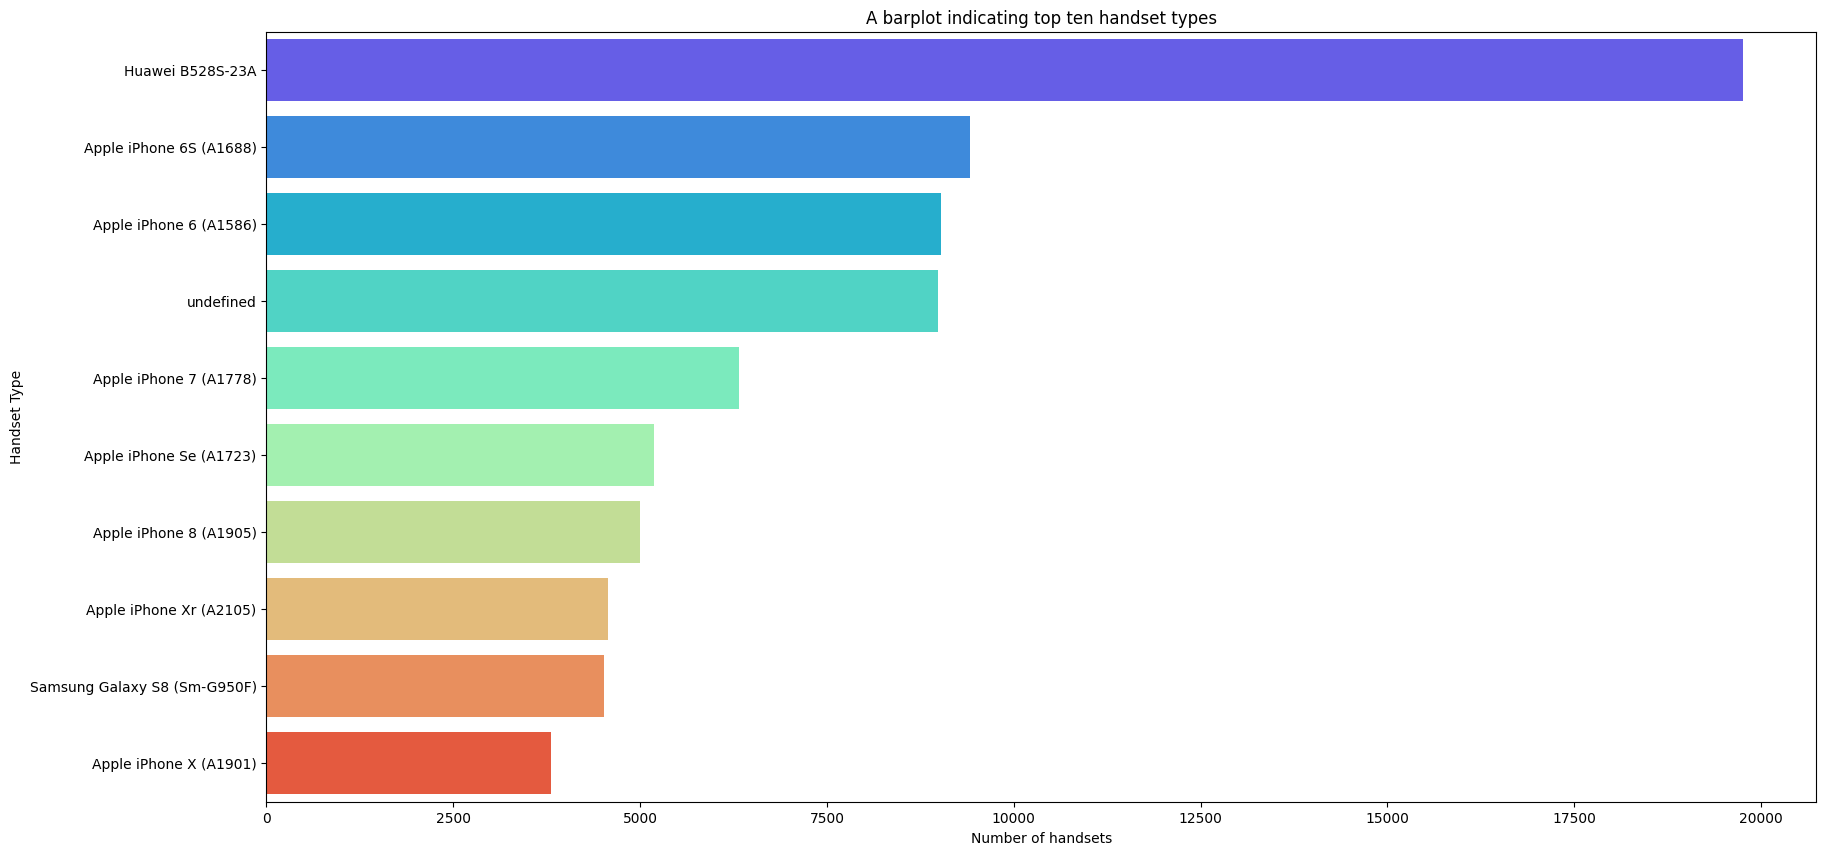

In [28]:
plt.figure(figsize=(20,10))
# Use the 'count' column for the x-axis data
sns.barplot(y = top_10_sets.index, x = top_10_sets['count'], palette='rainbow')
plt.xlabel('Number of handsets')
plt.title('A barplot indicating top ten handset types')


# TOP 3 HANDSET MANUFACTURERS


In [29]:
top_3_manufacturers = data['Handset Manufacturer'].value_counts(ascending = False).head(3)
top_3_manufacturers = pd.DataFrame(top_3_manufacturers)
top_3_manufacturers

count
Handset Manufacturer       
Apple                 59565
Samsung               40839
Huawei                34423

Text(0.5, 1.0, 'A barplot indicating top 3 handset manufacturers')

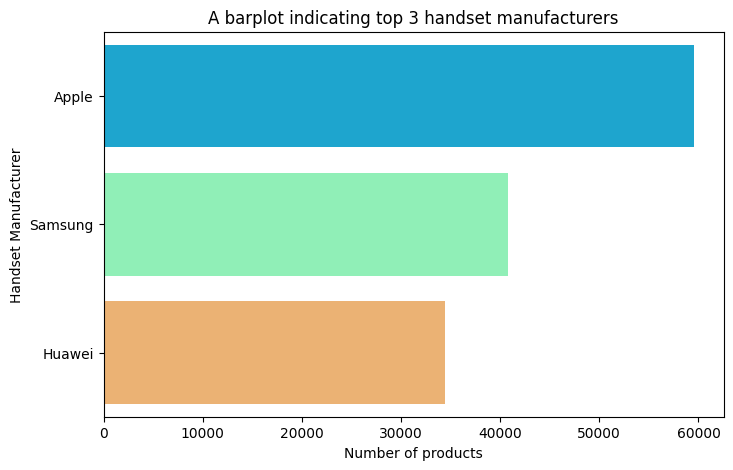

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(y = top_3_manufacturers.index, x = top_3_manufacturers['count'],palette='rainbow')
plt.xlabel('Number of products')
plt.title('A barplot indicating top 3 handset manufacturers')

###  TOP 5 HANDSETS PER HANDSET MANUFACTURER

In [31]:
a = data.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name = 'count').sort_values(['Handset Manufacturer', 'count'], ascending = False).groupby('Handset Manufacturer').head(5)
a.tail(20)

Handset Manufacturer  \
66                                    Apple   
80                                    Apple   
73                                    Apple   
24                      Alif Communications   
23                                     Adar   
20                                     Acer   
19                                     Acer   
14                                     Acer   
15                                     Acer   
16                                     Acer   
7                                   ASUSTeK   
12                                  ASUSTeK   
13                                  ASUSTeK   
9                                   ASUSTeK   
10                                  ASUSTeK   
6   A-Link Telecom International Co Limited   
0   A-Link Telecom International Co Limited   
1   A-Link Telecom International Co Limited   
2   A-Link Telecom International Co Limited   
3   A-Link Telecom International Co Limited   

                            Handset Type  count  
66                Apple iPhone 7 (A1778)   6326  
80               Apple iPhone Se (A1723)   5187  
73                Apple iPhone 8 (A1905)   4993  
24         Alif Communicati. Pulian Cm84      1  
23              Adar Stanley Mobile S231      1  
20                             Acer M310      5  
19                 Acer Liquid Zest Plus      2  
14                      Acer Liquid M220      1  
15                      Acer Liquid Z220      1  
16                      Acer Liquid Z530      1  
7        Asustek Asus Zb552Kl Zenfone Go      7  
12   Asustek Asus Zenfone2 Laser Ze600Kl      5  
13   Asustek Asus Zenfone2 Laser Ze601Kl      4  
9   Asustek Asus Zenfone 2 Laser Ze500Kl      3  
10   Asustek Asus Zenfone Selfie Zd551Kl      2  
6       A-Link Telecom I. Cubot X18 Plus      2  
0             A-Link Telecom I. Cubot A5      1  
1      A-Link Telecom I. Cubot Note Plus      1  
2         A-Link Telecom I. Cubot Note S      1  
3           A-Link Telecom I. Cubot Nova      1

<Axes: ylabel='Handset Type'>

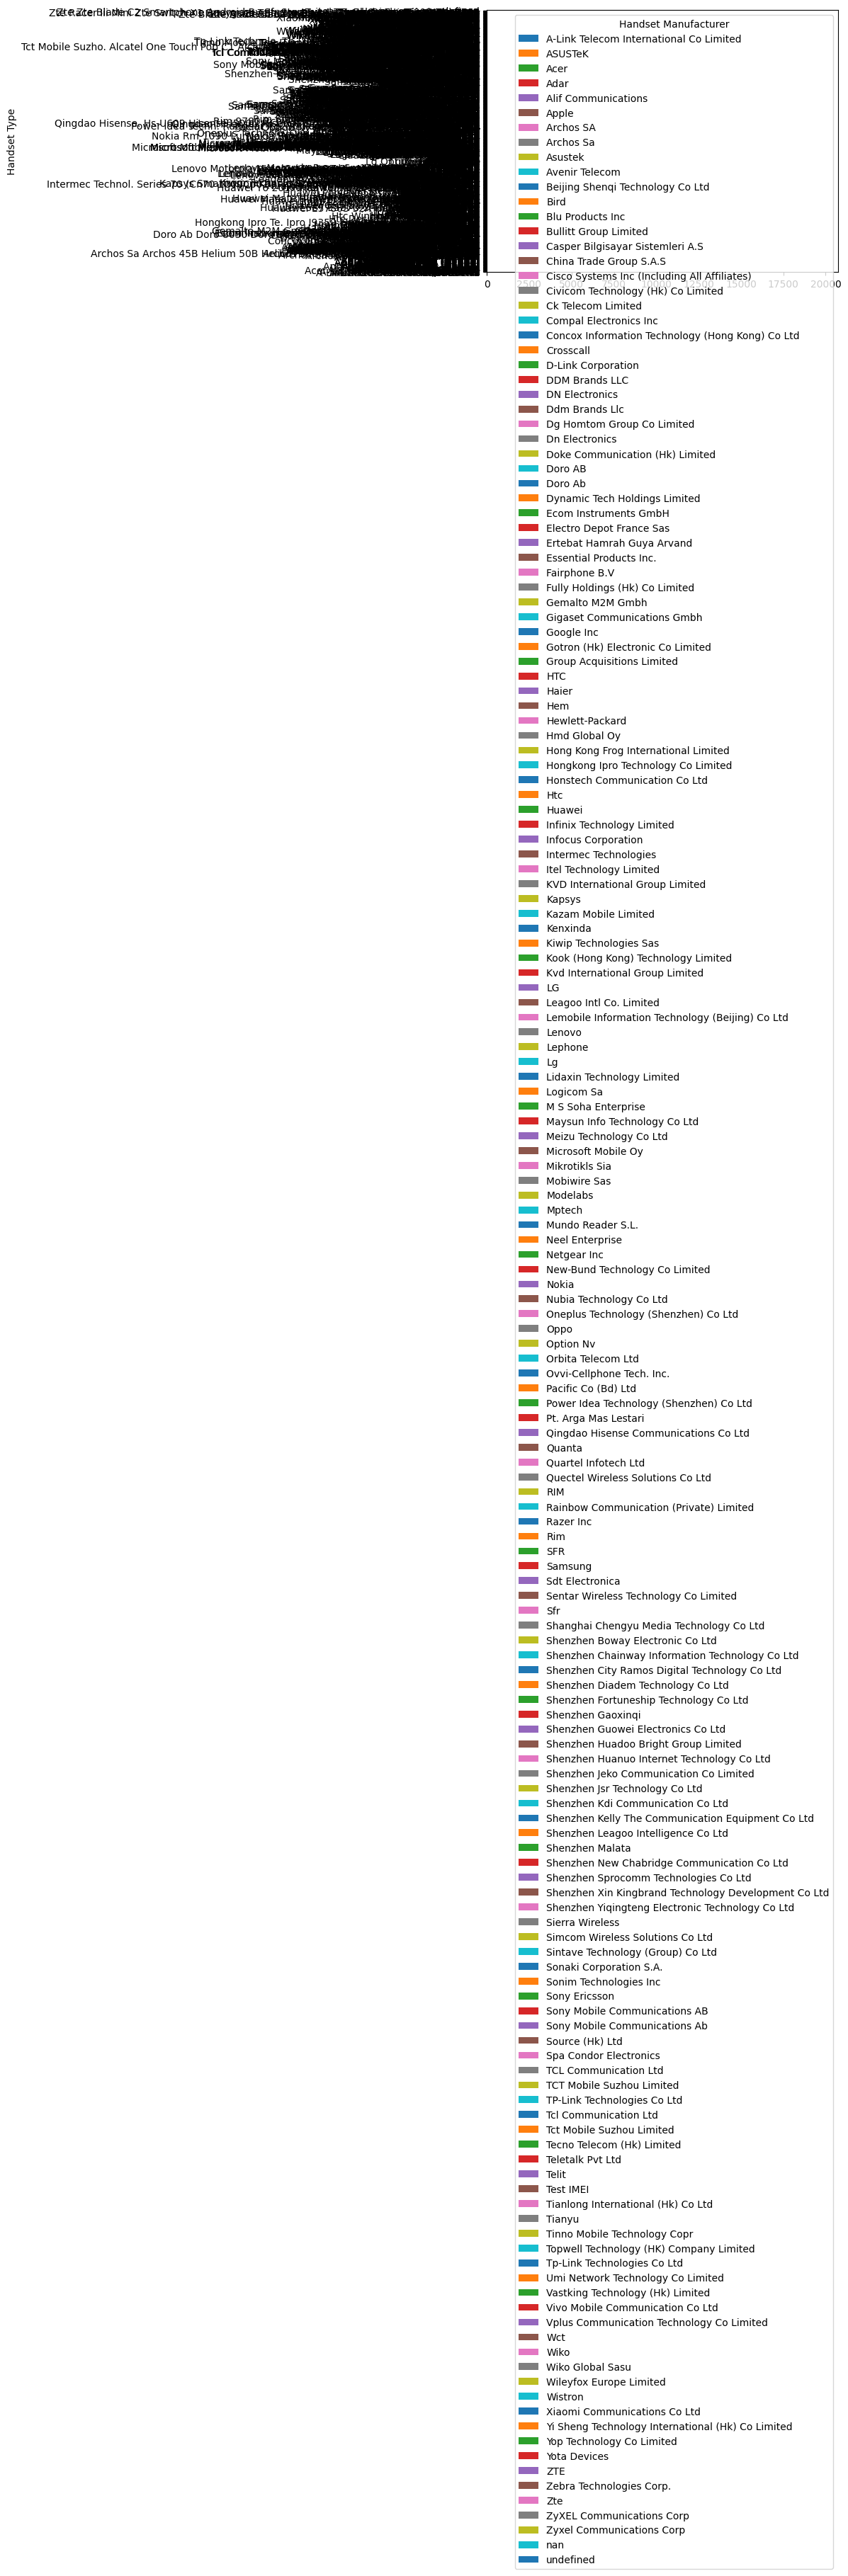

In [32]:
data.groupby('Handset Manufacturer')['Handset Type'].value_counts().unstack(0).plot.barh()

### A short interpretation and recommendation to marketing

* Apple, Huawei and Samsung are the leading manufacturers. The top 10 handsets also are manufactured by these companies.  Thus the volume of the most common handsets should be increased to replace the least common handsets sets.



### Aggregate per user the following information in the column:

1.  number of xDR sessions

In [33]:
xdr_session = data[['Bearer Id', 'MSISDN/Number']]
a = xdr_session.groupby('MSISDN/Number').count()
a.columns = ['xdr sessions']
a.head()

xdr sessions
MSISDN/Number              
3.360100e+10              1
3.360100e+10              1
3.360100e+10              1
3.360101e+10              1
3.360101e+10              2

Text(0.5, 1.0, 'users with highest session numbers')

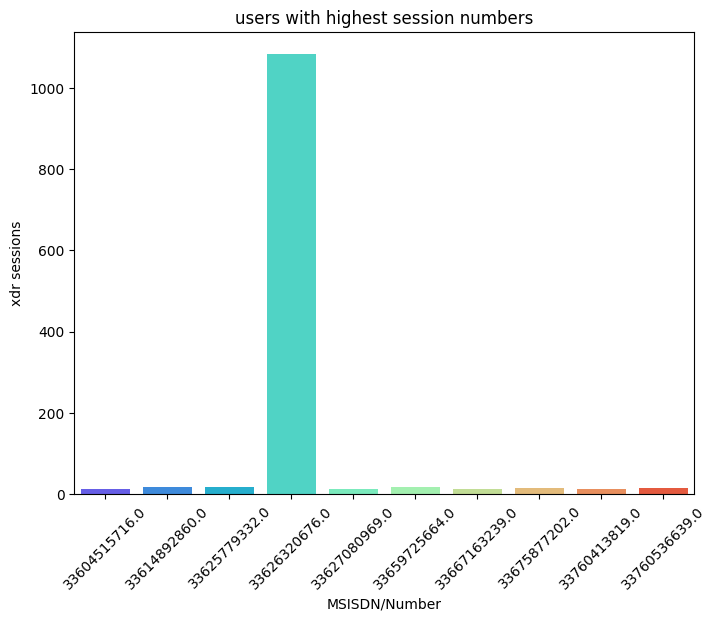

In [34]:
t = a.sort_values(by = 'xdr sessions', ascending = False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x = t.index, y = t['xdr sessions'],palette="rainbow")
plt.xticks(rotation = 45)
plt.title('users with highest session numbers')

# Session Duration

In [35]:
duration = data[['Dur. (ms)', 'MSISDN/Number']]
d = duration.groupby('MSISDN/Number').sum()
d.columns = ['session_duration (ms)']
d.head()

session_duration (ms)
MSISDN/Number                       
3.360100e+10                116720.0
3.360100e+10                181230.0
3.360100e+10                134969.0
3.360101e+10                 49878.0
3.360101e+10                 37104.0

In [36]:
t = d.sort_values(by = 'session_duration (ms)', ascending = False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x = t.index, y = t['session_duration (ms)'],palette="rainbow")
plt.xticks(rotation = 45)
plt.title('users with longest session duration')

Text(0.5, 1.0, 'users with longest session duration')

3. The total download (DL) and upload (UL) data

In [37]:
byte = data[['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_bytes']]
c = byte.groupby('MSISDN/Number').sum()
c.head()

Total UL (Bytes)  Total DL (Bytes)   total_bytes
MSISDN/Number                                                  
3.360100e+10         36053108.0      8.426375e+08  8.786906e+08
3.360100e+10         36104459.0      1.207552e+08  1.568596e+08
3.360100e+10         39306820.0      5.566597e+08  5.959665e+08
3.360101e+10         20327526.0      4.019932e+08  4.223207e+08
3.360101e+10         94280527.0      1.363130e+09  1.457411e+09

In [38]:
# plotting a sample of the data
t = c.sample(10)
pos = list(range(len(t['Total UL (Bytes)'])))
width = 0.25
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(pos, t['Total UL (Bytes)'], width, alpha=0.5, color='b')
plt.bar([p + width for p in pos], t['Total DL (Bytes)'], width, alpha=0.5, color='r')
plt.bar([p + width*2 for p in pos], t['total_bytes'], width, alpha=0.5, color='g')
ax.set_ylabel('bytes')
ax.set_title('Bytes data per user')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(t.index)
plt.xticks(rotation = 45)

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(t['Total UL (Bytes)'] + t['Total DL (Bytes)'] + t['total_bytes'])] )
plt.legend(['Upload Bytes', 'Download Bytes', 'Total Bytes'], loc='upper left')
plt.grid()
plt.title('A sample of users upload, download and total bytes')

Text(0.5, 1.0, 'A sample of users upload, download and total bytes')

1. Upload bytes are less than download bytes throughout the plot.

4. The total data volume (in Bytes) during this session for each application

In [39]:
# I had already created total bytes columns for all the application in featuer genreation
apps = data[['MSISDN/Number','social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']]
d = apps.groupby('MSISDN/Number').sum()
d.head()

social_media      google      email     youtube     netflix  \
MSISDN/Number                                                                
3.360100e+10      2232135.0   4389005.0  1331362.0  21624548.0  27180981.0   
3.360100e+10      2660565.0   5334863.0  3307781.0  12432223.0  11221763.0   
3.360100e+10      3195623.0   3443126.0  3205380.0  21333570.0  19353900.0   
3.360101e+10       280294.0   9678493.0  2284670.0   6977321.0   1942092.0   
3.360101e+10      2912542.0  18499616.0  3305469.0  41533002.0  49201724.0   

                     gaming        other  
MSISDN/Number                             
3.360100e+10   8.124587e+08  386570872.0  
3.360100e+10   1.197501e+08  281710071.0  
3.360100e+10   5.388277e+08  501693672.0  
3.360101e+10   3.911261e+08   35279702.0  
3.360101e+10   1.314798e+09  804804484.0

In [40]:
ig, ax = plt.subplots(figsize=(12, 8))

# Select a subset of users (e.g., top 10 users with the highest social media usage)
top_users = d.sort_values(by='social_media', ascending=False).head(10)

# Bar width and positions
width = 0.1
positions = range(len(top_users))

# Create bar plots for each app type
ax.bar(positions, top_users['social_media'], width, label='Social Media')
ax.bar([p + width for p in positions], top_users['google'], width, label='Google')
ax.bar([p + width*2 for p in positions], top_users['email'], width, label='Email')
ax.bar([p + width*3 for p in positions], top_users['youtube'], width, label='YouTube')
ax.bar([p + width*4 for p in positions], top_users['netflix'], width, label='Netflix')
ax.bar([p + width*5 for p in positions], top_users['gaming'], width, label='Gaming')
ax.bar([p + width*6 for p in positions], top_users['other'], width, label='Other')

# Labeling
ax.set_xlabel("Users (MSISDN/Number)")
ax.set_ylabel("Data Usage")
ax.set_title("Data Usage by App Type for Top 10 Users")
ax.set_xticks([p + 3 * width for p in positions])  # Centering x-ticks
ax.set_xticklabels(top_users.index, rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside plot
plt.tight_layout()

plt.show()

Only gaming and others volume(in bytes) is highly visible then google,social media,youtube,email,netflix

## Non-Graphical Univariate Analysis

Variables of interest: Number of xDR sessions,  Session duration,  the total download (DL) and upload (UL) data , the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming).

In [41]:
#Dispersion and Central Tendency

In [42]:
data.describe()

Start ms         End ms     Dur. (ms)          IMSI  \
count  150001.000000  150001.000000  1.500010e+05  1.500010e+05   
mean      499.188200     498.800880  1.046086e+05  2.082016e+14   
min         0.000000       0.000000  7.142000e+03  2.040471e+14   
25%       250.000000     251.000000  5.744200e+04  2.082014e+14   
50%       499.000000     500.000000  8.639900e+04  2.082015e+14   
75%       749.000000     750.000000  1.324300e+05  2.082018e+14   
max       999.000000     999.000000  1.859336e+06  2.140743e+14   
std       288.610872     288.096693  8.103735e+04  2.144722e+10   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.500010e+05  1.500010e+05    150001.000000    150001.000000   
mean    4.182414e+10  4.847455e+13       109.795706        17.662883   
min     3.360100e+10  4.400152e+11         0.000000         0.000000   
25%     3.365094e+10  3.546261e+13        35.000000         3.000000   
50%     3.366361e+10  3.572241e+13        54.000000         7.000000   
75%     3.368307e+10  8.611970e+13       109.795706        17.662883   
max     8.823971e+14  9.900120e+13     96923.000000      7120.000000   
std     2.438731e+12  2.237359e+13       559.342620        76.529933   

       Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  ...       netflix  \
count            150001.000000            150001.000000  ...  1.500010e+05   
mean              13300.045927              1770.428647  ...  2.262861e+07   
min                   0.000000                 0.000000  ...  9.843200e+04   
25%                  43.000000                47.000000  ...  1.597946e+07   
50%                  63.000000                63.000000  ...  2.263554e+07   
75%               19710.000000              1120.000000  ...  2.929044e+07   
max              378160.000000             58613.000000  ...  4.519815e+07   
std               23971.798635              4625.340082  ...  9.260820e+06   

             gaming         other       total_tp      total_rtt     total_tcp  \
count  1.500010e+05  1.500010e+05  150001.000000  150001.000000  1.500010e+05   
mean   4.303331e+08  4.293653e+08   15070.474573     127.458589  2.156957e+07   
min    3.063580e+05  1.490450e+05       0.000000       0.000000  8.600000e+01   
25%    2.187279e+08  2.185534e+08      90.000000      40.000000  1.492449e+06   
50%    4.316150e+08  4.299865e+08     125.000000      67.000000  2.156957e+07   
75%    6.414159e+08  6.399275e+08   22348.000000     127.458589  2.156957e+07   
max    8.592028e+08  8.595209e+08  382262.000000   96924.000000  4.344116e+09   
std    2.440199e+08  2.432681e+08   26825.755093     565.144762  1.184392e+08   

       Last Location Name_encoded  Handset Type_encoded  \
count               150001.000000         150001.000000   
mean                 20292.245385            474.000153   
min                      0.000000              0.000000   
25%                   9185.000000             66.000000   
50%                  17836.000000            316.000000   
75%                  31038.000000            888.000000   
max                  45547.000000           1396.000000   
std                  12892.829812            437.009646   

       Handset Manufacturer_encoded  Bearer Id_encoded  
count                 150001.000000      150001.000000  
mean                      56.709102       64121.558930  
min                        0.000000           0.000000  
25%                        5.000000       29222.000000  
50%                       52.000000       61730.000000  
75%                      103.000000       98191.000000  
max                      170.000000      134708.000000  
std                       51.461184       39291.948357  

[8 rows x 66 columns]

In [43]:
variables = data[['Bearer Id', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)', 'social_media', 'netflix', 'gaming', 'youtube', 'google', 'email', 'other']]
variables.describe()

Dur. (ms).1  Total UL (Bytes)  Total DL (Bytes)  social_media  \
count  1.500010e+05      1.500010e+05      1.500010e+05  1.500010e+05   
mean   1.046091e+08      4.112121e+07      4.546434e+08  1.828250e+06   
std    8.103734e+07      1.127635e+07      2.441421e+08  1.035646e+06   
min    7.142988e+06      2.866892e+06      7.114041e+06  1.563000e+03   
25%    5.744206e+07      3.322203e+07      2.431072e+08  9.322180e+05   
50%    8.639998e+07      4.114324e+07      4.558409e+08  1.826471e+06   
75%    1.324307e+08      4.903424e+07      6.657051e+08  2.727487e+06   
max    1.859336e+09      7.833131e+07      9.029696e+08  3.650861e+06   

            netflix        gaming       youtube        google         email  \
count  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05  1.500010e+05   
mean   2.262861e+07  4.303331e+08  2.264348e+07  7.807295e+06  2.259102e+06   
std    9.260820e+06  2.440199e+08  9.246800e+06  3.516420e+06  1.071109e+06   
min    9.843200e+04  3.063580e+05  7.890300e+04  4.033000e+04  8.359000e+03   
25%    1.597946e+07  2.187279e+08  1.599846e+07  4.943599e+06  1.359344e+06   
50%    2.263554e+07  4.316150e+08  2.266177e+07  7.812835e+06  2.263567e+06   
75%    2.929044e+07  6.414159e+08  2.929260e+07  1.068280e+07  3.159818e+06   
max    4.519815e+07  8.592028e+08  4.519008e+07  1.552878e+07  4.518036e+06   

              other  
count  1.500010e+05  
mean   4.293653e+08  
std    2.432681e+08  
min    1.490450e+05  
25%    2.185534e+08  
50%    4.299865e+08  
75%    6.399275e+08  
max    8.595209e+08

In [44]:
variables = data[['Bearer Id', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)', 'social_media', 'netflix',
                  'gaming', 'youtube', 'google', 'email', 'other', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
                 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]
variables.describe().transpose()

count          mean           std        min  \
Dur. (ms).1                  150001.0  1.046091e+08  8.103734e+07  7142988.0   
Total UL (Bytes)             150001.0  4.112121e+07  1.127635e+07  2866892.0   
Total DL (Bytes)             150001.0  4.546434e+08  2.441421e+08  7114041.0   
social_media                 150001.0  1.828250e+06  1.035646e+06     1563.0   
netflix                      150001.0  2.262861e+07  9.260820e+06    98432.0   
gaming                       150001.0  4.303331e+08  2.440199e+08   306358.0   
youtube                      150001.0  2.264348e+07  9.246800e+06    78903.0   
google                       150001.0  7.807295e+06  3.516420e+06    40330.0   
email                        150001.0  2.259102e+06  1.071109e+06     8359.0   
other                        150001.0  4.293653e+08  2.432681e+08   149045.0   
Avg RTT DL (ms)              150001.0  1.097957e+02  5.593426e+02        0.0   
Avg RTT UL (ms)              150001.0  1.766288e+01  7.652993e+01        0.0   
Avg Bearer TP DL (kbps)      150001.0  1.330005e+04  2.397180e+04        0.0   
Avg Bearer TP UL (kbps)      150001.0  1.770429e+03  4.625340e+03        0.0   
TCP DL Retrans. Vol (Bytes)  150001.0  2.080991e+07  1.172356e+08        2.0   
TCP UL Retrans. Vol (Bytes)  150001.0  7.596587e+05  1.577616e+07        1.0   

                                     25%           50%           75%  \
Dur. (ms).1                   57442058.0  8.639998e+07  1.324307e+08   
Total UL (Bytes)              33222029.0  4.114324e+07  4.903424e+07   
Total DL (Bytes)             243107173.0  4.558409e+08  6.657051e+08   
social_media                    932218.0  1.826471e+06  2.727487e+06   
netflix                       15979455.0  2.263554e+07  2.929044e+07   
gaming                       218727939.0  4.316150e+08  6.414159e+08   
youtube                       15998463.0  2.266177e+07  2.929260e+07   
google                         4943599.0  7.812835e+06  1.068280e+07   
email                          1359344.0  2.263567e+06  3.159818e+06   
other                        218553417.0  4.299865e+08  6.399275e+08   
Avg RTT DL (ms)                     35.0  5.400000e+01  1.097957e+02   
Avg RTT UL (ms)                      3.0  7.000000e+00  1.766288e+01   
Avg Bearer TP DL (kbps)             43.0  6.300000e+01  1.971000e+04   
Avg Bearer TP UL (kbps)             47.0  6.300000e+01  1.120000e+03   
TCP DL Retrans. Vol (Bytes)    1332932.0  2.080991e+07  2.080991e+07   
TCP UL Retrans. Vol (Bytes)      63009.0  7.596587e+05  7.596587e+05   

                                      max  
Dur. (ms).1                  1.859336e+09  
Total UL (Bytes)             7.833131e+07  
Total DL (Bytes)             9.029696e+08  
social_media                 3.650861e+06  
netflix                      4.519815e+07  
gaming                       8.592028e+08  
youtube                      4.519008e+07  
google                       1.552878e+07  
email                        4.518036e+06  
other                        8.595209e+08  
Avg RTT DL (ms)              9.692300e+04  
Avg RTT UL (ms)              7.120000e+03  
Avg Bearer TP DL (kbps)      3.781600e+05  
Avg Bearer TP UL (kbps)      5.861300e+04  
TCP DL Retrans. Vol (Bytes)  4.294426e+09  
TCP UL Retrans. Vol (Bytes)  2.908226e+09

In [45]:
data['Bearer Id'].nunique()

134709

In [46]:
# skewness and kurtosis
# Select only numerical columns for skewness and kurtosis calculations
numerical_variables = variables.select_dtypes(include=['number'])

s = numerical_variables.skew(axis=0, skipna=True)
k = numerical_variables.kurt(axis=0, skipna=True)
pd.DataFrame([s, k], index=['skewness', 'kurtosis'])

Dur. (ms).1  Total UL (Bytes)  Total DL (Bytes)  social_media  \
skewness     3.952622         -0.002456         -0.003153     -0.002121   
kurtosis    37.022470         -0.327436         -1.198363     -1.202178   

           netflix    gaming   youtube    google     email     other  \
skewness -0.000409 -0.003225 -0.005465 -0.010602 -0.006033  0.001256   
kurtosis -0.608472 -1.202256 -0.604624 -0.963035 -1.061696 -1.196015   

          Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
skewness        69.705161        31.530109                 2.589445   
kurtosis      8805.687875      1632.646032                 9.573691   

          Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
skewness                 4.503428                    24.840677   
kurtosis                25.086860                   697.574773   

          TCP UL Retrans. Vol (Bytes)  
skewness                   141.035684  
kurtosis                 21913.803296

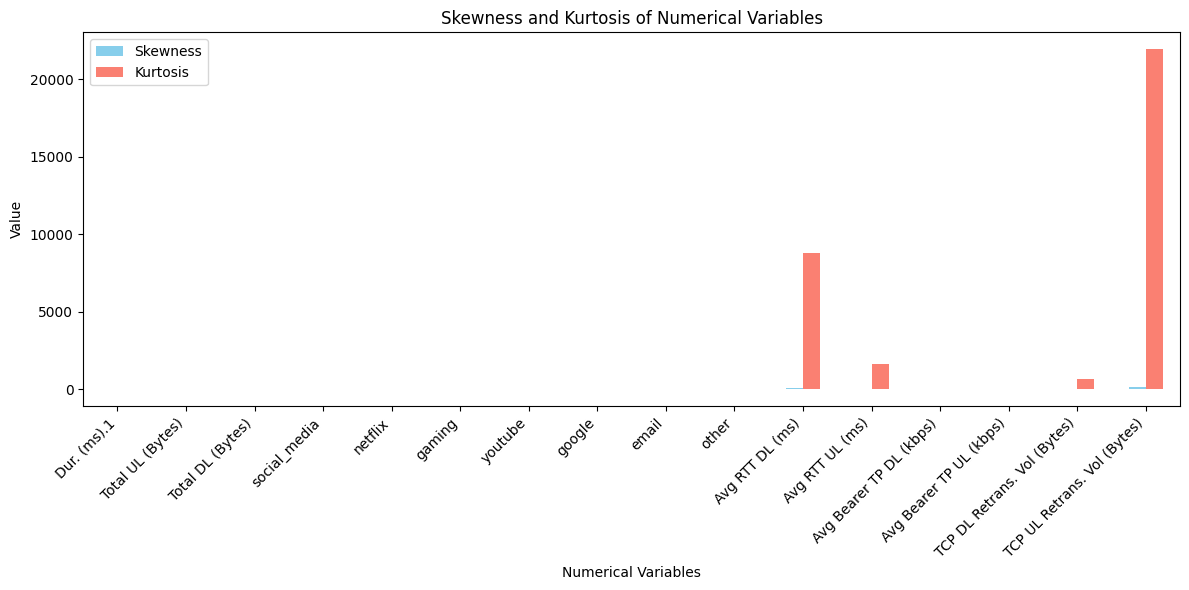

In [47]:
# Combine skewness and kurtosis into a DataFrame for easier plotting
stats_df = pd.DataFrame({'Skewness': s, 'Kurtosis': k})

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot skewness and kurtosis side-by-side for each variable
stats_df.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'])

# Customizing the plot
ax.set_title("Skewness and Kurtosis of Numerical Variables")
ax.set_xlabel("Numerical Variables")
ax.set_ylabel("Value")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(loc="best")

plt.tight_layout()  # Adjust layout for readability
plt.show()

Highly skewed distribution: If the skewness value is less than −1 or greater than +1.

Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.

Approximately symmetric distribution: If the skewness value is between −½ and +½.


Really Flat distribution: Kurtosis less than -1.
Peaked distribution: Kurtosis more than 1.

This plot provides a clear visual comparison of skewness and kurtosis values across all numerical columns.

numerical_variables.kurt() calculates the kurtosis for each column.
Kurtosis measures the "tailedness" of the distribution of values. A kurtosis value close to zero indicates a normal distribution, while higher values suggest a distribution with heavier tails.

Summary of some of the variables:


1. **Bearer Id** ~ This is the session identifier, thus not quantitative. It has 134709 instances thus the recorded number of xDR sessions are 134709.
2. **Dur. (ms).1** ~ This is the total duration of an xDR session in micro seconds. Across the 134709 sessions, it has the following measures:
    * Average:          	1.046091e+08
    * Standard Deviation: 	8.103734e+07
    * Minimum Value:     	7.142988e+06
    * Lower Quartile    	5.744206e+07
    * Median            	8.639998e+07
    * Upper Quartile     	1.324307e+08
    * Maximum Value:    	1.859336e+09
    
    
3. **Total UL (Bytes)** ~ Data volume in bytes sent during this session. Across the 134709 sessions, it has the following measures:
    * Average:          	4.112121e+07
    * Standard Deviation: 	1.127635e+07  
    * Minimum Value:     	2.866892e+06
    * Lower Quartile    	3.322203e+07
    * Median            	4.558409e+08
    * Upper Quartile     	4.903424e+07
    * Maximum Value:    	7.833131e+07
    
    
4. **Total DL (Bytes)** ~ Data volume in bytes received during this session. Across the 134709 sessions, it has the following measures:
    * Average:          	4.546434e+085
    * Standard Deviation: 	2.441421e+08
    * Minimum Value:     	7.114041e+06
    * Lower Quartile    	2.431072e+08
    * Median            	1.826471e+06
    * Upper Quartile     	6.657051e+08
    * Maximum Value:    	9.029696e+08  
    
    
5. **social_media** ~ Total social media data volume sent and received by the MS during this session. Across the 134709 sessions, it has the following measures:
    * Average:          	1.828250e+06
    * Standard Deviation: 	1.035646e+06
    * Minimum Value:     	1.563000e+03
    * Lower Quartile    	9.322180e+05
    * Median            	8.639900e+04
    * Upper Quartile     	2.727487e+06
    * Maximum Value:    	3.650861e+06
   
   
   
6. **netflix** ~ Total netflix data volume sent and received by the MS during this session. Across the 134709 sessions, it has the following measures:
    * Average:          	2.262861e+07
    * Standard Deviation: 	9.260820e+06
    * Minimum Value:     	9.843200e+04
    * Lower Quartile    	1.597946e+07
    * Median            	2.263554e+07
    * Upper Quartile     	2.929044e+07
    * Maximum Value:    	4.519815e+07
    
    
7. **gaming** ~ Total gaming data volume sent and received by the MS during this session. Across the 134709 sessions, it has the following measures:
    * Average:          	4.303331e+08
    * Standard Deviation: 	2.440199e+08
    * Minimum Value:     	3.063580e+05
    * Lower Quartile    	2.187279e+08
    * Median            	4.316150e+08
    * Upper Quartile     	6.414159e+08
    * Maximum Value:    	8.592028e+08
    
    
8. **youtube)** ~ Total youtube data volume sent and received by the MS during this session. Across the 134709 sessions, it has the following measures:
    * Average:          	2.264348e+07
    * Standard Deviation: 	9.246800e+06
    * Minimum Value:     	7.890300e+04
    * Lower Quartile    	1.599846e+07
    * Median            	2.266177e+07
    * Upper Quartile     	2.929260e+07
    * Maximum Value:    	4.519008e+07
    
    
9. **email** ~ Total email data volume sent and received by the MS during this session. Across the 134709 sessions, it has the following measures:
    * Average:          	2.259102e+06
    * Standard Deviation: 	1.071109e+06
    * Minimum Value:     	8.359000e+03
    * Lower Quartile    	1.359344e+06
    * Median            	2.263567e+06
    * Upper Quartile     	3.159818e+06
    * Maximum Value:    	4.518036e+06
    
    
10. **google** ~ Total google data volume sent and received by the MS during this session. Across the 134709 sessions, it has the following measures:
    * Average:          	7.807295e+06
    * Standard Deviation: 	3.516420e+06
    * Minimum Value:     	4.033000e+04
    * Lower Quartile    	4.943599e+06
    * Median            	7.812835e+06
    * Upper Quartile     	1.068280e+07
    * Maximum Value:    	1.552878e+07
    
    
    
11. **other** ~ Total Other data volume sent and received by the MS during this session. Across the 134709 sessions, it has the following measures:
    * Average:          	4.293653e+08
    * Standard Deviation: 	2.432681e+08
    * Minimum Value:     	1.490450e+05
    * Lower Quartile    	2.185534e+08
    * Median            	4.299865e+08
    * Upper Quartile     	6.399275e+08
    * Maximum Value:    	8.595209e+08



# OUTLIER DETECTION BY INTERQUARTILE METHOD(IQR)

In [48]:
#google
Q1 = np.percentile(data.google, 25, interpolation = 'midpoint')
Q2 = np.percentile(data.google, 50, interpolation = 'midpoint')
Q3 = np.percentile(data.google, 75, interpolation = 'midpoint')
IQR = stats.iqr(data.google, interpolation = 'midpoint')
o = (data.google < (Q1 - 1.5 * IQR)) |(data.google > (Q3 + 1.5 * IQR))
i = o.unique()

#youtube
Q1 = np.percentile(data.youtube, 25, interpolation = 'midpoint')
Q2 = np.percentile(data.youtube, 50, interpolation = 'midpoint')
Q3 = np.percentile(data.youtube, 75, interpolation = 'midpoint')
IQR = stats.iqr(data.youtube, interpolation = 'midpoint')
o = (data.youtube < (Q1 - 1.5 * IQR)) |(data.youtube > (Q3 + 1.5 * IQR))
j = o.unique()

#gaming
Q1 = np.percentile(data.gaming, 25, interpolation = 'midpoint')
Q2 = np.percentile(data.gaming, 50, interpolation = 'midpoint')
Q3 = np.percentile(data.gaming, 75, interpolation = 'midpoint')
IQR = stats.iqr(data.gaming, interpolation = 'midpoint')
o = (data.gaming < (Q1 - 1.5 * IQR)) |(data.gaming > (Q3 + 1.5 * IQR))
k = o.unique()


#netflix
Q1 = np.percentile(data.netflix, 25, interpolation = 'midpoint')
Q2 = np.percentile(data.netflix, 50, interpolation = 'midpoint')
Q3 = np.percentile(data.netflix, 75, interpolation = 'midpoint')
IQR = stats.iqr(data.netflix, interpolation = 'midpoint')
o = (data.netflix < (Q1 - 1.5 * IQR)) |(data.netflix > (Q3 + 1.5 * IQR))
l = o.unique()


#email
Q1 = np.percentile(data.email, 25, interpolation = 'midpoint')
Q2 = np.percentile(data.email, 50, interpolation = 'midpoint')
Q3 = np.percentile(data.email, 75, interpolation = 'midpoint')
IQR = stats.iqr(data.email, interpolation = 'midpoint')
o = (data.email < (Q1 - 1.5 * IQR)) |(data.email > (Q3 + 1.5 * IQR))
m = np.unique(o)


#social_media
Q1 = np.percentile(data.social_media, 25, interpolation = 'midpoint')
Q2 = np.percentile(data.social_media, 50, interpolation = 'midpoint')
Q3 = np.percentile(data.social_media, 75, interpolation = 'midpoint')
IQR = stats.iqr(data.social_media, interpolation = 'midpoint')
o = (data.social_media < (Q1 - 1.5 * IQR)) |(data.social_media > (Q3 + 1.5 * IQR))
n = o.unique()

#others
Q1 = np.percentile(data.other, 25, interpolation = 'midpoint')
Q2 = np.percentile(data.other, 50, interpolation = 'midpoint')
Q3 = np.percentile(data.other, 75, interpolation = 'midpoint')
IQR = stats.iqr(data.other, interpolation = 'midpoint')
o = (data.other < (Q1 - 1.5 * IQR)) |(data.other > (Q3 + 1.5 * IQR))
p = o.unique()




['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
                 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']
#Dur. (ms).1
Q1 = np.percentile(data['Dur. (ms).1'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Dur. (ms).1'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Dur. (ms).1'], 75, interpolation = 'midpoint')
IQR = stats.iqr(data['Dur. (ms).1'], interpolation = 'midpoint')
o = (data['Dur. (ms).1'] < (Q1 - 1.5 * IQR)) |(data['Dur. (ms).1'] > (Q3 + 1.5 * IQR))
q = o.unique()

#total_bytes
Q1 = np.percentile(data.total_bytes, 25, interpolation = 'midpoint')
Q2 = np.percentile(data.total_bytes, 50, interpolation = 'midpoint')
Q3 = np.percentile(data.total_bytes, 75, interpolation = 'midpoint')
IQR = stats.iqr(data.total_bytes, interpolation = 'midpoint')
o = (data.total_bytes < (Q1 - 1.5 * IQR)) |(data.total_bytes > (Q3 + 1.5 * IQR))
r = o.unique()

#total_tp
Q1 = np.percentile(data.total_tp, 25, interpolation = 'midpoint')
Q2 = np.percentile(data.total_tp, 50, interpolation = 'midpoint')
Q3 = np.percentile(data.total_tp, 75, interpolation = 'midpoint')
IQR = stats.iqr(data.total_tp, interpolation = 'midpoint')
o = (data.total_tp < (Q1 - 1.5 * IQR)) |(data.total_tp > (Q3 + 1.5 * IQR))
s = o.unique()

#total_rtt
Q1 = np.percentile(data.total_rtt, 25, interpolation = 'midpoint')
Q2 = np.percentile(data.total_rtt, 50, interpolation = 'midpoint')
Q3 = np.percentile(data.total_rtt, 75, interpolation = 'midpoint')
IQR = stats.iqr(data.total_rtt, interpolation = 'midpoint')
o = (data.total_rtt < (Q1 - 1.5 * IQR)) |(data.total_rtt > (Q3 + 1.5 * IQR))
t = o.unique()

#total_tcp
Q1 = np.percentile(data.total_tcp, 25, interpolation = 'midpoint')
Q2 = np.percentile(data.total_tcp, 50, interpolation = 'midpoint')
Q3 = np.percentile(data.total_tcp, 75, interpolation = 'midpoint')
IQR = stats.iqr(data.total_tcp, interpolation = 'midpoint')
o = (data.total_tcp < (Q1 - 1.5 * IQR)) |(data.total_tcp > (Q3 + 1.5 * IQR))
u = o.unique()


print('google', i)
print('youtube', j)
print('gaming', k)
print('netflix', l)
print('email', m)
print('social media', n)
print('other', p)
print('Duration', q)
print('total bytes', r)
print('total_tp', s)
print('total_rtt', t)
print('total_tcp', u)

google [False]
youtube [False]
gaming [False]
netflix [False]
email [False]
social media [False]
other [False]
Duration [ True False]
total bytes [False]
total_tp [False  True]
total_rtt [False  True]
total_tcp [False  True]


No outliers present in the apps.
Outliers present in the **session duration, total throughput, total rtt*** and ***total tcp**. This will be taken care of in a later section.

## Graphical Univariate Analysis.

Variables of interest: Number of xDR sessions, Session duration, the total download (DL) and upload (UL) data , the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming).


 mu = 430333100.71 and sigma = 244019110.62



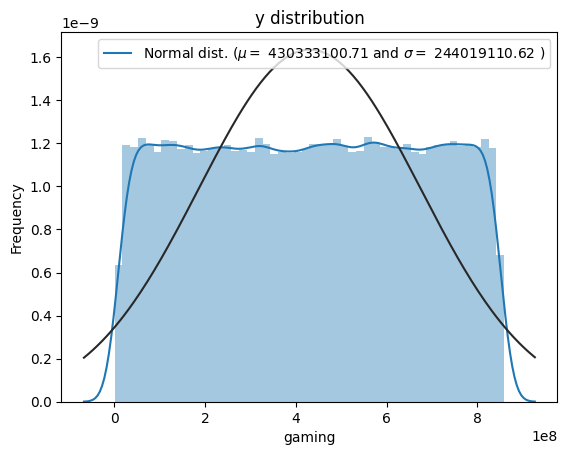

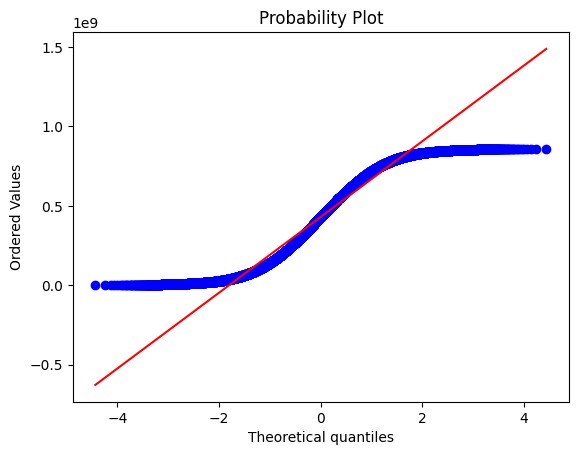

In [49]:
sns.distplot(data['gaming'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['gaming'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['gaming'], plot=plt)
plt.show()


 mu = 22628606.54 and sigma = 9260789.22



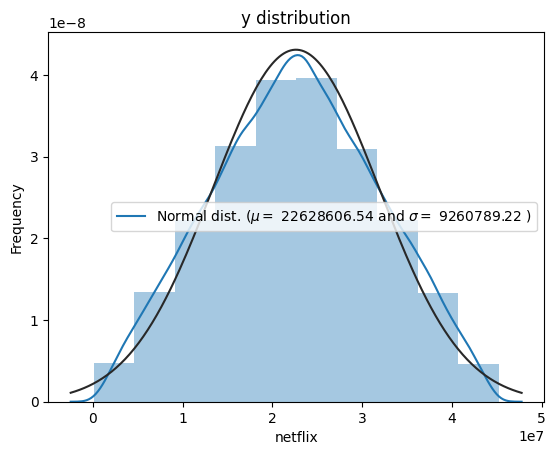

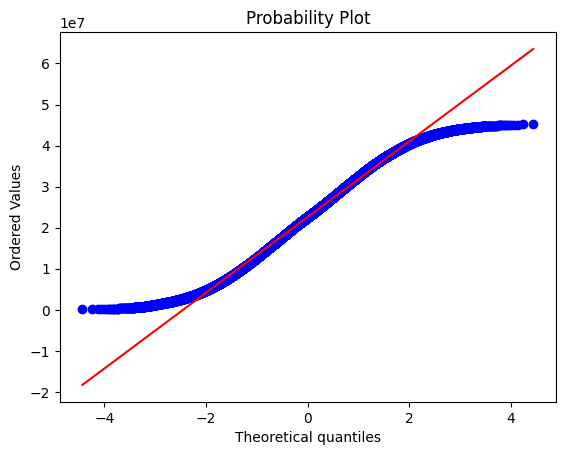

In [50]:
# sns.distplot(data['Social Media DL (Bytes)']) # numeric
sns.distplot(data['netflix'] , bins = 10, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['netflix'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['netflix'], plot=plt)
plt.show()


 mu = 2259102.31 and sigma = 1071105.49



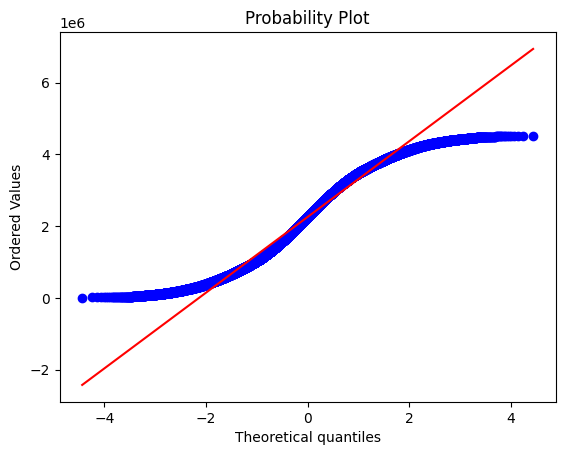

In [51]:
# sns.distplot(data['email'], fit = norm) # numeric
sns.boxplot(data['email'])

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['email'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.xlabel('email')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['email'], plot=plt)
plt.show()


 mu = 7807294.55 and sigma = 3516408.52



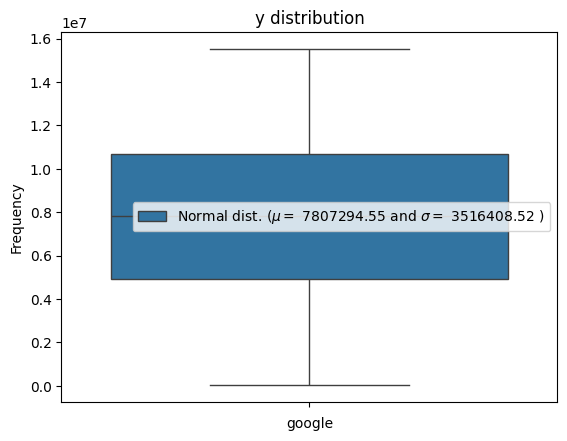

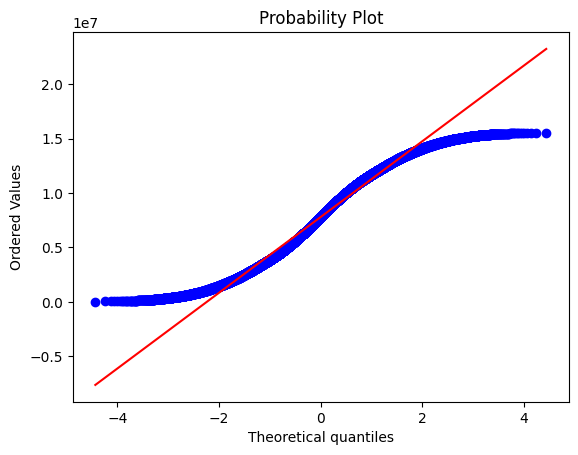

In [52]:
# sns.distplot(data['Social Media DL (Bytes)']) # numeric
# sns.distplot(data['google'] , fit=norm);
sns.boxplot(data['google'])

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['google'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.xlabel('google')
plt.ylabel('Frequency')

plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['google'], plot=plt)
plt.show()


 mu = 1828250.21 and sigma = 1035642.69



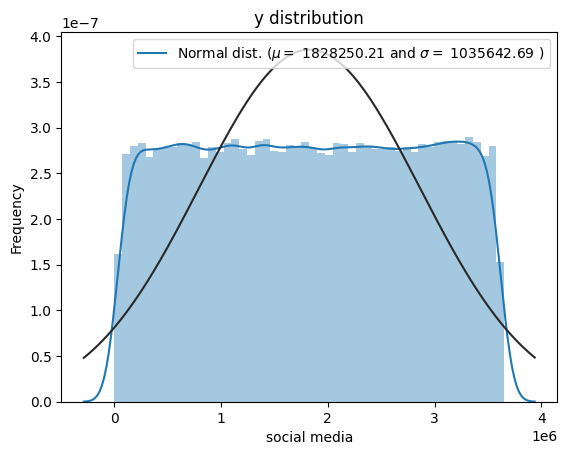

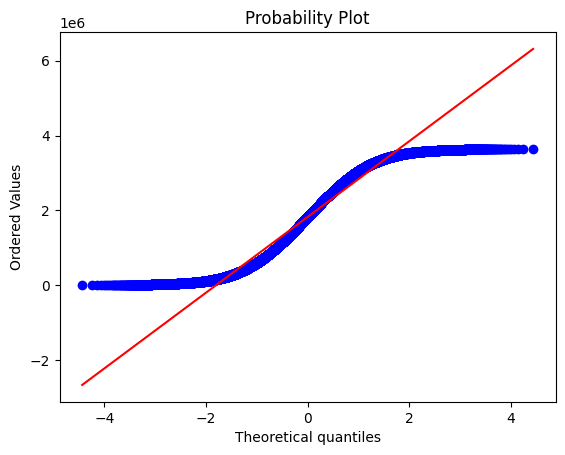

In [53]:
# sns.distplot(data['Social Media DL (Bytes)']) # numeric
sns.distplot(data['social_media'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['social_media'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.xlabel('social media')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['social_media'], plot=plt)
plt.show()


 mu = 495764636.37 and sigma = 244380172.44



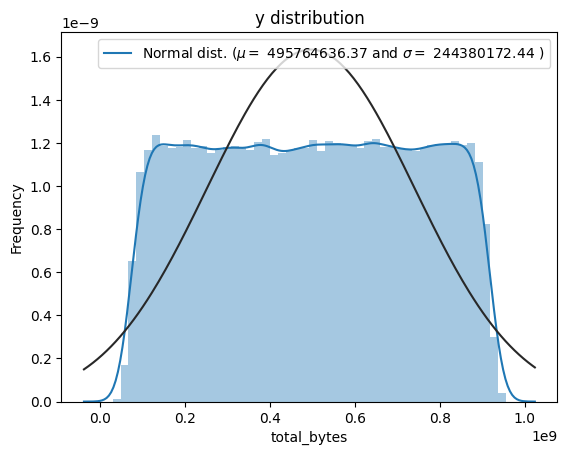

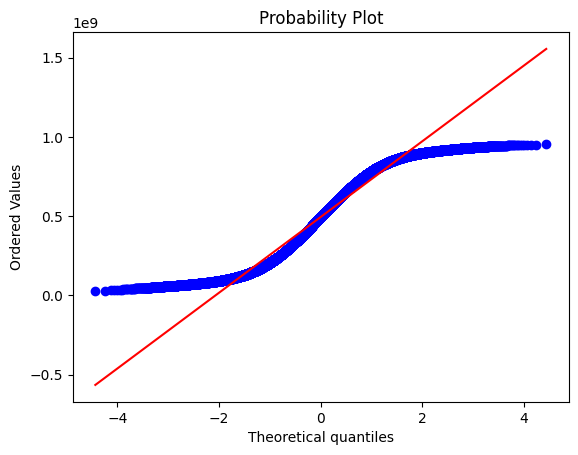

In [54]:
# total upload and download bytes
sns.distplot(data['total_bytes'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['total_bytes'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['total_bytes'], plot=plt)
plt.show()


 mu = 104609105.55 and sigma = 81037071.33



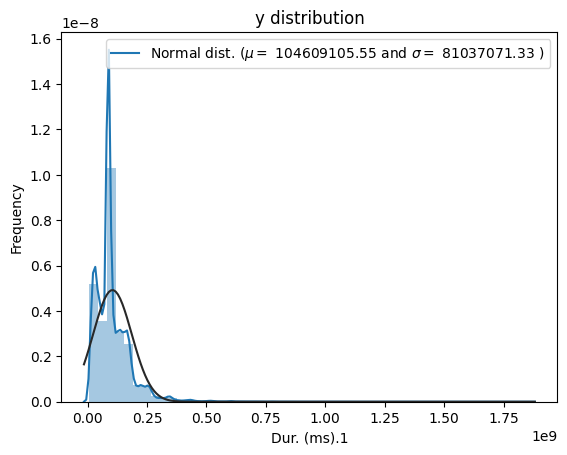

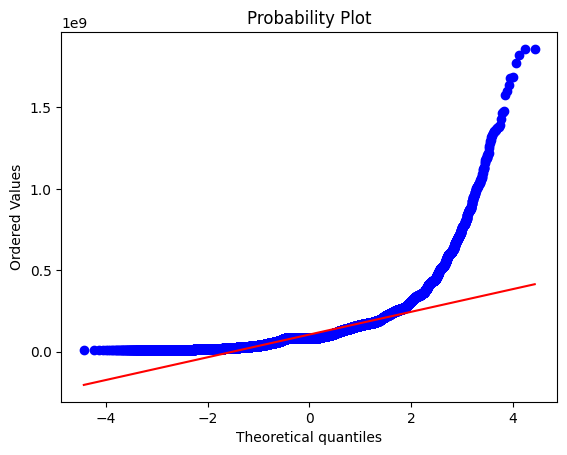

In [55]:
# xdr ms
sns.distplot(data['Dur. (ms).1'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Dur. (ms).1'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Dur. (ms).1'], plot=plt)
plt.show()


Heavily right skewed.


 mu = 15070.47 and sigma = 26825.67



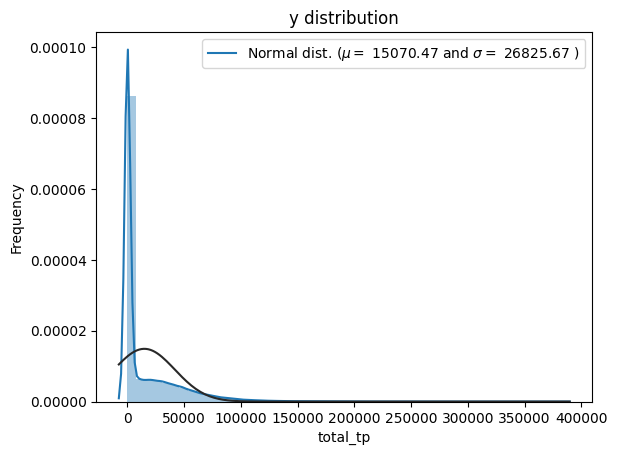

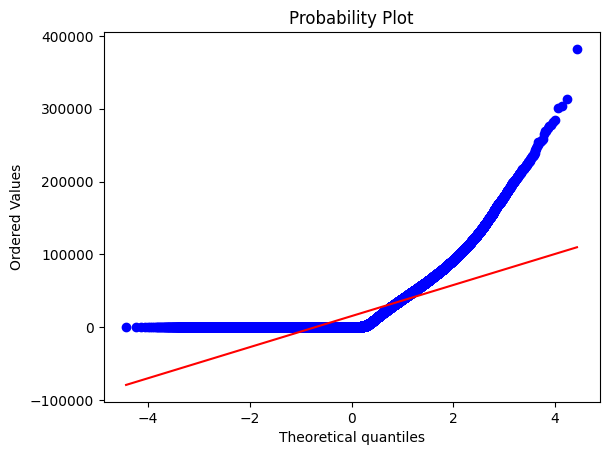

In [56]:
# total_tp
sns.distplot(data['total_tp'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['total_tp'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['total_tp'], plot=plt)
plt.show()

heavily skewed to the right.


 mu = 127.46 and sigma = 565.14



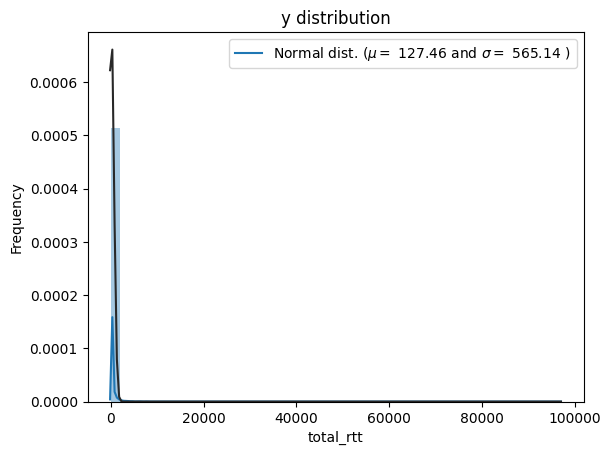

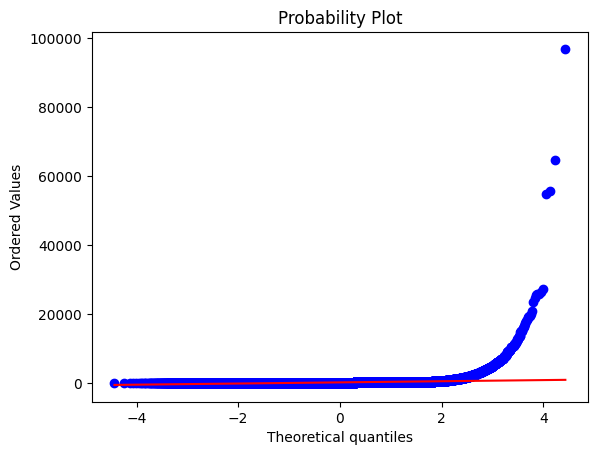

In [57]:
# total_rtt
sns.distplot(data['total_rtt'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['total_rtt'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['total_rtt'], plot=plt)
plt.show()

right tailed too.


 mu = 21569572.94 and sigma = 118438811.90



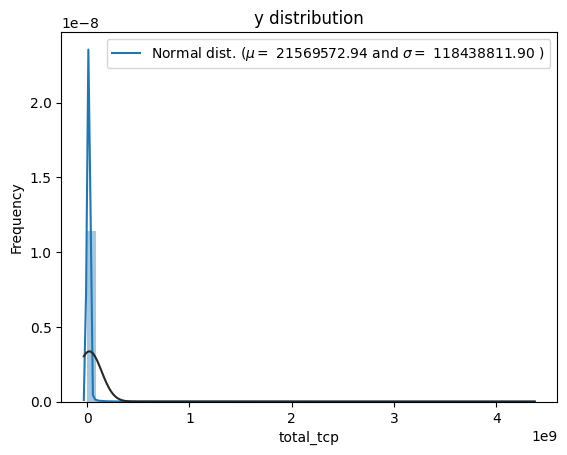

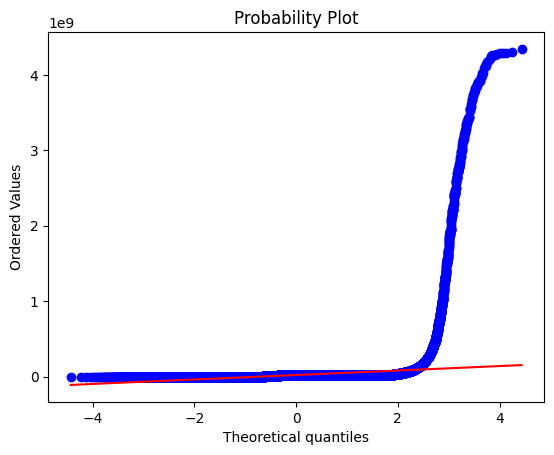

In [58]:
# total_tcp
sns.distplot(data['total_tcp'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['total_tcp'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['total_tcp'], plot=plt)
plt.show()

## Bivariate Analysis
– explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings.

(Social Media, Google, Email, YouTube, Netflix, Gaming ++ total_bytes).

In [59]:
# data['total'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']
# sns.barplot(x = data['social_media'], y = data['total'])

biv_data = data[['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'total_bytes', 'other']]
# adding a summation row in all columns
biv_data.loc['totals'] = biv_data.sum()
biv_data.tail()

social_media        google         email       youtube       netflix  \
149997  2.352181e+06  4.415361e+06  2.121718e+06  2.216552e+07  4.064329e+07   
149998  1.260239e+06  6.585469e+06  2.058277e+06  2.451641e+07  1.502970e+07   
149999  8.231090e+05  7.757267e+06  2.850914e+06  1.712251e+07  1.649484e+07   
150000  1.828250e+06  7.807295e+06  2.259102e+06  2.264348e+07  2.262861e+07   
totals  2.742394e+11  1.171102e+12  3.388676e+11  3.396545e+12  3.394314e+12   

              gaming   total_bytes         other  
149997  6.316281e+08  7.057839e+08  7.146381e+08  
149998  5.669338e+08  6.276986e+08  1.324156e+08  
149999  3.550664e+08  4.015220e+08  8.161200e+08  
150000  4.303331e+08  4.957646e+08  4.293653e+08  
totals  6.455040e+13  7.436519e+13  6.440523e+13

### Applications total bytes

Text(0.5, 0, 'Application')

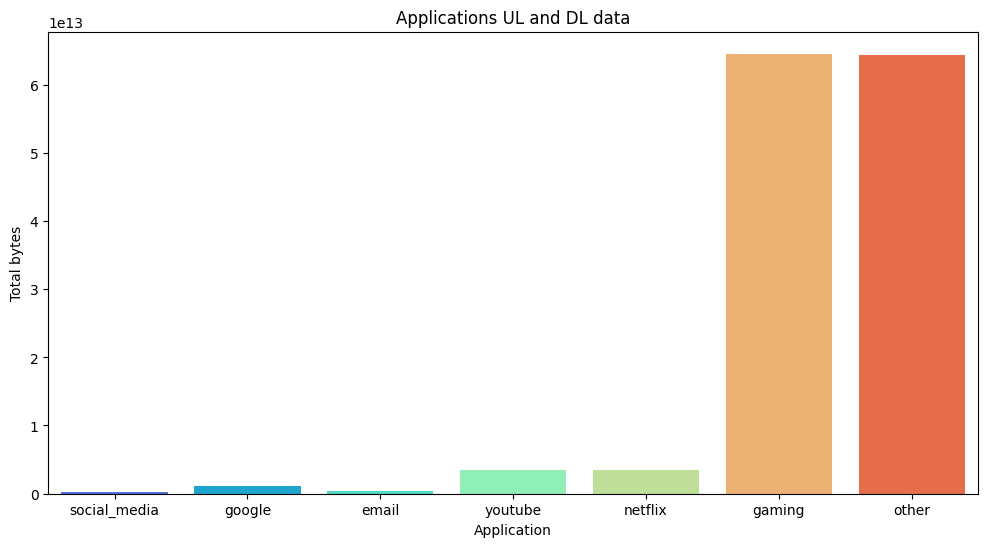

In [60]:
a = biv_data.tail(1)
long_df = pd.melt(a)
long_df = long_df.drop([6], axis  = 0)
plt.figure(figsize=(12,6))
sns.barplot(x = long_df.variable, y = long_df.value,palette='rainbow')
plt.title('Applications UL and DL data')
plt.ylabel('Total bytes')
plt.xlabel('Application')

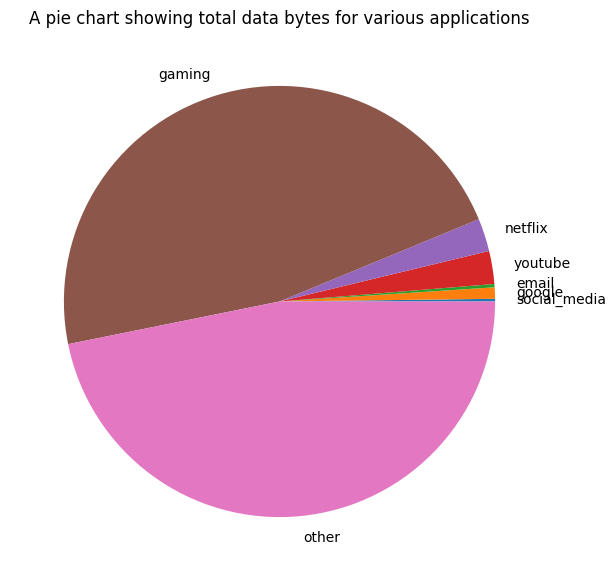

In [61]:
fig = plt.figure(figsize =(10, 7))
a = biv_data.drop(['total_bytes'], axis = 1)
plt.pie(a.loc['totals'], labels = a.columns)
plt.title('A pie chart showing total data bytes for various applications')
plt.show()




*  The large percentage of **others** can be explained by many applications under the name others.
*  As for gaming:
  1. The applications are heavy. (Require more data)
  2. Most of the users are gamers.
  

#### One on one plots on the apps vs total_bytes

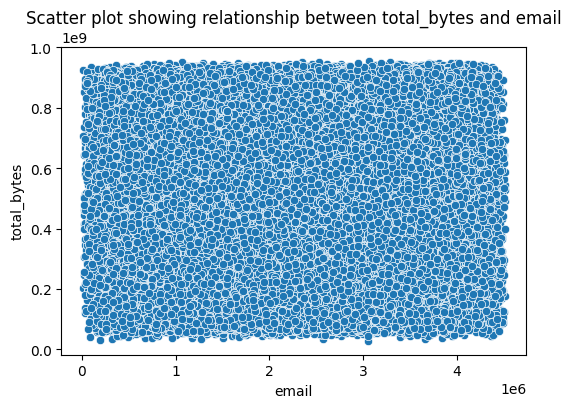

In [62]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = data, x='email', y='total_bytes')
plt.title('Scatter plot showing relationship between total_bytes and email')
plt.show()

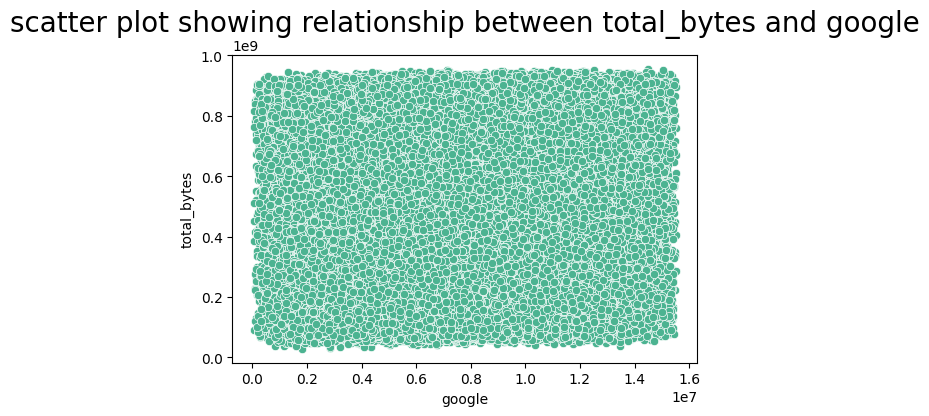

In [63]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = data, x='google', y='total_bytes', color = '#4CB391')
plt.title('scatter plot showing relationship between total_bytes and google', size=20)
plt.show()

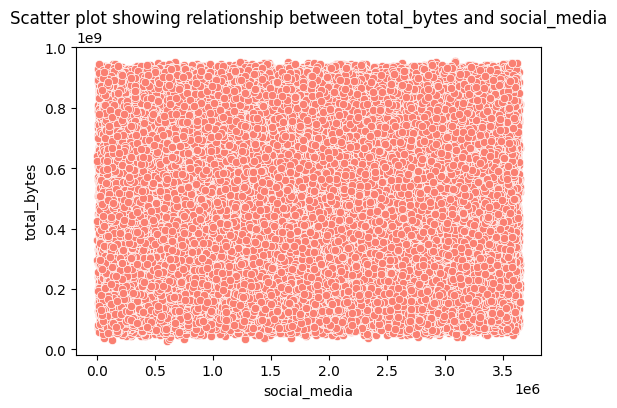

In [64]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = data, x='social_media', y='total_bytes',color='salmon')
plt.title('Scatter plot showing relationship between total_bytes and social_media')
plt.show()

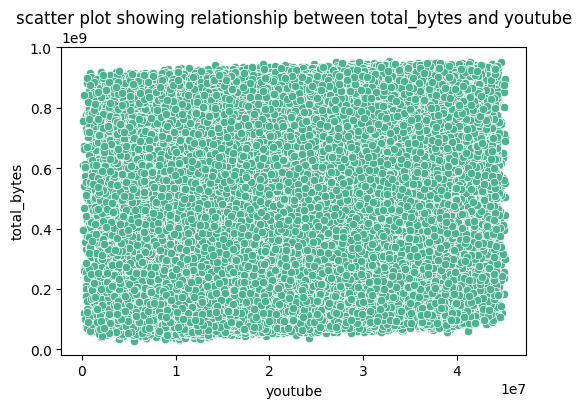

In [65]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = data, x='youtube', y='total_bytes', color = '#4CB391')
plt.title('scatter plot showing relationship between total_bytes and youtube')
plt.show()

cannot see any relation due to whole coverage uniformly.

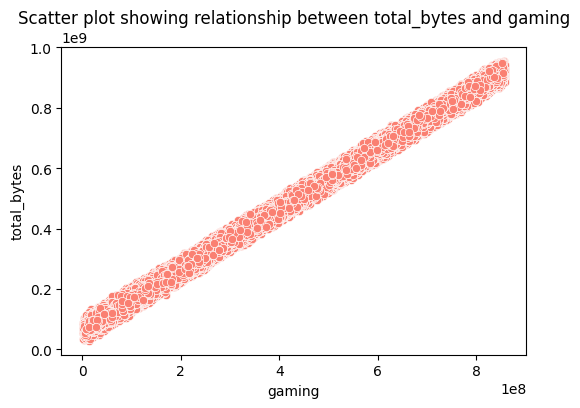

In [66]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = data, x='gaming', y='total_bytes', color = 'salmon')
plt.title('Scatter plot showing relationship between total_bytes and gaming')
plt.show()

clearly shown by the above scatter plot is gaming is complete and higest reletionship between total bytes.

In [67]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = data, x='netflix', y='total_bytes', color = 'yellow')
plt.title('Scatter plot showing relationship between total_bytes and netflix')
plt.show()

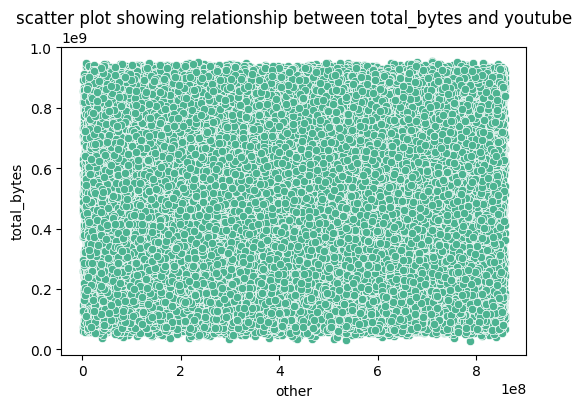

In [68]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = data, x='other', y='total_bytes', color = '#4CB391')
plt.title('scatter plot showing relationship between total_bytes and youtube')
plt.show()

## **Variable** **Transformations**
– segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.


In [69]:
# adding Decile_rank column to the DataFrame
data['Decile_rank'] = pd.qcut(data['Dur. (ms).1'], 5, labels = False)
# data.columns

In [70]:
new_df = data[['Decile_rank', 'total_bytes']]
a = new_df.groupby('Decile_rank').sum()
a

total_bytes
Decile_rank              
0            1.488404e+13
1            1.492541e+13
2            1.478282e+13
3            1.485458e+13
4            1.491834e+13

Text(0.5, 0, 'decile rank')

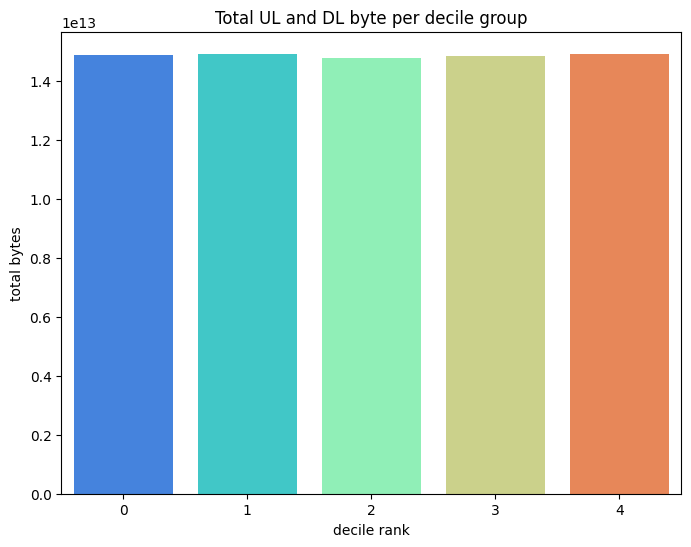

In [71]:
plt.figure(figsize=(8,6))
sns.barplot(x = a.index, y = a.total_bytes,palette='rainbow')
plt.title('Total UL and DL byte per decile group')
plt.ylabel('total bytes')
plt.xlabel('decile rank')

## Correlation Analysis
– compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data - (jupyter notebook + slide )

Correlation on the total bytes

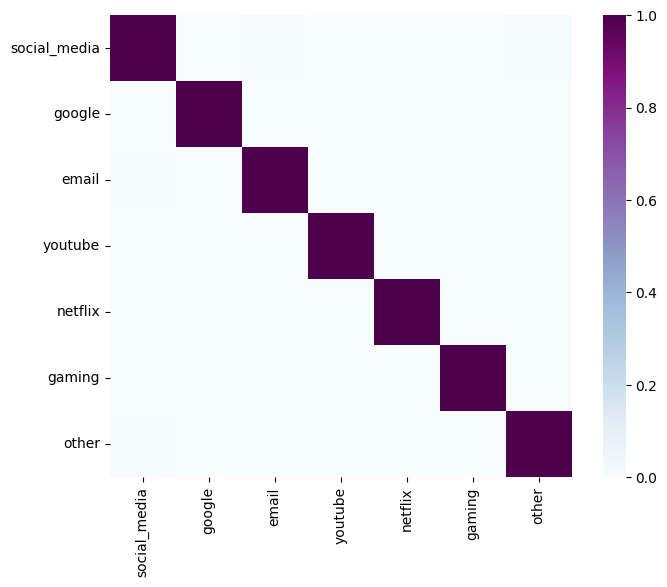

In [72]:
corr_data = data[['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']]


corr = corr_data.corr()
f_fig, f_ax = plt.subplots(figsize=(8, 6))
f_ax = sns.heatmap(corr, vmin=0, vmax=1, square=True,
                   annot=False, annot_kws={"size": 10}, cmap="BuPu")

##### The correlation between the variables is super low.

### On the upload bytes

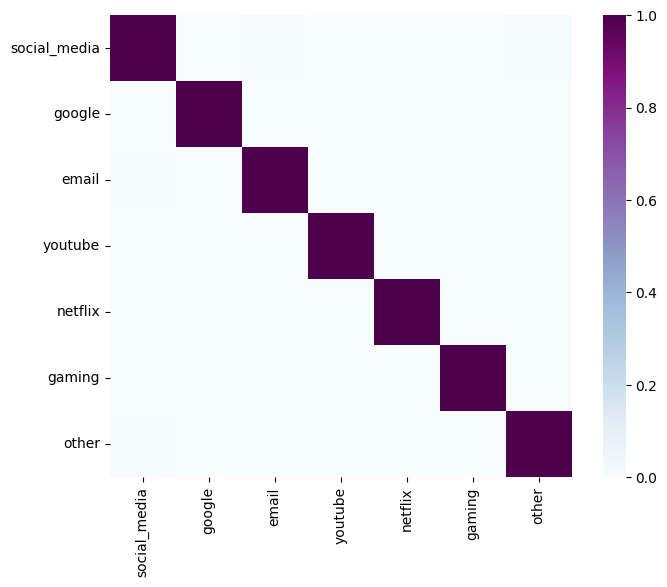

In [73]:
orr_data = data[['Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']]


corr = corr_data.corr()
f_fig, f_ax = plt.subplots(figsize=(8, 6))
f_ax = sns.heatmap(corr, vmin=0, vmax=1, square=True,
                   annot=False, annot_kws={"size": 10}, cmap="BuPu")

##### The correlation between the variables is super low.

### On the download bytes

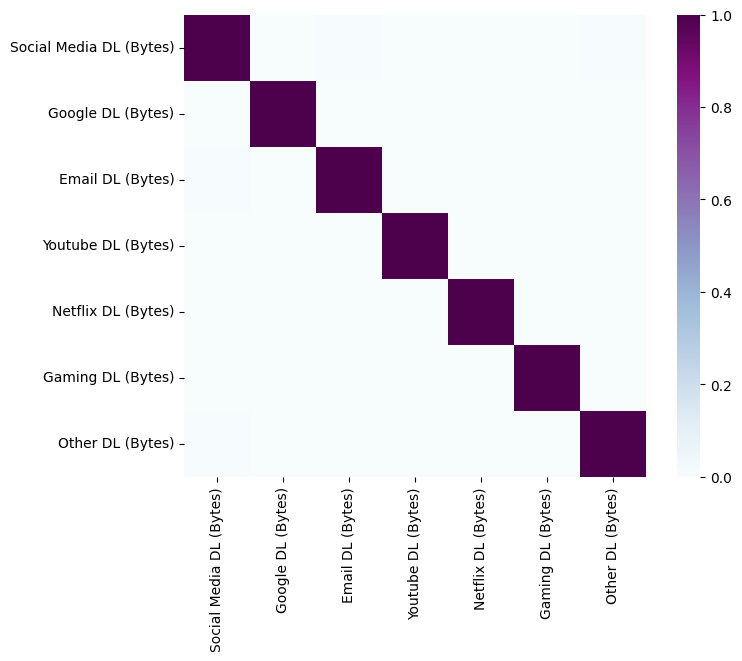

In [74]:
corr_data = data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']]


corr = corr_data.corr()
f_fig, f_ax = plt.subplots(figsize=(8, 6))
f_ax = sns.heatmap(corr, vmin=0, vmax=1, square=True,
                   annot=False, annot_kws={"size": 10}, cmap="BuPu")

##### The correlation between the variables is super low.

## **Dimensionality Reduction**
– perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results.

In [75]:
# standardize the data
from sklearn.preprocessing import StandardScaler

new_numerical = [] #this leaves out the categorical columns that were encoded but not replaced
for col in data.columns:
    if data[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        new_numerical.append(col)

seg = data[new_numerical].copy()
seg = seg.drop(['MSISDN/Number'], axis = 1) #  drop the id col

# Handle missing values before scaling - Imputation with mean
# If seg has NaN values we can fill them with the mean of their respective column
# If you prefer, you can use other strategies like median, or a constant value
seg = seg.fillna(seg.mean()) # Fill NaNs with the mean of each column

# You can check if you still have NaNs with:
# print(np.any(np.isnan(seg))) # Should print False if no NaNs remain

scaler = StandardScaler()
scaled_data = scaler.fit_transform(seg)



In [76]:
scaled_data.shape

(150001, 64)

In [77]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [78]:
pca.explained_variance_ratio_

array([1.27522336e-01, 6.24869936e-02, 5.19284068e-02, 4.50661462e-02,
       3.98179627e-02, 3.54375697e-02, 3.26264099e-02, 3.16059460e-02,
       3.14474506e-02, 3.12652367e-02, 3.10646866e-02, 3.09406230e-02,
       3.03966735e-02, 2.74444877e-02, 2.60435371e-02, 2.34183567e-02,
       2.27603861e-02, 2.18063706e-02, 1.76146270e-02, 1.75153249e-02,
       1.57778992e-02, 1.57394322e-02, 1.56751263e-02, 1.56198681e-02,
       1.56008199e-02, 1.55187372e-02, 1.54685100e-02, 1.54585070e-02,
       1.51929289e-02, 1.42550666e-02, 1.37188255e-02, 1.22995803e-02,
       1.14066526e-02, 1.08711957e-02, 9.57101408e-03, 8.33769608e-03,
       7.60538635e-03, 6.56871031e-03, 5.87938373e-03, 4.61461484e-03,
       4.50412955e-03, 4.28496289e-03, 2.76039131e-03, 2.41196329e-03,
       1.26093455e-03, 9.93898766e-04, 2.56881895e-04, 6.80110981e-05,
       5.54036997e-05, 1.39362373e-05, 1.16883913e-13, 3.35877505e-17,
       3.03402008e-17, 2.26450895e-17, 1.06761185e-17, 5.35791759e-18,
      

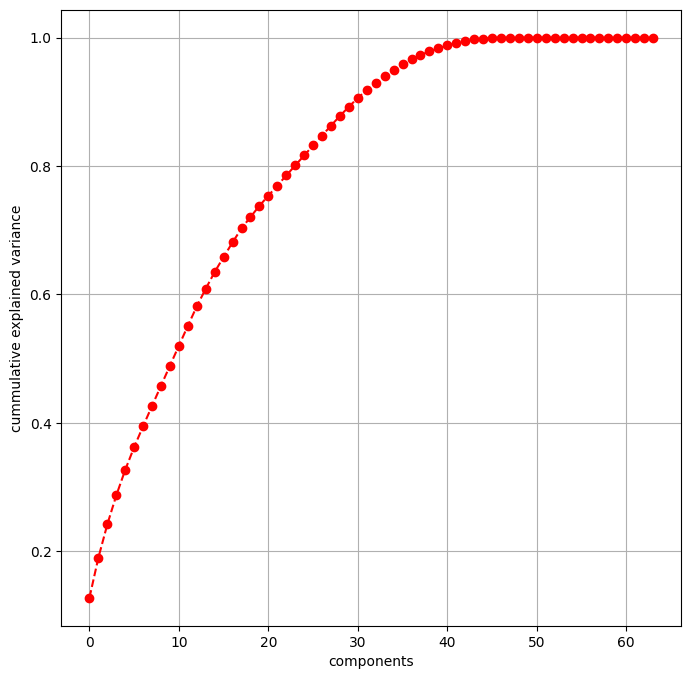

In [79]:
plt.figure(figsize =(8,8))
plt.plot(range(64), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--',color='red')
plt.xlabel('components')
plt.ylabel('cummulative explained variance')
plt.grid(True)

When choosing the number of components, the number cutting at least 80% of the cumm explained variance is considered.
**n = 23**

In [80]:
pca = PCA(n_components = 23)
pca.fit(scaled_data)

PCA(n_components=23)

In [81]:
pca_scores = pca.transform(scaled_data)

In [82]:
 #new_data_df = pd.concat([seg.reset_index(drop = True), pd.DataFrame(pca_scores)], axis = 1)
# c.columns.values[-2:] = ['component1', 'component2']
# new_data_df.head() #contains the original cols

a = pd.DataFrame(pca_scores)
a['MSISDN/Number'] = data['MSISDN/Number']
a.head()

0         1          2         3         4          5         6  \
0 -4.339543 -1.295494  16.398725  8.110132 -0.411590  12.344594 -4.863660   
1 -3.464671  1.623387  12.215969  6.060797  3.424208   9.202396 -2.967714   
2 -3.514428 -1.592312  12.207170  6.002576  0.387645   9.216493 -3.081598   
3 -3.485900  3.142763  12.016955  5.994157  0.983779   9.911432 -1.956751   
4 -3.061899  0.837077   9.790143  4.804707  0.551489   7.484341 -2.098889   

          7         8         9  ...        14        15        16        17  \
0 -1.601581  1.112898 -0.582511  ... -0.218096 -1.906942 -0.685196 -1.005143   
1  0.749712 -0.565847 -2.418601  ... -0.239329 -1.190732  1.206630 -0.785048   
2  0.222375 -0.127219  1.489492  ... -0.191225 -1.153744  2.641960 -0.852665   
3  1.894855 -2.116696  0.716615  ... -0.254962 -1.152891  0.339506 -0.579471   
4  1.026387 -1.365974 -0.322380  ... -0.137914 -0.918570  0.779164 -0.557033   

         18        19        20        21        22  MSISDN/Number  
0  2.995625  0.456508 -0.058087 -0.275738 -0.136825   3.366496e+10  
1  3.258875 -0.916098 -1.925977 -0.481827 -1.019310   3.368185e+10  
2  2.156473 -1.274790 -0.391553  0.311419 -0.414482   3.376063e+10  
3  2.959542 -1.333824  0.334926  0.252601 -0.530556   3.375034e+10  
4  2.269566  0.956836 -1.645448  1.485138 -0.159311   3.369980e+10  

[5 rows x 24 columns]

<Axes: xlabel='0', ylabel='1'>

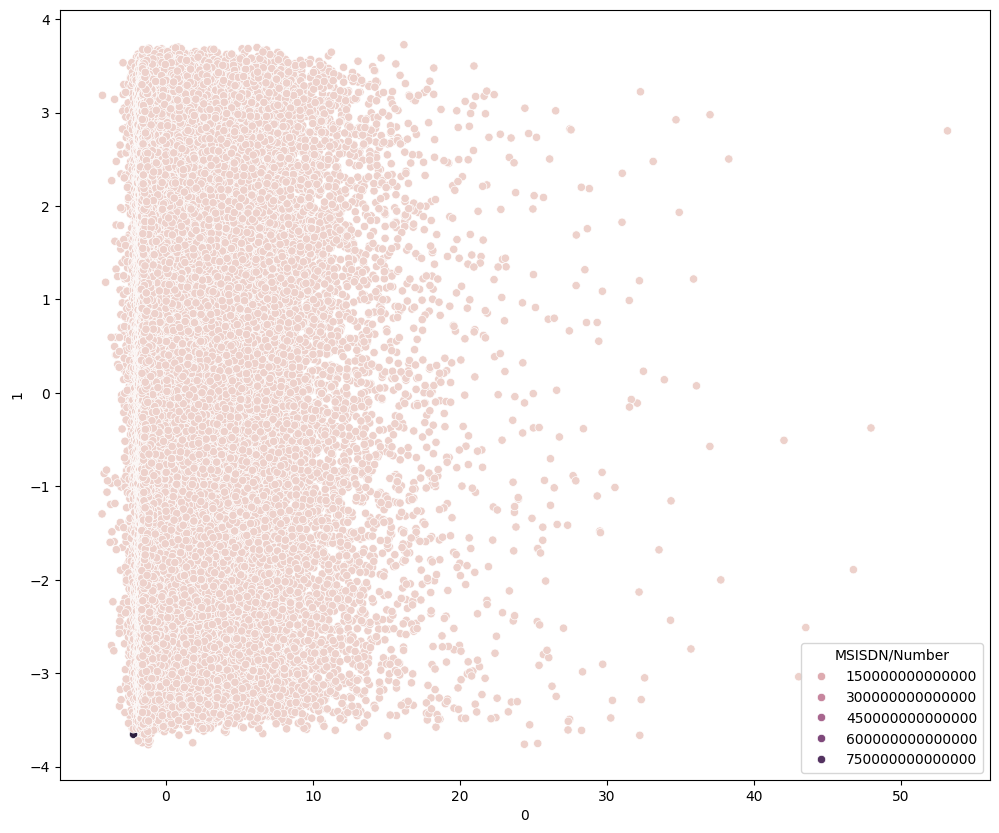

In [83]:
#plotting the first 2 components since they explain most of the variability.
plt.figure(figsize=(12,10))
sns.scatterplot(x= a[0], y = a[1], hue = a['MSISDN/Number'])

## **2. User Engagement analysis**
In the current dataset you’re expected to track the user’s engagement using the following engagement metrics:
* sessions frequency
* the duration of the session
* the sessions total traffic (download and upload (bytes))


In [84]:
data.columns


Index(['Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (

In [85]:
data['MSISDN/Number'].nunique()

106856

### * Sessions frequency, sessions duration, sessions total traffic.

In [86]:
user_data = data[['MSISDN/Number', 'total_bytes', 'Dur. (ms).1', 'Bearer Id']]

# def f(x):
#     d = {}
#     d['total_bytes'] = x['total_bytes'].sum()
#     d['Dur. (ms).1'] = x['Dur. (ms).1'].sum()
#     d['Bearer Id'] = x['Bearer Id'].count()
#     return pd.Series(d, index=['total_bytes', 'Dur. (ms).1', 'Bearer Id'])

# user_data.groupby('MSISDN/Number').apply(f)

In [87]:
agg_user_data = user_data.groupby('MSISDN/Number').agg({'Bearer Id':'count', 'Dur. (ms).1':'sum',  'total_bytes': 'sum'})
agg_user_data.columns = ['sessions_freq', 'sessions_duration(ms)', 'sessions_traffic(bytes)']
agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)
MSISDN/Number                                                               
3.360100e+10               1            116720140.0             8.786906e+08
3.360100e+10               1            181230963.0             1.568596e+08
3.360100e+10               1            134969374.0             5.959665e+08
3.360101e+10               1             49878024.0             4.223207e+08
3.360101e+10               2             37104453.0             1.457411e+09

### Top 10 users with high sessions frequency

Text(0.5, 1.0, 'a barplot indicating 10 users with highest number of sessions')

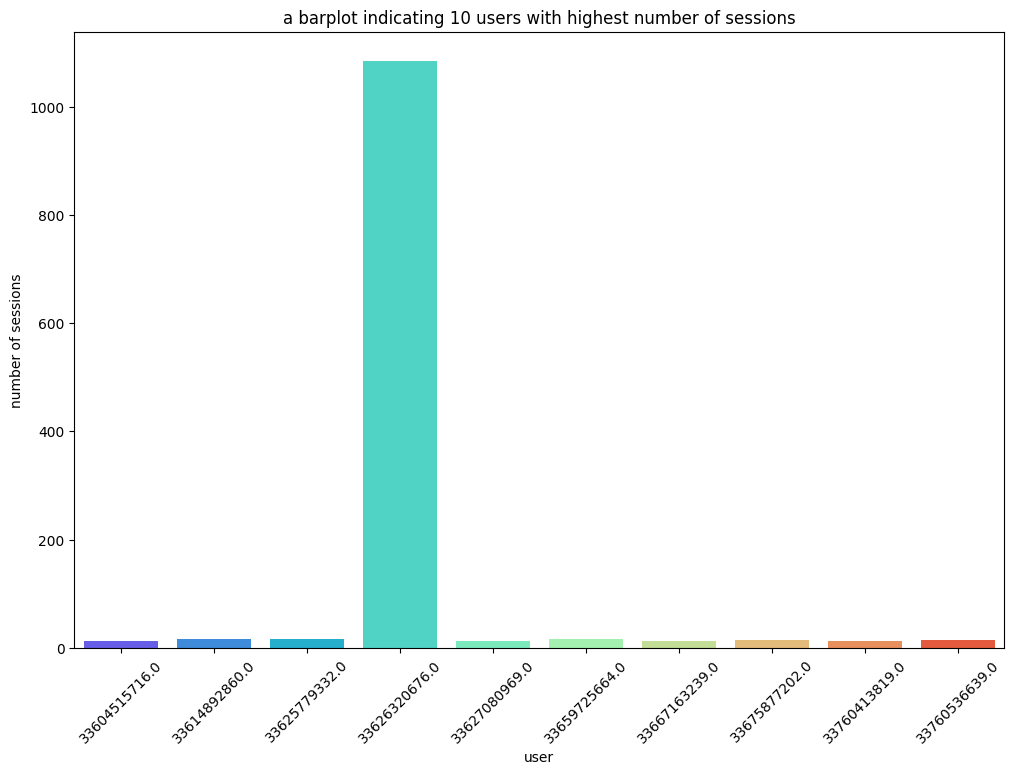

In [88]:
a = agg_user_data.sort_values(by = 'sessions_freq', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = a.index, y = a['sessions_freq'],palette='rainbow')
plt.ylabel('number of sessions')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest number of sessions')

most higest session frequency is shown in this MSMID/NUMBER 33626320676.0

### Top 10 users with high sessions traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest sessions traffic')

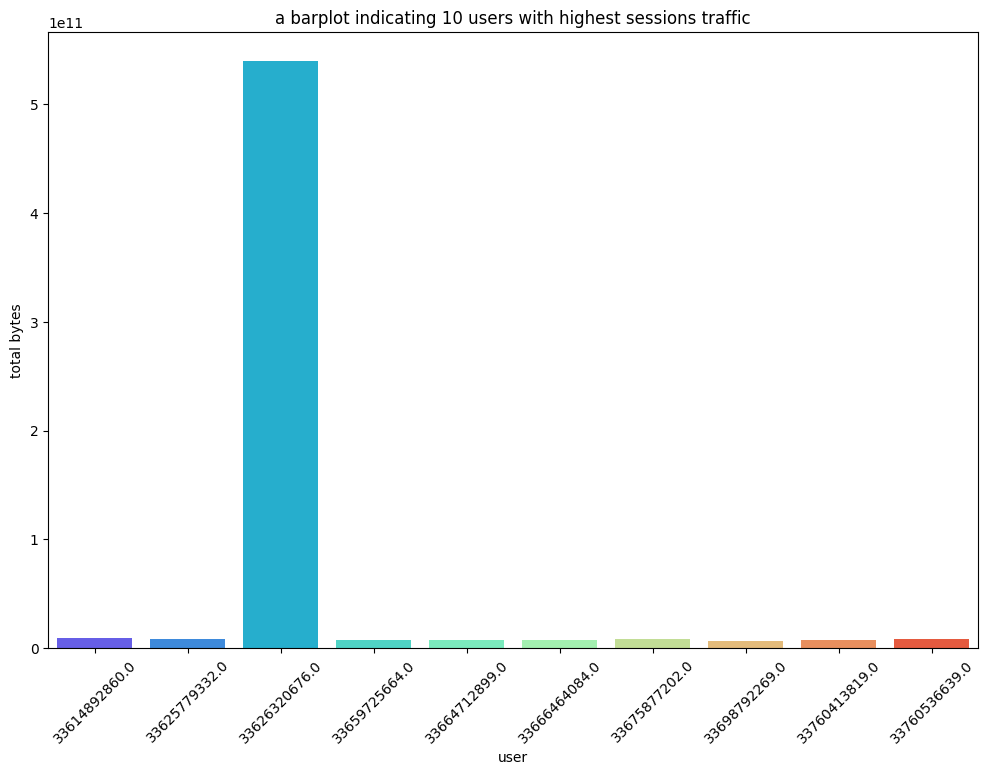

In [89]:
b = agg_user_data.sort_values(by = 'sessions_traffic(bytes)', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = b.index, y = b['sessions_traffic(bytes)'],palette='rainbow')
plt.ylabel('total bytes')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest sessions traffic')

### Top 10 users with longest sessions duration

Text(0.5, 1.0, 'a barplot indicating 10 users with longest sessions duration')

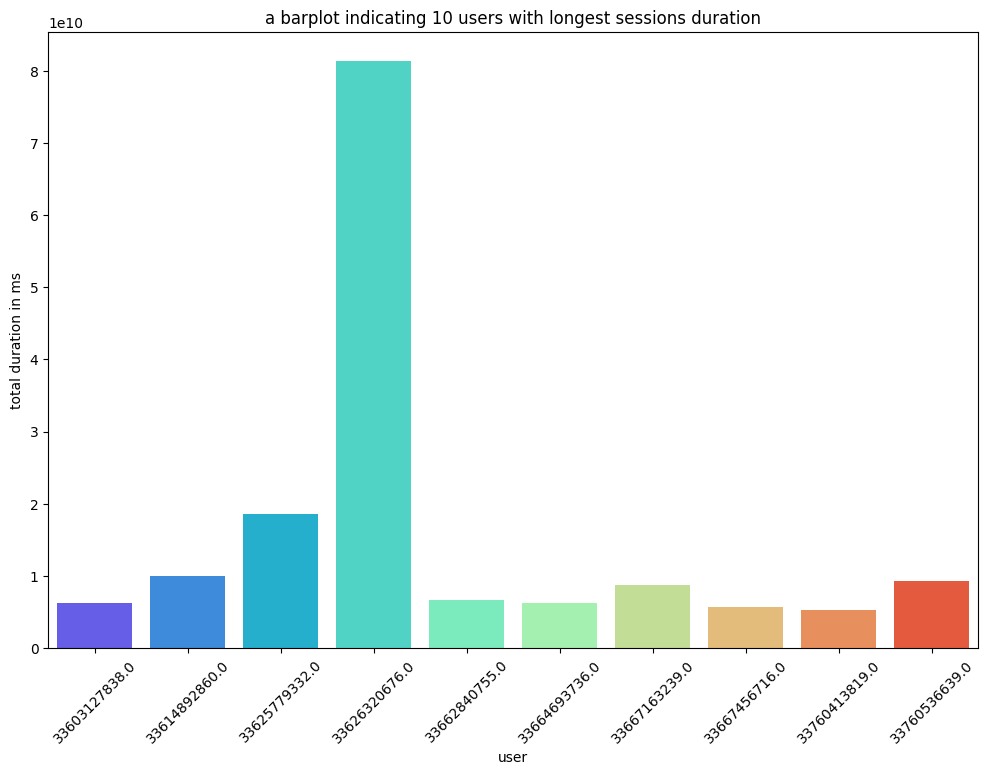

In [90]:
c = agg_user_data.sort_values(by = 'sessions_duration(ms)', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x=c.index,y=c['sessions_duration(ms)'],palette='rainbow')
plt.ylabel('total duration in ms')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with longest sessions duration')

4TH NO id user is highest user in top 10 in total duration.

In [91]:
# users in the 3 categories(Sessions frequency, sessions duration, sessions total traffic.)
a = a.index.to_list()
b = b.index.to_list()
c = c.index.to_list()

def IntersecOfSets(arr1, arr2, arr3):
    s1 = set(arr1)
    s2 = set(arr2)
    s3 = set(arr3)

    set1 = s1.intersection(s2)
    result_set = set1.intersection(s3)

    final_list = list(result_set)
    print(final_list)

IntersecOfSets(a, b, c)

[33625779332.0, 33626320676.0, 33760413819.0, 33614892860.0, 33760536639.0]


### Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.


In [92]:
# Normalizing the aggregated dataset using log transformation
norm_agg_user_data = np.log1p(agg_user_data)
norm_agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)
MSISDN/Number                                                               
3.360100e+10        0.693147              18.575290                20.593943
3.360100e+10        0.693147              19.015283                18.870862
3.360100e+10        0.693147              18.720558                20.205695
3.360101e+10        0.693147              17.725091                19.861276
3.360101e+10        1.098612              17.429248                21.099927

In [93]:
norm_agg_user_data.shape

(106856, 3)

In [94]:
 # kmeans on 3 clusters.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(norm_agg_user_data)
kmeans_data = kmeans.predict(norm_agg_user_data)

In [95]:
# add the predicted clusters as a column in the df
norm_agg_user_data['clusters'] = pd.Series(kmeans_data, index=norm_agg_user_data.index)
norm_agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.360100e+10        0.693147              18.575290                20.593943   
3.360100e+10        0.693147              19.015283                18.870862   
3.360100e+10        0.693147              18.720558                20.205695   
3.360101e+10        0.693147              17.725091                19.861276   
3.360101e+10        1.098612              17.429248                21.099927   

               clusters  
MSISDN/Number            
3.360100e+10          2  
3.360100e+10          2  
3.360100e+10          2  
3.360101e+10          1  
3.360101e+10          1

<Axes: >

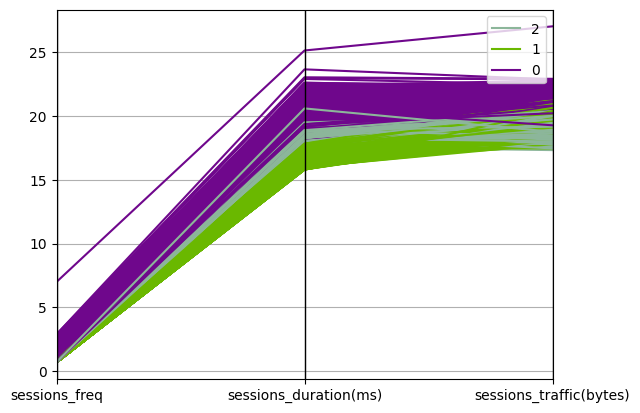

In [96]:
#plot the clusters(3D)
pd.plotting.parallel_coordinates(norm_agg_user_data, 'clusters')

CLUSTER 0 AND 1 IS HAVING MOST COVERAGE AS COMPARE TO CLUSTER 2.

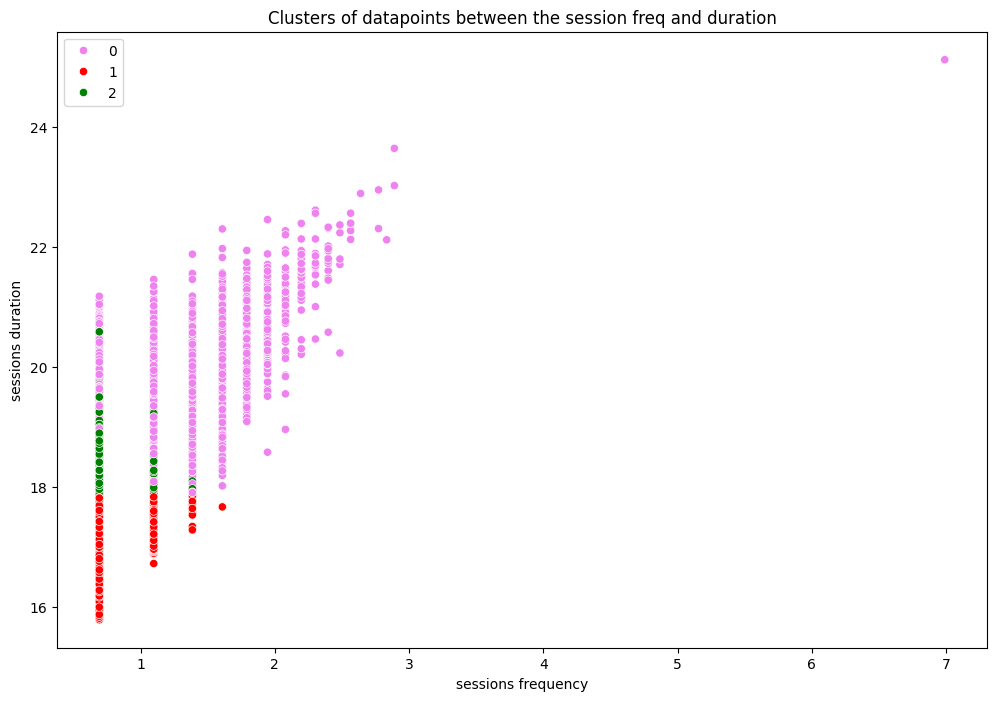

In [97]:
# comparing the clusters in variable pairs

# frequency and duration
x = norm_agg_user_data[['sessions_freq', 'sessions_duration(ms)', 'clusters']]
plt.figure(figsize = (12,8))
sns.scatterplot(x = norm_agg_user_data['sessions_freq'],  y = norm_agg_user_data['sessions_duration(ms)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
plt.title('Clusters of datapoints between the session freq and duration')
plt.xlabel('sessions frequency')
plt.ylabel('sessions duration')
plt.legend()

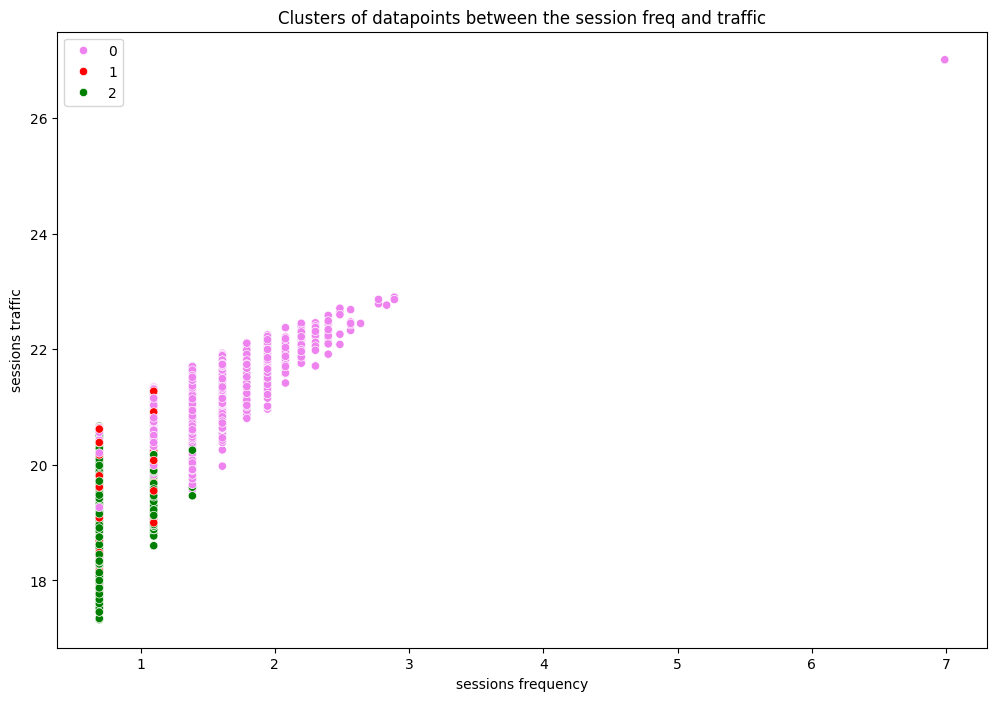

In [98]:
# comparing the clusters in variable pairs

# frequency and traffic
x = norm_agg_user_data[['sessions_freq', 'sessions_traffic(bytes)', 'clusters']]
plt.figure(figsize = (12,8))
sns.scatterplot(x = norm_agg_user_data['sessions_freq'],  y = norm_agg_user_data['sessions_traffic(bytes)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session freq and traffic')
plt.xlabel('sessions frequency')
plt.ylabel('sessions traffic')
plt.legend()

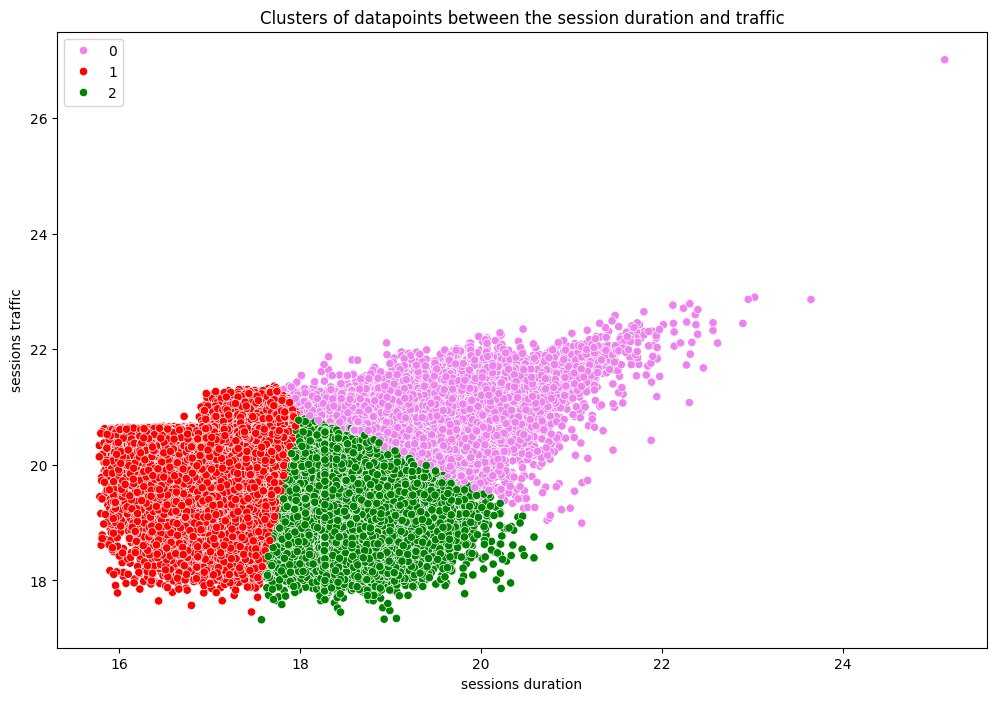

In [99]:
# comparing the clusters in variable pairs

# duration and traffic
x = norm_agg_user_data[['sessions_duration(ms)', 'sessions_traffic(bytes)', 'clusters']]
plt.figure(figsize = (12,8))
sns.scatterplot(x = norm_agg_user_data['sessions_duration(ms)'],  y = norm_agg_user_data['sessions_traffic(bytes)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session duration and traffic')
plt.xlabel('sessions duration')
plt.ylabel('sessions traffic')
plt.legend()

# Interpretation:

Cluster 0 (pink) appears to contain sessions with higher values for both duration and traffic. These sessions might represent users who are more engaged or visiting more pages during a session.
Cluster 1 (red) and Cluster 2 (green) have lower session durations and traffic, but they are separated from each other, possibly indicating two different types of user behavior or session patterns with similar session durations but varying traffic intensities.
These clusters likely reflect different segments of user behavior on a website or platform.

### * Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text.

In [100]:
# add the clusters column to the non normalized data
agg_user_data['clusters'] = kmeans_data
agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.360100e+10               1            116720140.0             8.786906e+08   
3.360100e+10               1            181230963.0             1.568596e+08   
3.360100e+10               1            134969374.0             5.959665e+08   
3.360101e+10               1             49878024.0             4.223207e+08   
3.360101e+10               2             37104453.0             1.457411e+09   

               clusters  
MSISDN/Number            
3.360100e+10          2  
3.360100e+10          2  
3.360100e+10          2  
3.360101e+10          1  
3.360101e+10          1

In [101]:
agg_user_data.clusters.value_counts()

clusters
2    54867
0    29428
1    22561
Name: count, dtype: int64

In [102]:
# cluster 1 (cluster = 0)
cluster_1 = agg_user_data.loc[agg_user_data['clusters'] == 0]   #get observations under cluster 1
# cluster_1.loc['total_per_metric'] = cluster_1.sum()             #get the totals per metric
print(cluster_1.shape)
cluster_1.tail()

(29428, 4)


sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.378989e+10               1            173035258.0             8.529393e+08   
3.378995e+10               2            209051329.0             1.540055e+09   
3.378998e+10               2            210390146.0             1.094693e+09   
3.197021e+12               1            877385325.0             2.321240e+08   
3.370000e+14               1            253030201.0             5.962878e+08   

               clusters  
MSISDN/Number            
3.378989e+10          0  
3.378995e+10          0  
3.378998e+10          0  
3.197021e+12          0  
3.370000e+14          0

In [103]:
cluster_1.describe() # get the min, max and average per metric in cluster 1

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
count   29428.000000           2.942800e+04             2.942800e+04   29428.0
mean        2.258529           2.890491e+08             1.224681e+09       0.0
std         6.401256           5.573303e+08             3.191384e+09       0.0
min         1.000000           5.447539e+07             1.770069e+08       0.0
25%         2.000000           1.727941e+08             8.220985e+08       0.0
50%         2.000000           2.260368e+08             1.061215e+09       0.0
75%         3.000000           3.319909e+08             1.445814e+09       0.0
max      1084.000000           8.134348e+10             5.397159e+11       0.0

In [104]:
# cluster 2 (cluster = 1)
cluster_2 = agg_user_data.loc[agg_user_data['clusters'] == 1]   #get observations under cluster 2
# cluster_2.loc['total_per_metric'] = cluster_2.sum()             #get the totals per metric
print(cluster_2.shape)
cluster_2.tail()

(22561, 4)


sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.378988e+10               1             47989629.0              610571467.0   
3.378991e+10               1             44199417.0              902088414.0   
3.378992e+10               1             54339643.0              576824365.0   
3.378994e+10               1             36812757.0              193917233.0   
3.379000e+10               1              8810688.0              714641641.0   

               clusters  
MSISDN/Number            
3.378988e+10          1  
3.378991e+10          1  
3.378992e+10          1  
3.378994e+10          1  
3.379000e+10          1

In [105]:
cluster_2.describe() # get the min, max and average per metric in cluster 2

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
count   22561.000000           2.256100e+04             2.256100e+04   22561.0
mean        1.110678           3.169313e+07             5.662824e+08       1.0
std         0.315992           1.339105e+07             2.960924e+08       0.0
min         1.000000           7.142988e+06             3.802236e+07       1.0
25%         1.000000           2.087611e+07             3.318731e+08       1.0
50%         1.000000           3.038428e+07             5.600353e+08       1.0
75%         1.000000           4.157269e+07             7.682742e+08       1.0
max         4.000000           6.465030e+07             1.895711e+09       1.0

In [106]:
# cluster 3 (cluster = 2)
cluster_3 = agg_user_data.loc[agg_user_data['clusters'] == 2]   #get observations under cluster 3
# cluster_3.loc['total_per_metric'] = cluster_3.sum()             #get the totals per metric
print(cluster_3.shape)
cluster_3.tail()

(54867, 4)


sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.378996e+10               1             98826284.0              645777687.0   
3.378996e+10               1            157069852.0              710287575.0   
3.378997e+10               1            160461578.0              208123067.0   
3.379000e+10               1            140988659.0              480307335.0   
8.823971e+14               1            869844200.0              139153646.0   

               clusters  
MSISDN/Number            
3.378996e+10          2  
3.378996e+10          2  
3.378997e+10          2  
3.379000e+10          2  
8.823971e+14          2

In [107]:
cluster_3.describe() # get the min, max and average per metric in cluster 3

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
count   54867.000000           5.486700e+04             5.486700e+04   54867.0
mean        1.065832           1.179271e+08             4.656603e+08       2.0
std         0.249310           5.132611e+07             2.358966e+08       0.0
min         1.000000           4.285693e+07             3.324901e+07       2.0
25%         1.000000           8.639992e+07             2.666738e+08       2.0
50%         1.000000           9.835240e+07             4.548562e+08       2.0
75%         1.000000           1.414955e+08             6.526841e+08       2.0
max         3.000000           1.035262e+09             1.214536e+09       2.0

### * Aggregate user total traffic per application and derive the top 10 most engaged users per application


In [108]:
apps_traffic = data[['social_media', 'netflix', 'youtube', 'google', 'email', 'gaming', 'other', 'MSISDN/Number']]
apps_traffic.tail()

social_media       netflix       youtube        google         email  \
149996  3.517065e+06  3.756186e+07  2.795510e+07  1.278491e+07  6.908760e+05   
149997  2.352181e+06  4.064329e+07  2.216552e+07  4.415361e+06  2.121718e+06   
149998  1.260239e+06  1.502970e+07  2.451641e+07  6.585469e+06  2.058277e+06   
149999  8.231090e+05  1.649484e+07  1.712251e+07  7.757267e+06  2.850914e+06   
150000  1.828250e+06  2.262861e+07  2.264348e+07  7.807295e+06  2.259102e+06   

              gaming         other  MSISDN/Number  
149996  5.358069e+08  1.675193e+07   3.365069e+10  
149997  6.316281e+08  7.146381e+08   3.366345e+10  
149998  5.669338e+08  1.324156e+08   3.362189e+10  
149999  3.550664e+08  8.161200e+08   3.361962e+10  
150000  4.303331e+08  4.293653e+08   3.362632e+10

In [109]:
agg_apps_traffic = apps_traffic.groupby('MSISDN/Number').agg({'social_media':'sum', 'netflix':'sum', 'youtube':'sum', 'gaming':'sum',
                                                            'google':'sum', 'email':'sum', 'other':'sum'})
agg_apps_traffic.head()

social_media     netflix     youtube        gaming      google  \
MSISDN/Number                                                                   
3.360100e+10      2232135.0  27180981.0  21624548.0  8.124587e+08   4389005.0   
3.360100e+10      2660565.0  11221763.0  12432223.0  1.197501e+08   5334863.0   
3.360100e+10      3195623.0  19353900.0  21333570.0  5.388277e+08   3443126.0   
3.360101e+10       280294.0   1942092.0   6977321.0  3.911261e+08   9678493.0   
3.360101e+10      2912542.0  49201724.0  41533002.0  1.314798e+09  18499616.0   

                   email        other  
MSISDN/Number                          
3.360100e+10   1331362.0  386570872.0  
3.360100e+10   3307781.0  281710071.0  
3.360100e+10   3205380.0  501693672.0  
3.360101e+10   2284670.0   35279702.0  
3.360101e+10   3305469.0  804804484.0

#### 10 users with highest social media traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest social_media traffic')

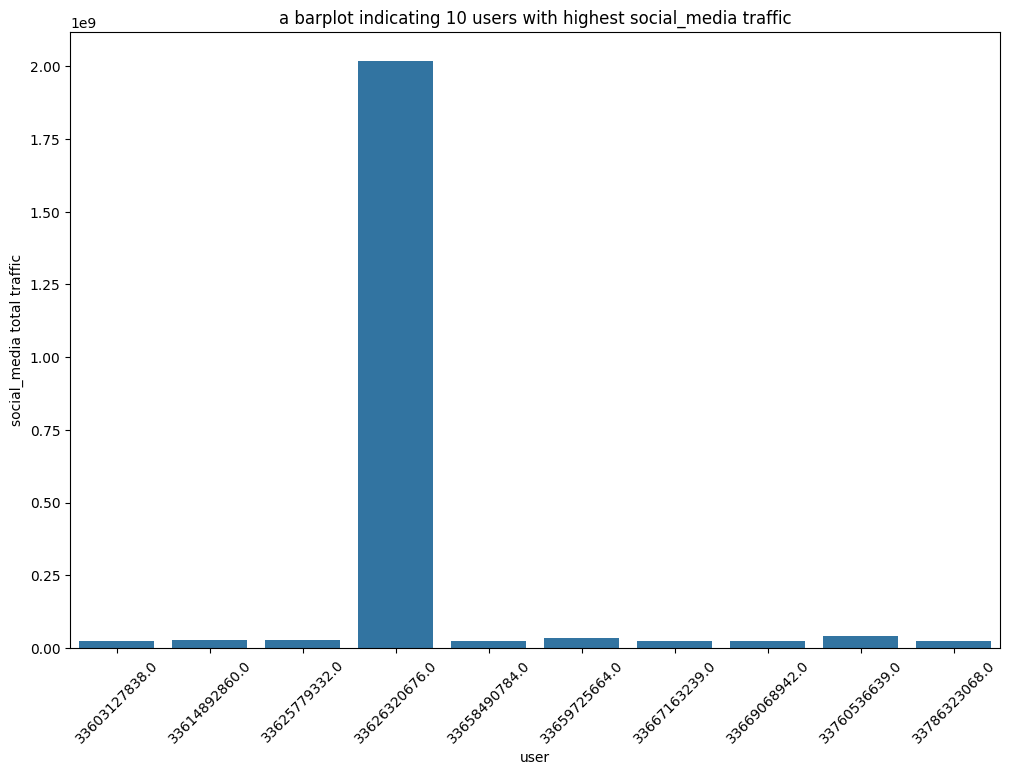

In [110]:
b = agg_apps_traffic.sort_values(by = 'social_media', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = b.index, y = b['social_media'])
plt.ylabel('social_media total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest social_media traffic')

#### 10 users with highest netflix traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest netflix traffic')

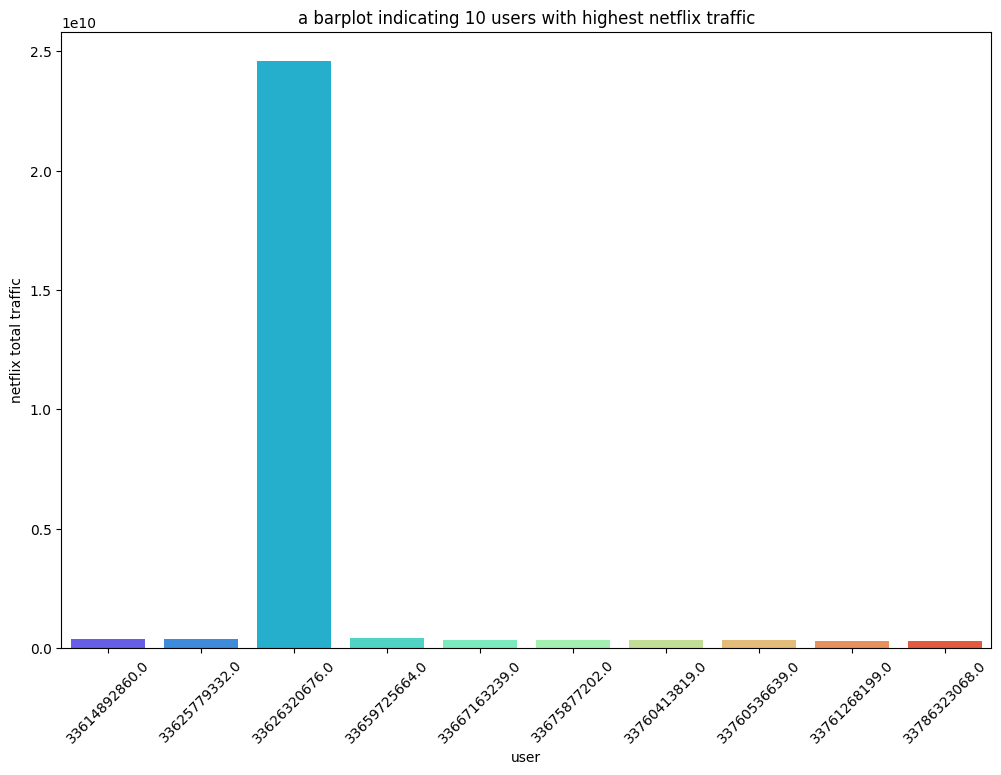

In [111]:
c = agg_apps_traffic.sort_values(by = 'netflix', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = c.index, y = c['netflix'],palette='rainbow')
plt.ylabel('netflix total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest netflix traffic')

#### 10 users with highest gaming traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest gaming traffic')

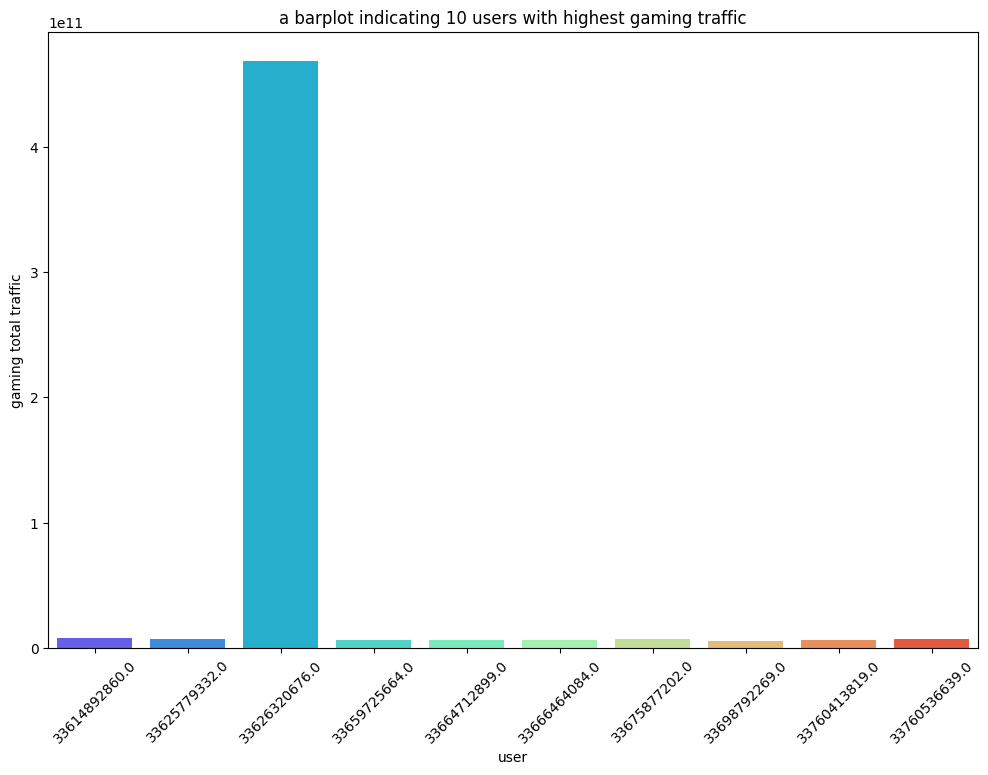

In [112]:
d = agg_apps_traffic.sort_values(by = 'gaming', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = d.index, y = d['gaming'],palette='rainbow')
plt.ylabel('gaming total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest gaming traffic')


#### 10 users with highest google traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest google traffic')

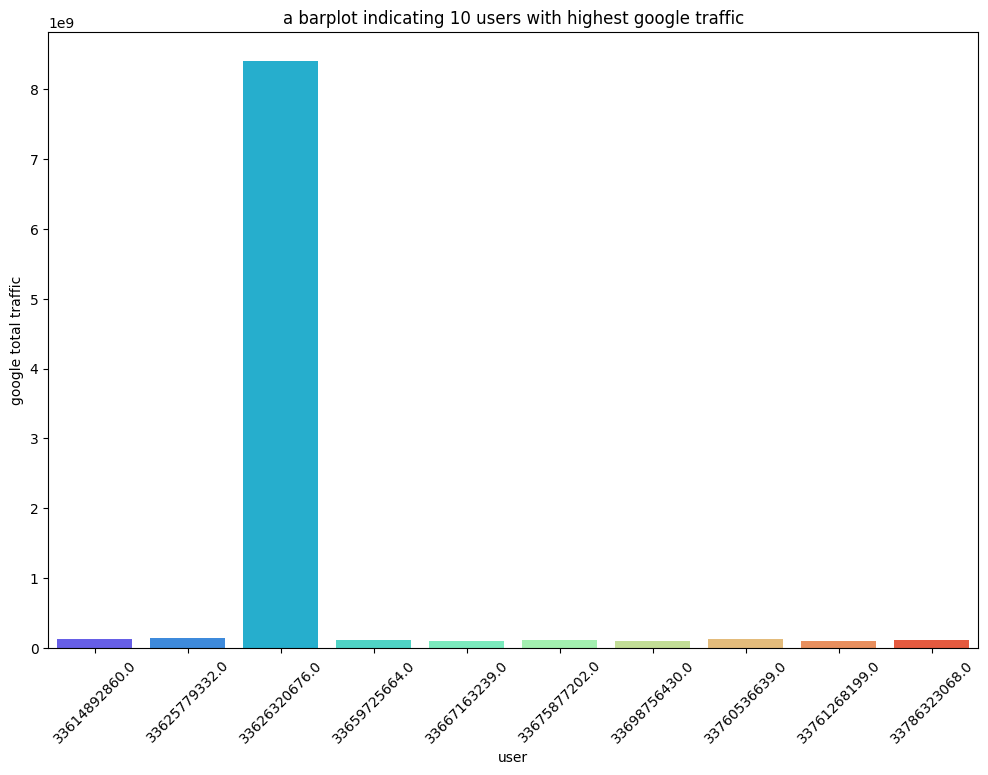

In [113]:
e = agg_apps_traffic.sort_values(by = 'google', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = e.index, y = e['google'],palette="rainbow")
plt.ylabel('google total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest google traffic')

#### 10 users with highest email traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest email traffic')

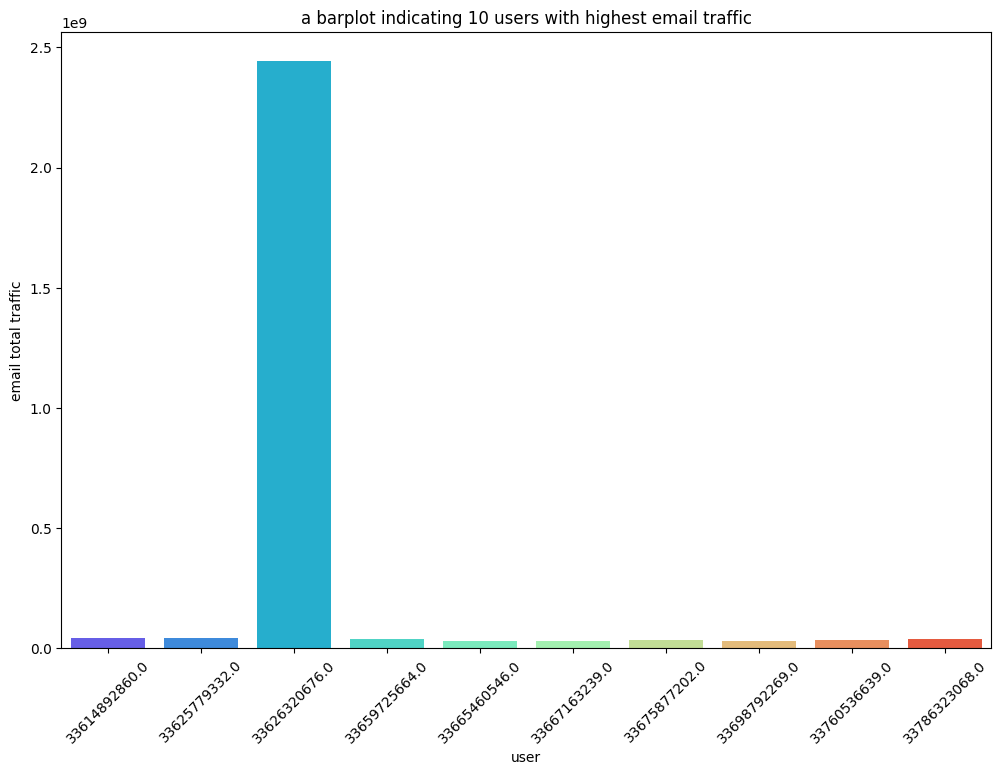

In [114]:
f = agg_apps_traffic.sort_values(by = 'email', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = f.index, y = f['email'],palette='rainbow')
plt.ylabel('email total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest email traffic')

#### 10 users with highest youtube traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest youtube traffic')

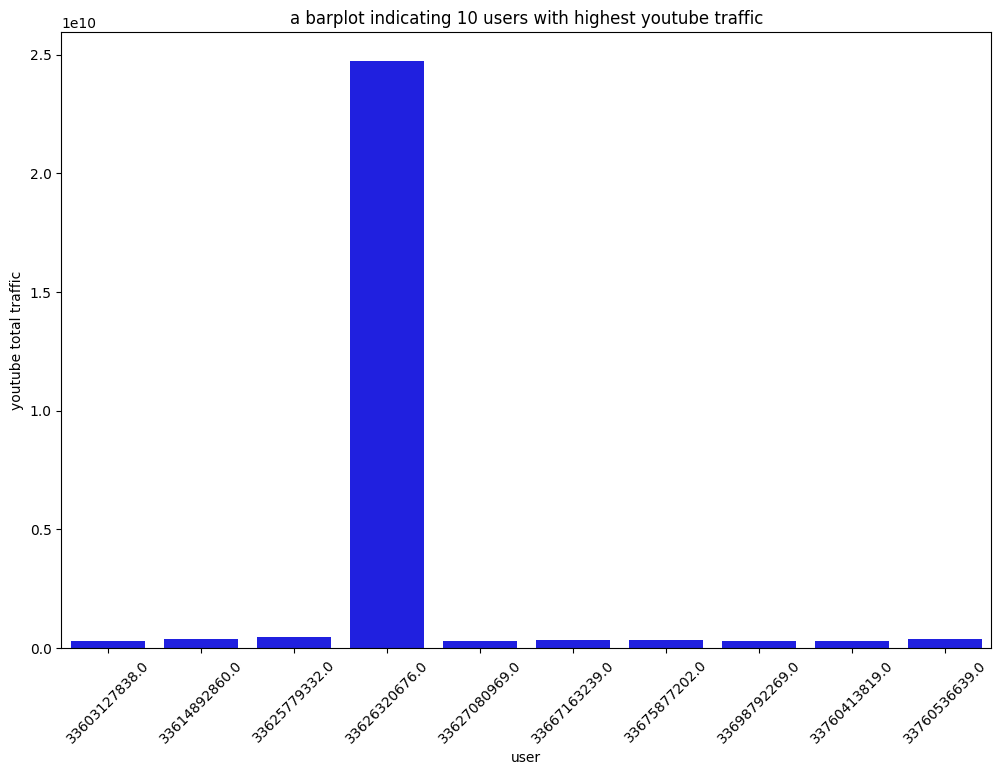

In [115]:
g = agg_apps_traffic.sort_values(by = 'youtube', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = g.index, y = g['youtube'],color='blue') # Assuming you want a blue color. If you have a specific color palette, define it beforehand.
plt.ylabel('youtube total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest youtube traffic')

plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest youtube traffic')

#### 10 users with highest other traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest other traffic')

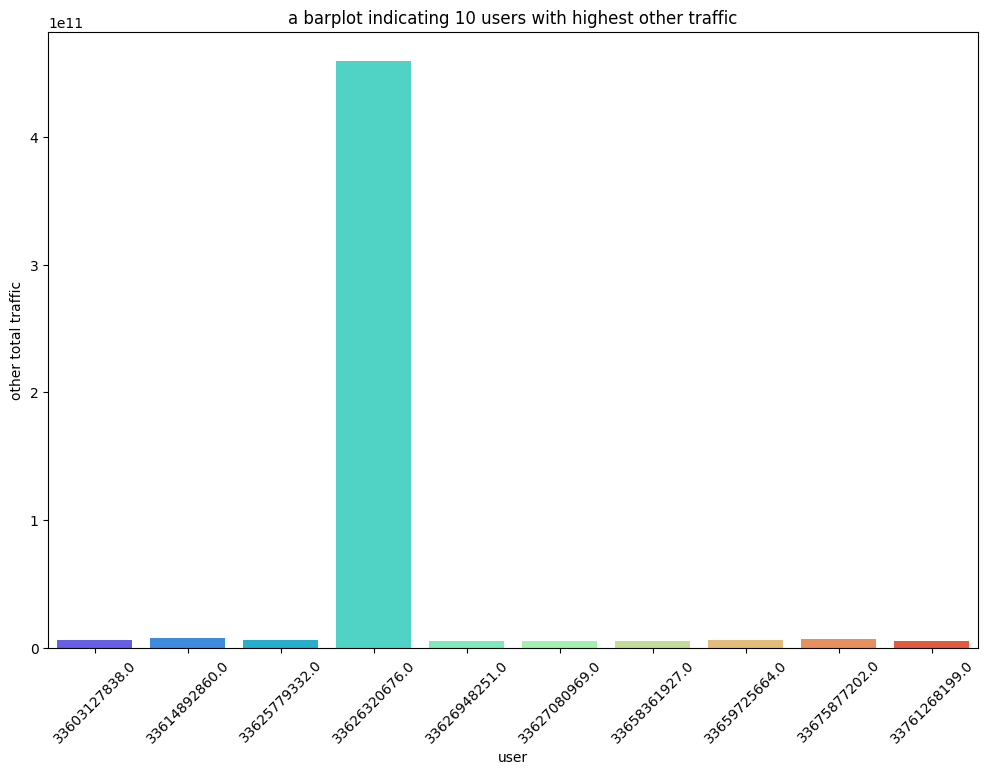

In [116]:
h = agg_apps_traffic.sort_values(by = 'other', ascending = False).head(10)
plt.figure(figsize = (12,8))
sns.barplot(x = h.index, y = h['other'],palette='rainbow')
plt.ylabel('other total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest other traffic')

In [117]:
# users in the 3 categories.
b = b.index.to_list()
c = c.index.to_list()
d = d.index.to_list()
e = e.index.to_list()
f = f.index.to_list()
g = g.index.to_list()
h = h.index.to_list()


def IntersecOfSets(arr1, arr2, arr3, arr4, arr5, arr6, arr7):
    s1 = set(arr1)
    s2 = set(arr2)
    s3 = set(arr3)
    s4 = set(arr4)
    s5 = set(arr5)
    s6 = set(arr6)
    s7 = set(arr7)

    set1 = s1.intersection(s2)
    set2 = set1.intersection(s3)
    set3 = set2.intersection(s4)
    set4 = set3.intersection(s5)
    set5 = set4.intersection(s6)
    set6 = set5.intersection(s7)

    final_list = list(set6)
    print(final_list)

IntersecOfSets(b, c, d, e, f, g, h)

[33625779332.0, 33614892860.0, 33626320676.0]


### * Plot the top 3 most used applications.
Most used applications can be determined by the Application with highest traffic data or the application with the most users.


In [118]:
agg_apps_traffic.loc['total_app_traffic'] = agg_apps_traffic.sum()
agg_apps_traffic.tail()

social_media       netflix       youtube        gaming  \
MSISDN/Number                                                               
33789997247.0      4.985690e+05  8.531060e+06  1.985157e+07  4.370033e+08   
3197020876596.0    7.152240e+05  2.659230e+07  1.195990e+07  1.780487e+08   
337000037000919.0  5.215660e+05  3.090504e+07  3.673494e+07  5.101427e+08   
882397108489451.0  1.546088e+06  2.884623e+07  4.094071e+07  4.307026e+07   
total_app_traffic  2.742394e+11  3.394314e+12  3.396545e+12  6.455040e+13   

                         google         email         other  
MSISDN/Number                                                
33789997247.0      5.429705e+06  2.514097e+06  2.111151e+08  
3197020876596.0    1.043866e+07  1.520771e+06  4.705265e+08  
337000037000919.0  9.830617e+06  3.318582e+06  1.491884e+08  
882397108489451.0  9.218647e+06  3.330974e+06  4.013605e+08  
total_app_traffic  1.171102e+12  3.388676e+11  6.440523e+13

Text(0.5, 0, 'application')

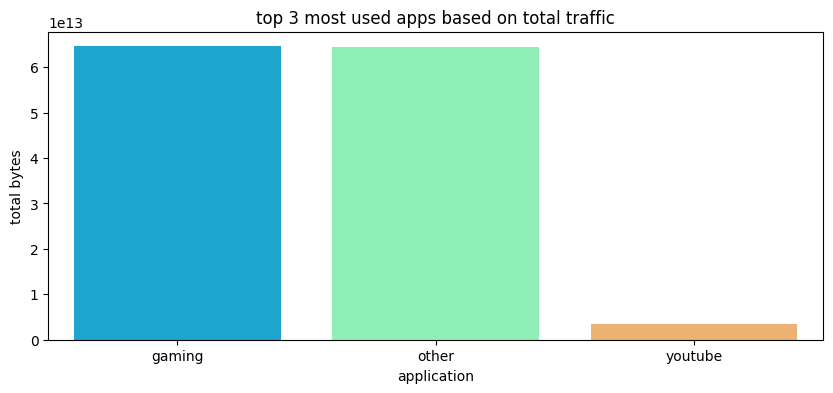

In [119]:
a = agg_apps_traffic.tail(1)
long_df = pd.melt(a)
long_df = long_df.sort_values(by = 'value', ascending = False).head(3)
plt.figure(figsize=(10,4))
sns.barplot(x = long_df.variable, y = long_df.value,palette='rainbow')
plt.title('top 3 most used apps based on total traffic')
plt.ylabel('total bytes')
plt.xlabel('application')

Most commonly used Apps are Gaming app, Other Apps,and Youtube only.

### * Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:


In [120]:
# the user engagement metrics df (already normalized due to different units of measurement)
#norm_agg_user_data = norm_agg_user_data.drop(['clusters'], axis = 1)
norm_agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.360100e+10        0.693147              18.575290                20.593943   
3.360100e+10        0.693147              19.015283                18.870862   
3.360100e+10        0.693147              18.720558                20.205695   
3.360101e+10        0.693147              17.725091                19.861276   
3.360101e+10        1.098612              17.429248                21.099927   

               clusters  
MSISDN/Number            
3.360100e+10          2  
3.360100e+10          2  
3.360100e+10          2  
3.360101e+10          1  
3.360101e+10          1

#Elbow method is a graphical technique in python that helps determine the optimal number of clusters in a k-means clustering algorithm

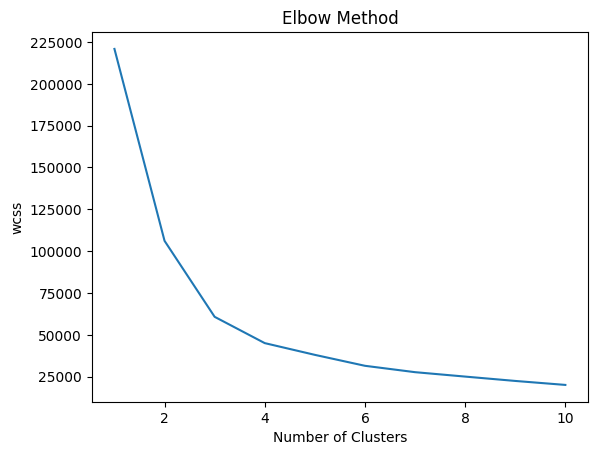

In [121]:
# determining number of clusters using elbow plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(norm_agg_user_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

Explanation of the Elbow Plot-

The Elbow Method helps identify the optimal number of clusters by looking for the "elbow" point in the WCSS curve, where the rate of decrease slows down. This is often the point where adding more clusters doesn’t result in a significant decrease in WCSS, indicating diminishing returns.

Interpreting the Elbow Plot
In this plot-

The WCSS decreases significantly as the number of clusters increases from 1 to 3.
After 3 clusters, the decrease in WCSS slows down, and the line becomes more gradual.
The "elbow" appears to be around 3 clusters in this plot. This suggests that 3 clusters may be the optimal choice for this data, as adding more clusters beyond this point provides less improvement in the clustering quality.

# k=4

In [122]:
means = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
kmeans.fit(norm_agg_user_data)
y_means = kmeans.predict(norm_agg_user_data)
agg_user_data['clusters'] = y_means
agg_user_data = agg_user_data.drop(['clusters'], axis = 1)
agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)
MSISDN/Number                                                               
3.360100e+10               1            116720140.0             8.786906e+08
3.360100e+10               1            181230963.0             1.568596e+08
3.360100e+10               1            134969374.0             5.959665e+08
3.360101e+10               1             49878024.0             4.223207e+08
3.360101e+10               2             37104453.0             1.457411e+09

In [123]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
kmeans.fit(norm_agg_user_data)
y_means = kmeans.predict(norm_agg_user_data)
agg_user_data['clusters'] = pd.Series(kmeans_data, index=agg_user_data.index)
# agg_user_data = agg_user_data.drop(['clusetrs'], axis = 1)
agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.360100e+10               1            116720140.0             8.786906e+08   
3.360100e+10               1            181230963.0             1.568596e+08   
3.360100e+10               1            134969374.0             5.959665e+08   
3.360101e+10               1             49878024.0             4.223207e+08   
3.360101e+10               2             37104453.0             1.457411e+09   

               clusters  
MSISDN/Number            
3.360100e+10          2  
3.360100e+10          2  
3.360100e+10          2  
3.360101e+10          1  
3.360101e+10          1

In [124]:
#clusters df
cluster_1 = agg_user_data[agg_user_data.clusters == 0]
cluster_2 = agg_user_data[agg_user_data.clusters == 1]
cluster_3 = agg_user_data[agg_user_data.clusters == 2]
cluster_4 = agg_user_data[agg_user_data.clusters == 3]

In [125]:
# descriptions
cluster_1.describe()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
count   29428.000000           2.942800e+04             2.942800e+04   29428.0
mean        2.258529           2.890491e+08             1.224681e+09       0.0
std         6.401256           5.573303e+08             3.191384e+09       0.0
min         1.000000           5.447539e+07             1.770069e+08       0.0
25%         2.000000           1.727941e+08             8.220985e+08       0.0
50%         2.000000           2.260368e+08             1.061215e+09       0.0
75%         3.000000           3.319909e+08             1.445814e+09       0.0
max      1084.000000           8.134348e+10             5.397159e+11       0.0

In [126]:
cluster_2.describe()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
count   22561.000000           2.256100e+04             2.256100e+04   22561.0
mean        1.110678           3.169313e+07             5.662824e+08       1.0
std         0.315992           1.339105e+07             2.960924e+08       0.0
min         1.000000           7.142988e+06             3.802236e+07       1.0
25%         1.000000           2.087611e+07             3.318731e+08       1.0
50%         1.000000           3.038428e+07             5.600353e+08       1.0
75%         1.000000           4.157269e+07             7.682742e+08       1.0
max         4.000000           6.465030e+07             1.895711e+09       1.0

In [127]:
cluster_3.describe()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
count   54867.000000           5.486700e+04             5.486700e+04   54867.0
mean        1.065832           1.179271e+08             4.656603e+08       2.0
std         0.249310           5.132611e+07             2.358966e+08       0.0
min         1.000000           4.285693e+07             3.324901e+07       2.0
25%         1.000000           8.639992e+07             2.666738e+08       2.0
50%         1.000000           9.835240e+07             4.548562e+08       2.0
75%         1.000000           1.414955e+08             6.526841e+08       2.0
max         3.000000           1.035262e+09             1.214536e+09       2.0

In [128]:
cluster_4.describe()


sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  clusters
count            0.0                    0.0                      0.0       0.0
mean             NaN                    NaN                      NaN       NaN
std              NaN                    NaN                      NaN       NaN
min              NaN                    NaN                      NaN       NaN
25%              NaN                    NaN                      NaN       NaN
50%              NaN                    NaN                      NaN       NaN
75%              NaN                    NaN                      NaN       NaN
max              NaN                    NaN                      NaN       NaN

The output  indicates that cluster_4 contains no data. This is evident from the following observations:

Count is 0 for each column (sessions_freq, sessions_duration(ms), sessions_traffic(bytes), and clusters), which means there are no rows in cluster_4.
Mean, standard deviation (std), min, max, and percentile values are all NaN, which further confirms the absence of data.

## 3. Experience Analytics

Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable) -(jupyter notebook):
Average TCP retransmission
Average RTT
Handset type
Average throughput


In [129]:
# data[numerical].columns

In [130]:
net_data = data[['MSISDN/Number', 'Handset Type', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]

net_data.head()

MSISDN/Number                 Handset Type  Avg RTT DL (ms)  \
0   3.366496e+10   Samsung Galaxy A5 Sm-A520F        42.000000   
1   3.368185e+10  Samsung Galaxy J5 (Sm-J530)        65.000000   
2   3.376063e+10     Samsung Galaxy A8 (2018)       109.795706   
3   3.375034e+10                    undefined       109.795706   
4   3.369980e+10             Samsung Sm-G390F       109.795706   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0         5.000000                     23.0                     44.0   
1         5.000000                     16.0                     26.0   
2        17.662883                      6.0                      9.0   
3        17.662883                     44.0                     44.0   
4        17.662883                      6.0                      9.0   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  
0                 2.080991e+07                759658.664811  
1                 2.080991e+07                759658.664811  
2                 2.080991e+07                759658.664811  
3                 2.080991e+07                759658.664811  
4                 2.080991e+07                759658.664811

In [131]:
# null values are already treated, let's check the outliers using IQR score

#check if the exist
# RTT DL
Q1 = np.percentile(net_data['Avg RTT DL (ms)'], 25, interpolation = 'midpoint')
Q2 = np.percentile(net_data['Avg RTT DL (ms)'], 50, interpolation = 'midpoint')
Q3 = np.percentile(net_data['Avg RTT DL (ms)'], 75, interpolation = 'midpoint')
IQR = stats.iqr(net_data['Avg RTT DL (ms)'], interpolation = 'midpoint')
o = (net_data['Avg RTT DL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT DL (ms)'] > (Q3 + 1.5 * IQR))
m = o.unique()

#RTT UL
Q1 = np.percentile(net_data['Avg RTT UL (ms)'], 25, interpolation = 'midpoint')
Q2 = np.percentile(net_data['Avg RTT UL (ms)'], 50, interpolation = 'midpoint')
Q3 = np.percentile(net_data['Avg RTT UL (ms)'], 75, interpolation = 'midpoint')
IQR = stats.iqr(net_data['Avg RTT UL (ms)'], interpolation = 'midpoint')
o = (net_data['Avg RTT UL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT UL (ms)'] > (Q3 + 1.5 * IQR))
n = o.unique()

#TP DL
Q1 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 25, interpolation = 'midpoint')
Q2 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 50, interpolation = 'midpoint')
Q3 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 75, interpolation = 'midpoint')
IQR = stats.iqr(net_data['Avg Bearer TP DL (kbps)'], interpolation = 'midpoint')
o = (net_data['Avg Bearer TP DL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP DL (kbps)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TP UL
Q1 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 25, interpolation = 'midpoint')
Q2 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 50, interpolation = 'midpoint')
Q3 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 75, interpolation = 'midpoint')
IQR = stats.iqr(net_data['Avg Bearer TP UL (kbps)'], interpolation = 'midpoint')
o = (net_data['Avg Bearer TP UL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP UL (kbps)'] > (Q3 + 1.5 * IQR))
p = o.unique()

#TCP UL
Q1 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')
Q2 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')
Q3 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')
IQR = stats.iqr(net_data['TCP UL Retrans. Vol (Bytes)'], interpolation = 'midpoint')
o = (net_data['TCP UL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP UL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TCP DL
Q1 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')
Q2 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')
Q3 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')
IQR = stats.iqr(net_data['TCP DL Retrans. Vol (Bytes)'], interpolation = 'midpoint')
o = (net_data['TCP DL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP DL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
r = o.unique()

print('rtt dl', m)
print('rtt ul', n)
print('tp ul', p)
print('tp dl', q)
print('tcp dl', r)
print('tcp ul', q)

rtt dl [False  True]
rtt ul [False  True]
tp ul [False  True]
tp dl [False  True]
tcp dl [False  True]
tcp ul [False  True]


In [132]:
# o.shape
# net_data.shape





They all have outliers, now we have to treat them by replacing them with the low and high percentiles.


In [133]:
net_data['Avg RTT DL (ms)'] = net_data['Avg RTT DL (ms)'].clip(lower=net_data['Avg RTT DL (ms)'].quantile(0.07), upper=net_data['Avg RTT DL (ms)'].quantile(0.93))
net_data['Avg RTT UL (ms)'] = net_data['Avg RTT UL (ms)'].clip(lower=net_data['Avg RTT UL (ms)'].quantile(0.10), upper=net_data['Avg RTT UL (ms)'].quantile(0.90))
net_data['Avg Bearer TP DL (kbps)'] = net_data['Avg Bearer TP DL (kbps)'].clip(lower=net_data['Avg Bearer TP DL (kbps)'].quantile(0.05), upper=net_data['Avg Bearer TP DL (kbps)'].quantile(0.95))
net_data['Avg Bearer TP UL (kbps)'] = net_data['Avg Bearer TP UL (kbps)'].clip(lower=net_data['Avg Bearer TP UL (kbps)'].quantile(0.20), upper=net_data['Avg Bearer TP UL (kbps)'].quantile(0.80))
net_data['TCP UL Retrans. Vol (Bytes)'] = net_data['TCP UL Retrans. Vol (Bytes)'].clip(lower=net_data['TCP UL Retrans. Vol (Bytes)'].quantile(0.05), upper=net_data['TCP UL Retrans. Vol (Bytes)'].quantile(0.95))
net_data['TCP DL Retrans. Vol (Bytes)'] = net_data['TCP DL Retrans. Vol (Bytes)'].clip(lower=net_data['TCP DL Retrans. Vol (Bytes)'].quantile(0.05), upper=net_data['TCP DL Retrans. Vol (Bytes)'].quantile(0.95))

In [134]:
# Confirming they've been treated
# RTT DL
Q1 = np.percentile(net_data['Avg RTT DL (ms)'], 25, interpolation = 'midpoint')
Q2 = np.percentile(net_data['Avg RTT DL (ms)'], 50, interpolation = 'midpoint')
Q3 = np.percentile(net_data['Avg RTT DL (ms)'], 75, interpolation = 'midpoint')
IQR = stats.iqr(net_data['Avg RTT DL (ms)'], interpolation = 'midpoint')
o = (net_data['Avg RTT DL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT DL (ms)'] > (Q3 + 1.5 * IQR))
m = o.unique()

#RTT UL
Q1 = np.percentile(net_data['Avg RTT UL (ms)'], 25, interpolation = 'midpoint')
Q2 = np.percentile(net_data['Avg RTT UL (ms)'], 50, interpolation = 'midpoint')
Q3 = np.percentile(net_data['Avg RTT UL (ms)'], 75, interpolation = 'midpoint')
IQR = stats.iqr(net_data['Avg RTT UL (ms)'], interpolation = 'midpoint')
o = (net_data['Avg RTT UL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT UL (ms)'] > (Q3 + 1.5 * IQR))
n = o.unique()

#TP DL
Q1 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 25, interpolation = 'midpoint')
Q2 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 50, interpolation = 'midpoint')
Q3 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 75, interpolation = 'midpoint')
IQR = stats.iqr(net_data['Avg Bearer TP DL (kbps)'], interpolation = 'midpoint')
o = (net_data['Avg Bearer TP DL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP DL (kbps)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TP UL
Q1 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 25, interpolation = 'midpoint')
Q2 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 50, interpolation = 'midpoint')
Q3 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 75, interpolation = 'midpoint')
IQR = stats.iqr(net_data['Avg Bearer TP UL (kbps)'], interpolation = 'midpoint')
o = (net_data['Avg Bearer TP UL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP UL (kbps)'] > (Q3 + 1.5 * IQR))
p = np.unique(o, return_counts = True)

#TCP UL
Q1 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')
Q2 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')
Q3 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')
IQR = stats.iqr(net_data['TCP UL Retrans. Vol (Bytes)'], interpolation = 'midpoint')
o = (net_data['TCP UL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP UL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TCP DL
Q1 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')
Q2 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')
Q3 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')
IQR = stats.iqr(net_data['TCP DL Retrans. Vol (Bytes)'], interpolation = 'midpoint')
o = (net_data['TCP DL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP DL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
r = o.unique()

print('rtt dl', m)
print('rtt ul', n)
print('tp ul', p)
print('tp dl', q)
print('tcp dl', r)
print('tcp ul', q)

rtt dl [False]
rtt ul [False]
tp ul (array([False]), array([150001]))
tp dl [False]
tcp dl [False]
tcp ul [False]


All are handled

In [135]:
# # replacing with mean
# mean = float(net_data['Avg Bearer TP UL (kbps)'].mean())
# lower=net_data['Avg Bearer TP UL (kbps)'].quantile(0.10)
# upper=net_data['Avg Bearer TP UL (kbps)'].quantile(0.90)
# net_data['Avg Bearer TP UL (kbps)'] = np.where((net_data['Avg Bearer TP UL (kbps)']  > upper), mean, net_data['Avg Bearer TP UL (kbps)'])
# net_data['Avg Bearer TP UL (kbps)'] = np.where((net_data['Avg Bearer TP UL (kbps)']  < lower), mean, net_data['Avg Bearer TP UL (kbps)'])

In [136]:
# generate total columns for rtt, tp and tcp
net_data['total_tp(kbps)'] = data['Avg Bearer TP DL (kbps)'] + data['Avg Bearer TP UL (kbps)']
net_data['total_rtt(ms)'] = data['Avg RTT DL (ms)'] + data['Avg RTT UL (ms)']
net_data['total_tcp(bytes)'] = data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']
net_data.head()

MSISDN/Number                 Handset Type  Avg RTT DL (ms)  \
0   3.366496e+10   Samsung Galaxy A5 Sm-A520F        42.000000   
1   3.368185e+10  Samsung Galaxy J5 (Sm-J530)        65.000000   
2   3.376063e+10     Samsung Galaxy A8 (2018)       109.795706   
3   3.375034e+10                    undefined       109.795706   
4   3.369980e+10             Samsung Sm-G390F       109.795706   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0         5.000000                     23.0                     45.0   
1         5.000000                     16.0                     45.0   
2        17.662883                     11.0                     45.0   
3        17.662883                     44.0                     45.0   
4        17.662883                     11.0                     45.0   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  total_tp(kbps)  \
0                 2.080991e+07                759658.664811            67.0   
1                 2.080991e+07                759658.664811            42.0   
2                 2.080991e+07                759658.664811            15.0   
3                 2.080991e+07                759658.664811            88.0   
4                 2.080991e+07                759658.664811            15.0   

   total_rtt(ms)  total_tcp(bytes)  
0      47.000000      2.156957e+07  
1      70.000000      2.156957e+07  
2     127.458589      2.156957e+07  
3     127.458589      2.156957e+07  
4     127.458589      2.156957e+07

In [137]:
# aggregating

# handset type
a = net_data[['MSISDN/Number', 'Handset Type']]
b = a.groupby('MSISDN/Number').count()
print(b.shape)
b = b.reset_index()
b.head()

(106856, 1)


MSISDN/Number  Handset Type
0   3.360100e+10             1
1   3.360100e+10             1
2   3.360100e+10             1
3   3.360101e+10             1
4   3.360101e+10             2

In [138]:
# the others
c = net_data.drop(['Handset Type'], axis = 1)
d = c.groupby('MSISDN/Number').sum()
d = d.reset_index()
print(d.shape)
d.head()

(106856, 10)


MSISDN/Number  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0   3.360100e+10        46.000000         1.000000                     37.0   
1   3.360100e+10        30.000000         1.000000                     48.0   
2   3.360100e+10       109.795706        17.662883                     48.0   
3   3.360101e+10        69.000000        15.000000                    204.0   
4   3.360101e+10       114.000000         6.000000                  40395.0   

   Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0                     45.0                 2.080991e+07   
1                     51.0                 2.080991e+07   
2                     49.0                 2.080991e+07   
3                     45.0                 4.316000e+03   
4                   1673.0                 3.015954e+07   

   TCP UL Retrans. Vol (Bytes)  total_tp(kbps)  total_rtt(ms)  \
0                759658.664811            76.0      46.000000   
1                759658.664811            99.0      31.000000   
2                759658.664811            97.0     127.458589   
3                759658.664811           248.0      84.000000   
4                780860.664811         56844.0     119.000000   

   total_tcp(bytes)  
0      2.156957e+07  
1      2.156957e+07  
2      2.156957e+07  
3      7.607247e+05  
4      3.094040e+07

In [139]:
# Merging them
agg_net_data = pd.merge(left=b, right=d, how='left', left_on='MSISDN/Number', right_on='MSISDN/Number')
print(agg_net_data.shape)
agg_net_data.head()

(106856, 11)


MSISDN/Number  Handset Type  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0   3.360100e+10             1        46.000000         1.000000   
1   3.360100e+10             1        30.000000         1.000000   
2   3.360100e+10             1       109.795706        17.662883   
3   3.360101e+10             1        69.000000        15.000000   
4   3.360101e+10             2       114.000000         6.000000   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                     37.0                     45.0   
1                     48.0                     51.0   
2                     48.0                     49.0   
3                    204.0                     45.0   
4                  40395.0                   1673.0   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  total_tp(kbps)  \
0                 2.080991e+07                759658.664811            76.0   
1                 2.080991e+07                759658.664811            99.0   
2                 2.080991e+07                759658.664811            97.0   
3                 4.316000e+03                759658.664811           248.0   
4                 3.015954e+07                780860.664811         56844.0   

   total_rtt(ms)  total_tcp(bytes)  
0      46.000000      2.156957e+07  
1      31.000000      2.156957e+07  
2     127.458589      2.156957e+07  
3      84.000000      7.607247e+05  
4     119.000000      3.094040e+07

### Compute & list 10 of the top, bottom and most frequent:
* TCP values in the dataset.
* RTT values in the dataset.
* Throughput values in the dataset.


In [140]:
#  tcp
tcp = data.sort_values(by = 'total_tcp', ascending = False)
top_tcp = tcp.total_tcp.head(10)
bottom_tcp = tcp.total_tcp.tail(10)
fre_tcp = data.total_tcp.value_counts(ascending = False).head(10)
print('top tcp\n', top_tcp.to_list())
print('bottom tcp\n', bottom_tcp.to_list())
print('freq tcp\n', fre_tcp.index.to_list())

top tcp
 [4344115651.0, 4301477439.0, 4294431965.0, 4291464950.0, 4288120860.0, 4275491713.0, 4268647350.0, 4261616039.0, 4260174145.0, 4254659643.0]
bottom tcp
 [143.0, 134.0, 134.0, 129.0, 128.0, 113.0, 108.0, 106.0, 97.0, 86.0]
freq tcp
 [21569572.935152996, 20811208.27034193, 760988.6648110661, 20811244.27034193, 759696.6648110661, 759750.6648110661, 20811232.27034193, 762318.6648110661, 760976.6648110661, 20812574.27034193]


In [141]:
# rtt
rtt = data.sort_values(by = 'total_rtt', ascending = False)
top_rtt= rtt.total_rtt.head(10)
bottom_rtt = rtt.total_rtt.tail(10)
fre_rtt = data.total_rtt.value_counts(ascending = False).head(10)
print('top rtt\n', top_rtt.to_list())
print('bottom rtt\n', bottom_rtt.to_list())
print('freq rtt\n', fre_rtt.index.to_list())

top rtt
 [96924.0, 64641.0, 55812.0, 54848.0, 27278.0, 26300.0, 25922.0, 25715.0, 25388.0, 24738.0]
bottom rtt
 [6.0, 6.0, 5.0, 4.0, 4.0, 2.0, 0.0, 0.0, 0.0, 0.0]
freq rtt
 [127.45858896466059, 29.0, 39.0, 38.0, 40.0, 30.0, 28.0, 49.0, 41.0, 31.0]


In [142]:
tp = data.sort_values(by = 'total_tp', ascending = False)
top_tp = tp.total_tp.head(10)
bottom_tp = tp.total_tp.tail(10)
fre_tp = data.total_tp.value_counts(ascending = False).head(10)
print('top tp\n', top_tp.to_list())
print('bottom tp\n', bottom_tp.to_list())
print('freq tp\n', fre_tp.index.to_list())

top tp
 [382262.0, 313244.0, 304299.0, 300546.0, 283931.0, 281144.0, 277152.0, 276205.0, 274052.0, 269888.0]
bottom tp
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
freq tp
 [63.0, 15.0, 97.0, 90.0, 98.0, 96.0, 99.0, 89.0, 91.0, 93.0]


In [143]:
# user-based plots on the same

# tcp
a = agg_net_data.sort_values(by = 'total_tcp(bytes)', ascending = False).head(10)
b = agg_net_data.sort_values(by = 'total_tcp(bytes)', ascending = False).tail(10)
c = pd.DataFrame(agg_net_data['total_tcp(bytes)'].value_counts(ascending = False).head(10))

[Text(0.5, 1.0, 'Top 10 TCP values'), Text(0.5, 0, 'users')]

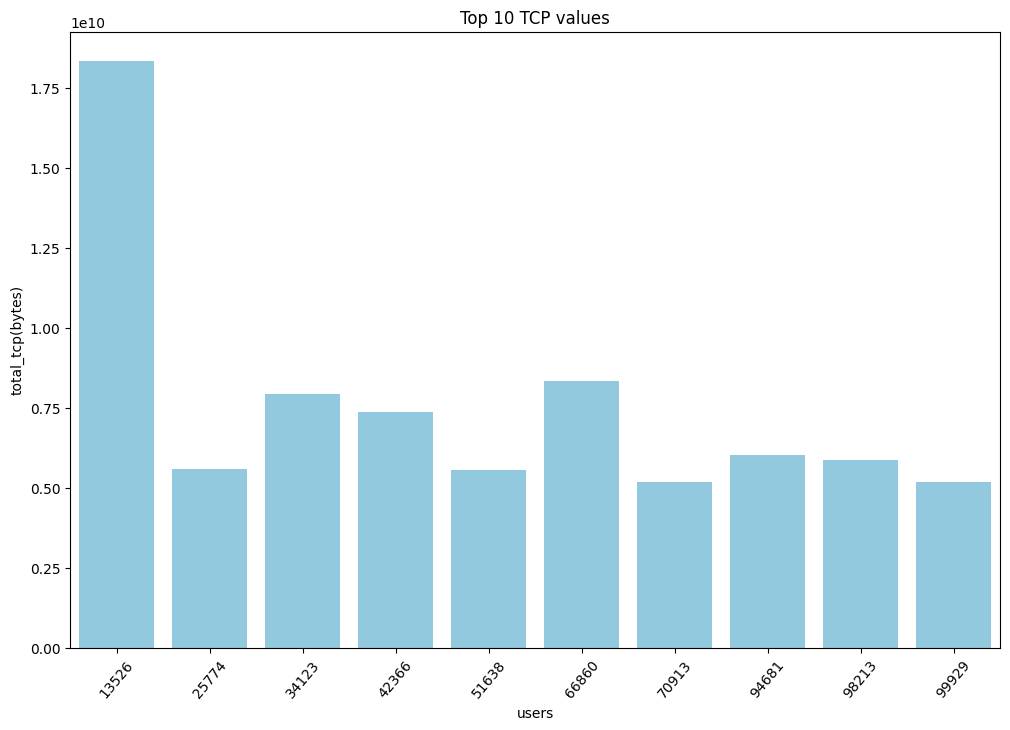

In [144]:
# top 10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = a.index ,y = a['total_tcp(bytes)'], color="skyblue").set(title = 'Top 10 TCP values', xlabel = 'users')

[Text(0.5, 1.0, 'Bottom 10 TCP values'), Text(0.5, 0, 'users')]

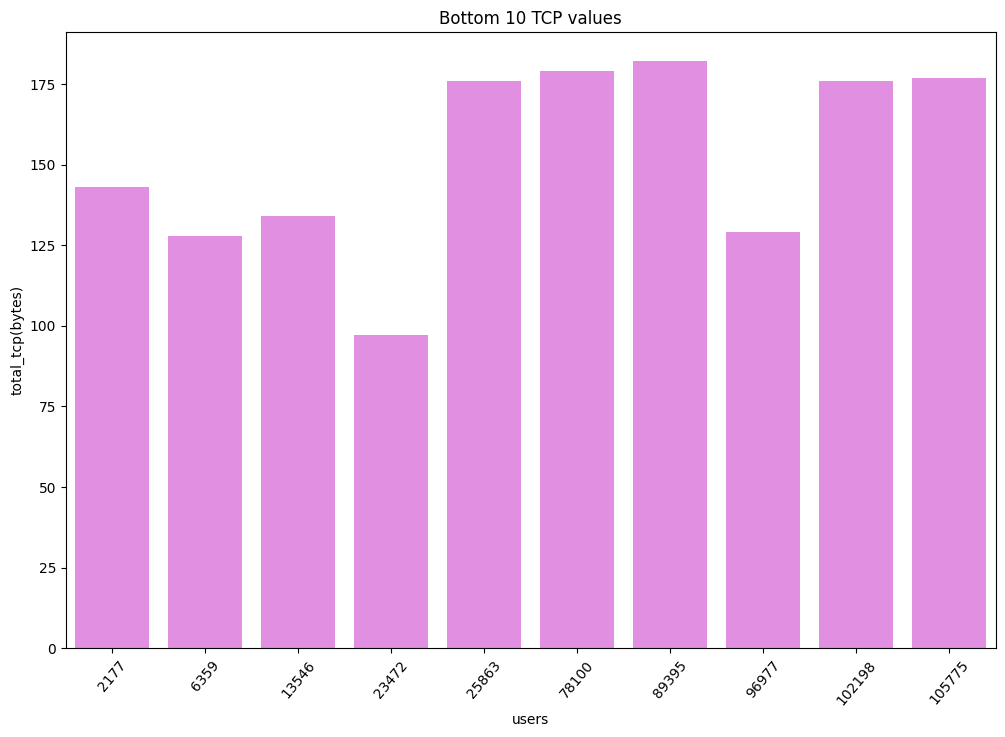

In [145]:
# bottom 10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = b.index ,y = b['total_tcp(bytes)'], color="violet").set(title = 'Bottom 10 TCP values', xlabel = 'users')

[Text(0.5, 1.0, 'Frequent 10 TCP values'), Text(0.5, 0, 'users')]

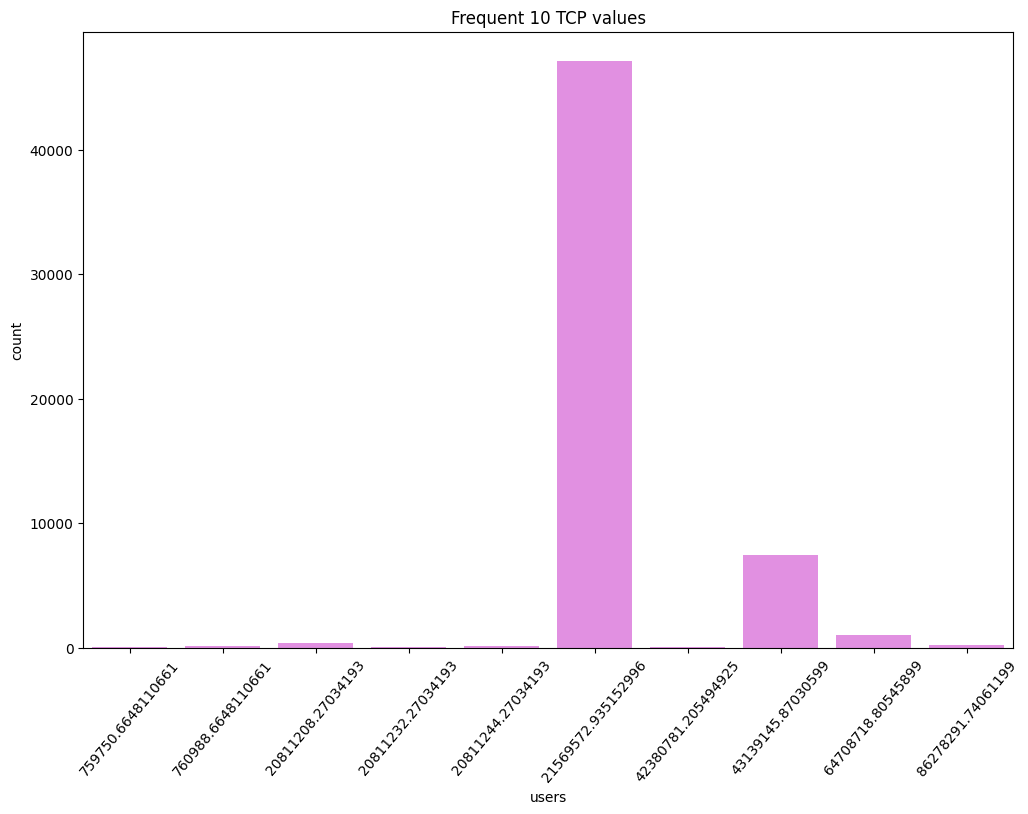

In [146]:
# Frequent 10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = c.index ,y = c['count'], color="violet").set(title = 'Frequent 10 TCP values', xlabel = 'users')

In [147]:
# rtt
a = agg_net_data.sort_values(by = 'total_rtt(ms)', ascending = False).head(10)
b = agg_net_data.sort_values(by = 'total_rtt(ms)', ascending = False).tail(10)
c = pd.DataFrame(agg_net_data['total_rtt(ms)'].value_counts(ascending = False).head(10))

[Text(0.5, 1.0, 'Top 10 rtt values'), Text(0.5, 0, 'users')]

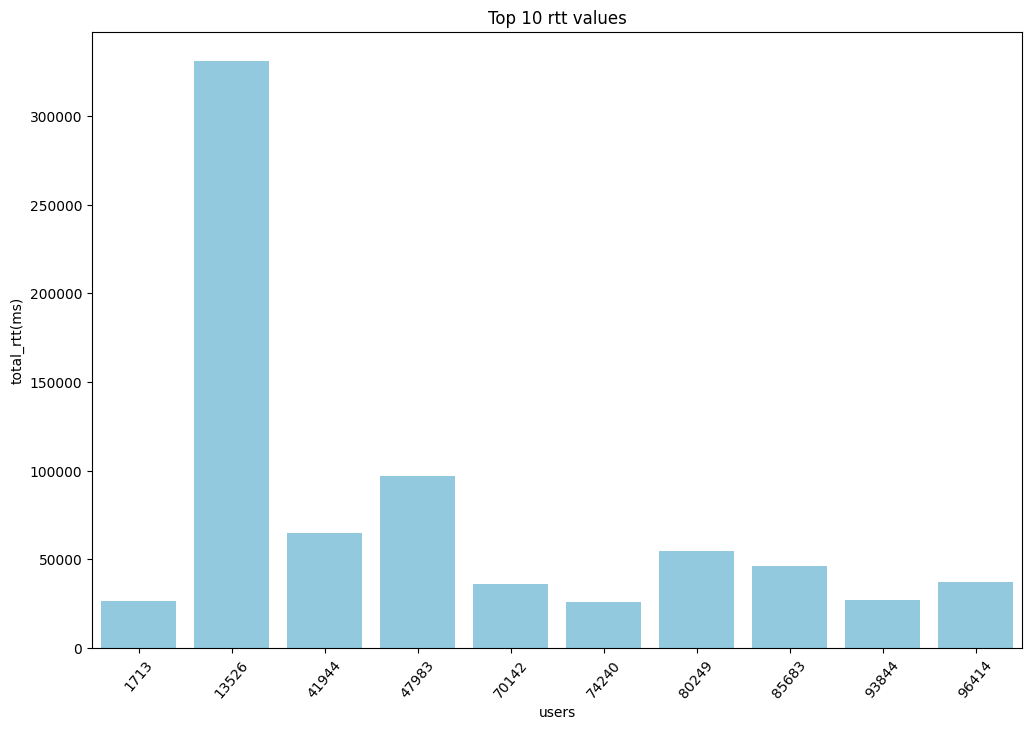

In [148]:
# top 10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = a.index ,y = a['total_rtt(ms)'], color="skyblue").set(title = 'Top 10 rtt values', xlabel = 'users')

[Text(0.5, 1.0, 'Bottom 10 rtt values'), Text(0.5, 0, 'users')]

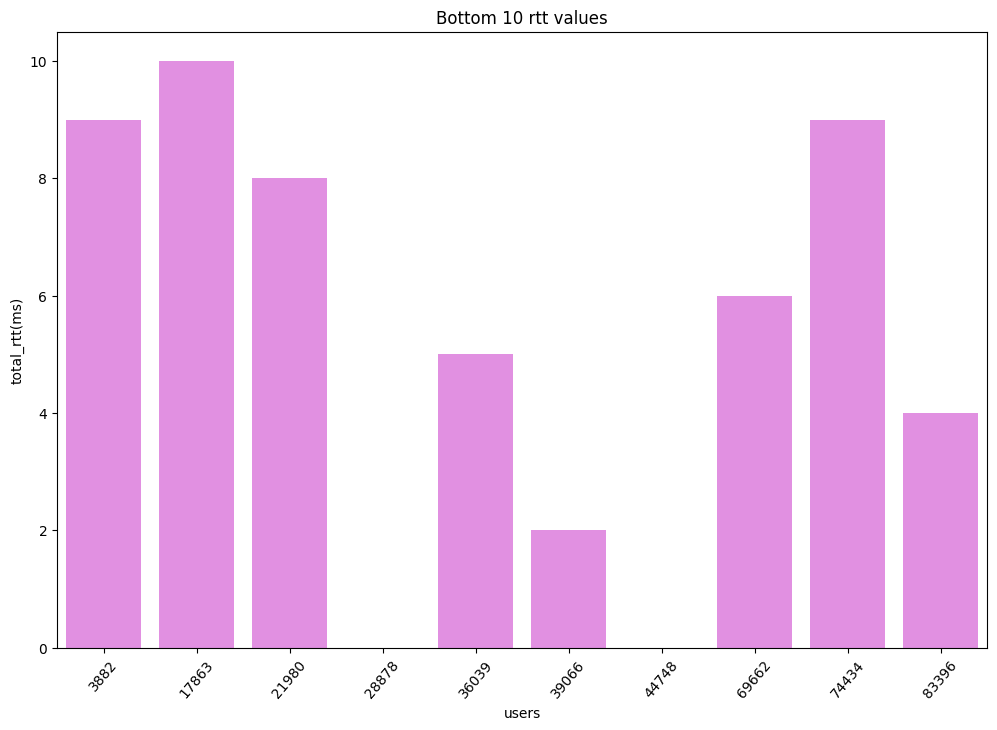

In [149]:
# bottom_10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
# sns.barplot(x = b.index ,y = b['total_rtt(ms)'], color="violet").set(title = 'Bottom 10 rtt values', xlabel = 'users')

sns.barplot(x = b.index ,y = b['total_rtt(ms)'], color="violet").set(title = 'Bottom 10 rtt values', xlabel = 'users')

[Text(0.5, 1.0, 'Frequent 10 rtt values'), Text(0.5, 0, 'users')]

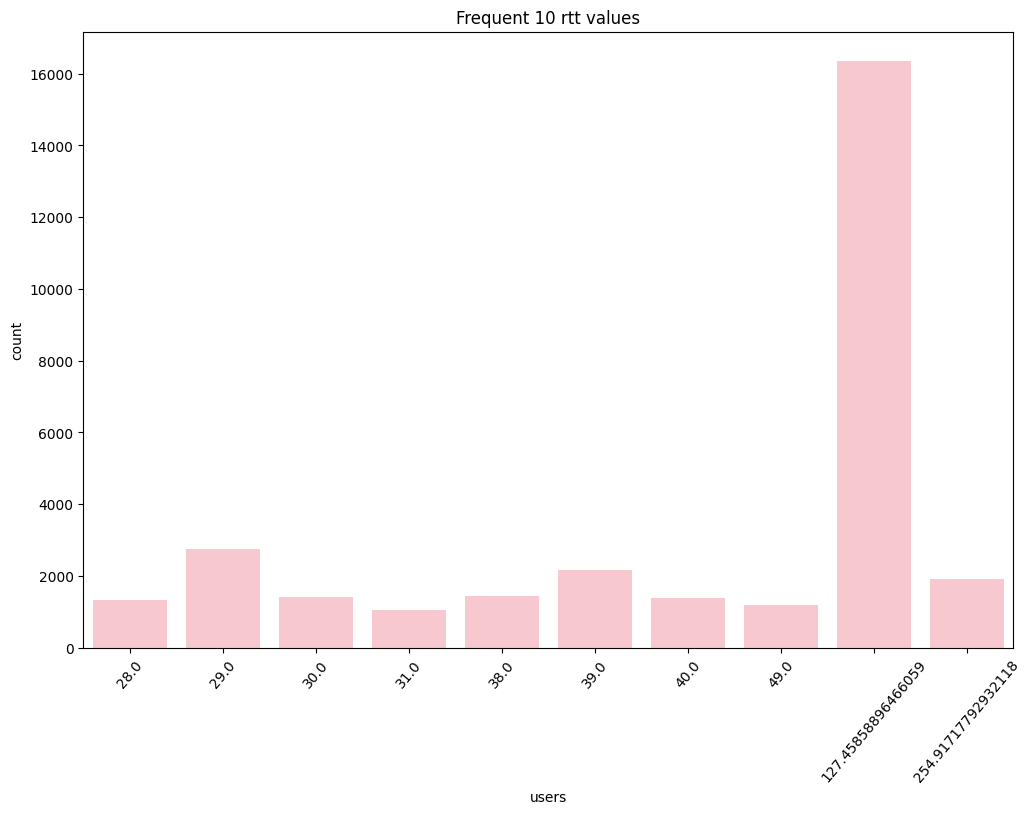

In [150]:
# Frequent 10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
# Changed the column name from 'count)' to 'count'
sns.barplot(x = c.index ,y = c['count'], color="pink").set(title = 'Frequent 10 rtt values', xlabel = 'users')


In [151]:
# tp
a = agg_net_data.sort_values(by = 'total_tp(kbps)', ascending = False).head(10)
b = agg_net_data.sort_values(by = 'total_tp(kbps)', ascending = False).tail(10)
c = pd.DataFrame(agg_net_data['total_tp(kbps)'].value_counts(ascending = False).head(10))

[Text(0.5, 1.0, 'Top 10 tp values'), Text(0.5, 0, 'users')]

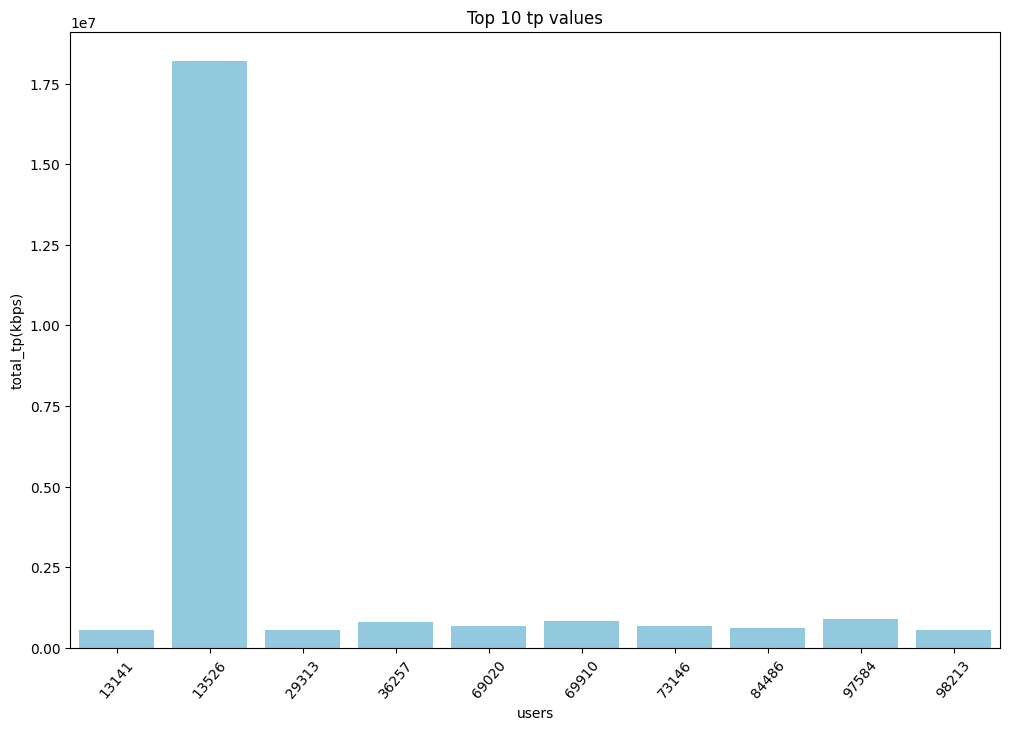

In [152]:
# top 10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = a.index ,y = a['total_tp(kbps)'], color="skyblue").set(title = 'Top 10 tp values', xlabel = 'users')

 IN THE TOP 10 VALUES IN  13526 IS HIGHEST USER FOR TOTAL TP(KBPS)

[Text(0.5, 1.0, 'Bottom 10 tp values'), Text(0.5, 0, 'users')]

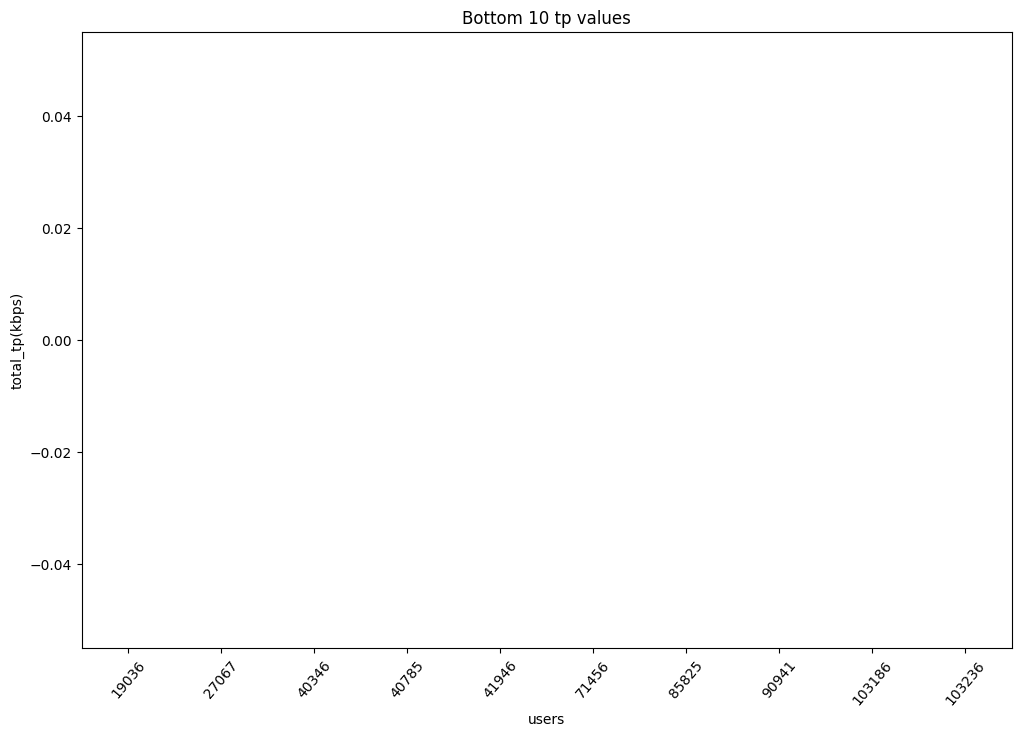

In [153]:
# bottom 10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = b.index ,y = b['total_tp(kbps)'], color="violet").set(title = 'Bottom 10 tp values', xlabel = 'users')#

In [154]:
# All zeros.

[Text(0.5, 1.0, 'Frequent 10 tp values'), Text(0.5, 0, 'users')]

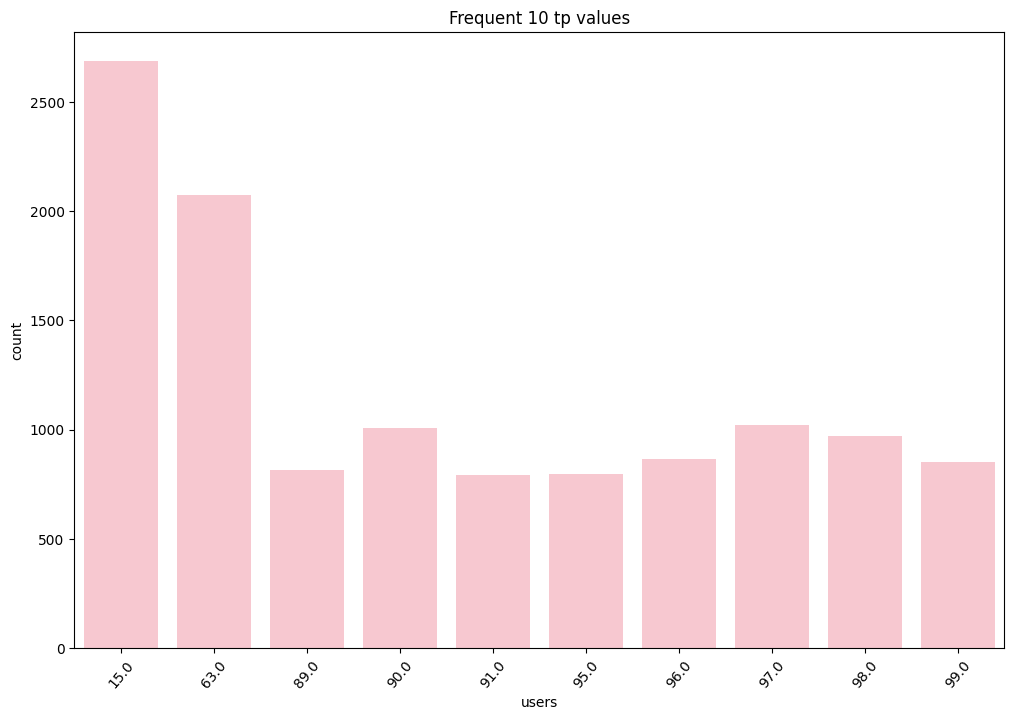

In [155]:
# Frequent 10
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = c.index ,y = c['count'], color="pink").set(title = 'Frequent 10 tp values', xlabel = 'users')

### Compute & report:
* The distribution of the average throughput  per handset type and provide interpretation for your findings.
* The average TCP retransmission view per handset type and provide interpretation for your findings.

In [156]:
data['total_tp(kbps)'] = data['Avg Bearer TP DL (kbps)'] + data['Avg Bearer TP UL (kbps)']
data['total_rtt(ms)'] = data['Avg RTT DL (ms)'] + data['Avg RTT UL (ms)']
data['total_tcp(bytes)'] = data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']

handset_data = data[['Handset Type', 'total_tp(kbps)', 'total_tcp(bytes)']]
agg_handset_data = handset_data.groupby('Handset Type').mean()
agg_handset_data.columns = ['avg_tp_per_set', 'avg_tcp_per_set']
agg_handset_data.head()

avg_tp_per_set  avg_tcp_per_set
Handset Type                                                      
A-Link Telecom I. Cubot A5                23510.0     2.156957e+07
A-Link Telecom I. Cubot Note Plus          6699.0     6.162130e+05
A-Link Telecom I. Cubot Note S             8937.0     4.141173e+07
A-Link Telecom I. Cubot Nova              56217.0     1.371700e+05
A-Link Telecom I. Cubot Power             69468.0     8.041000e+03


 mu = 12400.38 and sigma = 14661.81



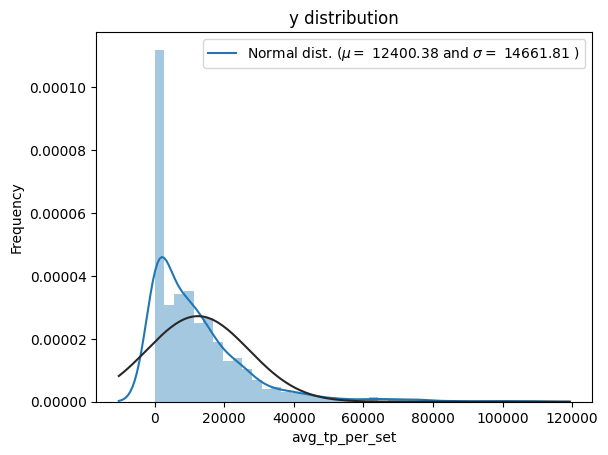

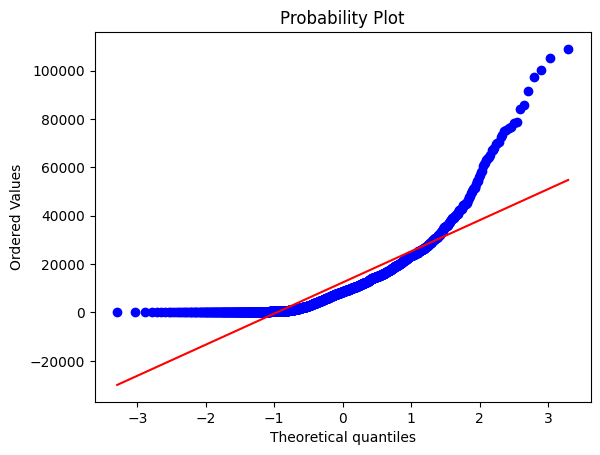

In [157]:
# Average throughput/handset ~ distribution
sns.distplot(agg_handset_data['avg_tp_per_set'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(agg_handset_data['avg_tp_per_set'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(agg_handset_data['avg_tp_per_set'], plot=plt)
plt.show()

Highly right skewed

[Text(0.5, 1.0, 'Top 10 handsets types per average tcp value'),
 Text(0.5, 0, 'handset type')]

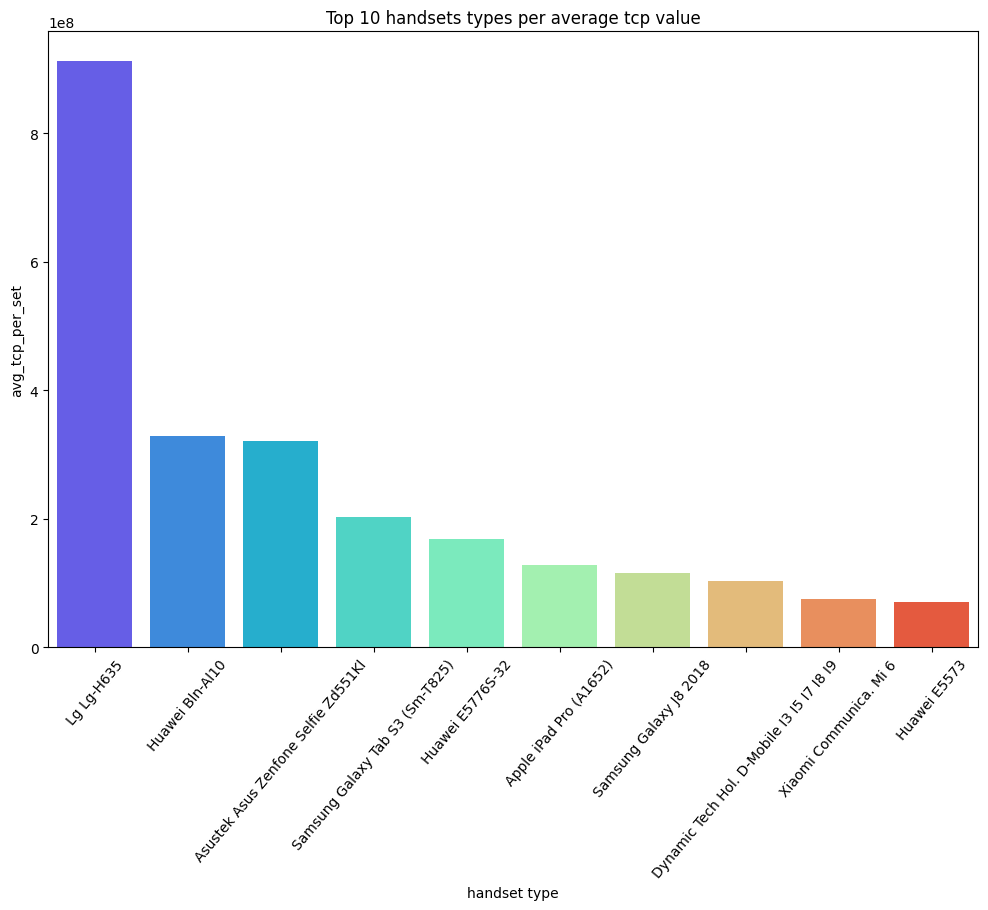

In [158]:
# The average TCP retransmission view per handset type and provide interpretation for your findings.
# aggregate function has already been applied

# top 10 handsets per tcp average
a = agg_handset_data.sort_values(by = 'avg_tcp_per_set', ascending = False).head(10)

plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = a.index ,y = a['avg_tcp_per_set'],palette='rainbow').set(title = 'Top 10 handsets types per average tcp value', xlabel = 'handset type')

6 of the handset types with highest average tcp values are from the top 3 handset manufacturers.

[Text(0.5, 1.0, 'Bottom 10 handsets types per average tcp value'),
 Text(0.5, 0, 'handset type')]

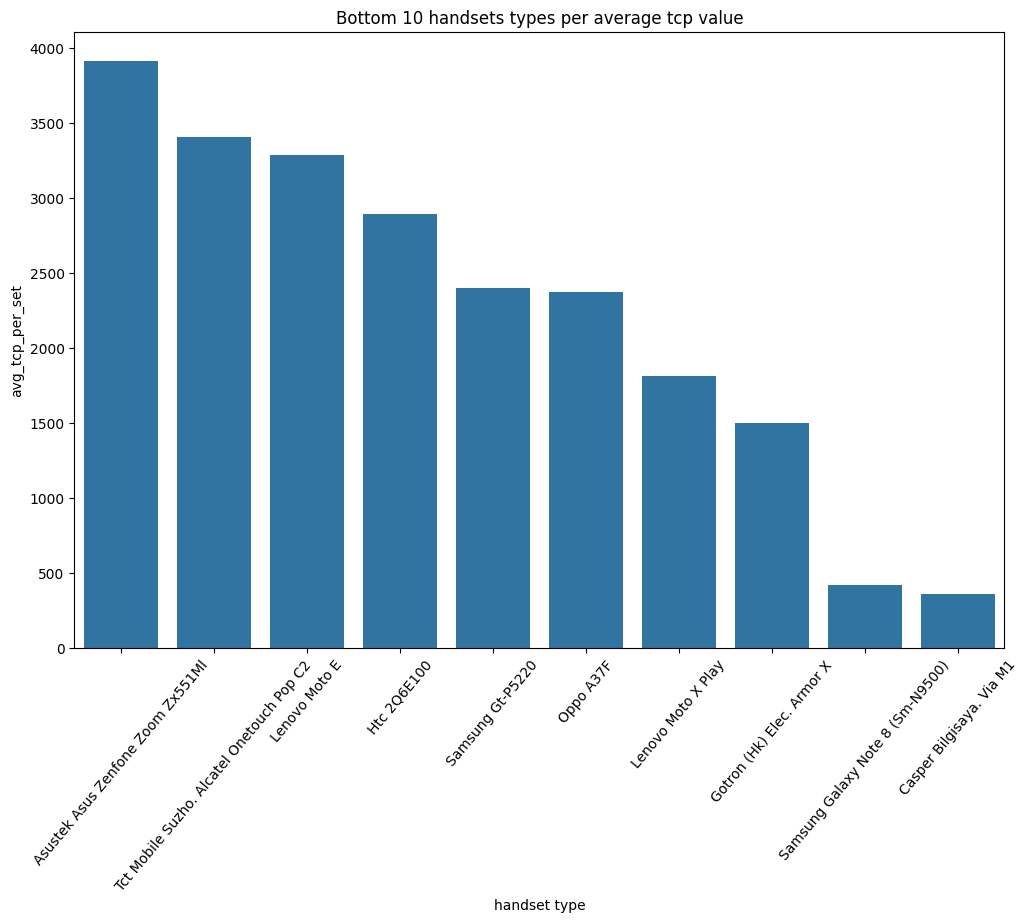

In [159]:
 # bottom 10 handsets per tcp average
b = agg_handset_data.sort_values(by = 'avg_tcp_per_set', ascending = False).tail(10)

plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = b.index ,y = b['avg_tcp_per_set']).set(title = 'Bottom 10 handsets types per average tcp value', xlabel = 'handset type')#

### Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster.

In [160]:
cluster_data = agg_net_data[['Handset Type', 'total_tp(kbps)', 'total_rtt(ms)',  'total_tcp(bytes)']]
norm_cluster_data = np.log1p(cluster_data)   #log transformation
norm_cluster_data.head()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)
0      0.693147        4.343805       3.850148         16.886794
1      0.693147        4.605170       3.465736         16.886794
2      0.693147        4.584967       4.855607         16.886794
3      0.693147        5.517453       4.442651         13.542028
4      1.098612       10.948084       4.787492         17.247574

In [161]:
# kmeans on 3 clusters.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(norm_cluster_data)
kmeans_data = kmeans.predict(norm_cluster_data)

In [162]:
# add the predicted clusters as a column in the df
cluster_data['clusters'] = pd.Series(kmeans_data, index=cluster_data.index)
cluster_data['clusters'] = pd.Series(kmeans_data, index=cluster_data.index)
cluster_data.head()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)  clusters
0             1            76.0      46.000000      2.156957e+07         1
1             1            99.0      31.000000      2.156957e+07         1
2             1            97.0     127.458589      2.156957e+07         1
3             1           248.0      84.000000      7.607247e+05         1
4             2         56844.0     119.000000      3.094040e+07         0

In [163]:
#clusters df
cluster_1 = cluster_data[cluster_data.clusters == 0]
cluster_2 = cluster_data[cluster_data.clusters == 1]
cluster_3 = cluster_data[cluster_data.clusters == 2]

In [164]:
# understand the clusters
cluster_1.describe()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)  clusters
count  28928.000000    2.892800e+04   28928.000000      2.892800e+04   28928.0
mean       2.058041    6.015685e+04     266.024238      6.100145e+07       0.0
std        6.462626    1.229512e+05    2010.058009      3.108235e+08       0.0
min        1.000000    1.157000e+03      17.000000      1.183841e+06       0.0
25%        1.000000    1.968425e+04      88.000000      1.084486e+07       0.0
50%        2.000000    4.286100e+04     149.000000      2.188070e+07       0.0
75%        2.000000    7.666925e+04     261.458589      3.492783e+07       0.0
max     1084.000000    1.819958e+07  330840.833436      1.834177e+10       0.0

In [165]:
cluster_2.describe()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)  clusters
count  57867.000000    57867.000000   57867.000000      5.786700e+04   57867.0
mean       1.199181      161.199008     121.934653      2.522595e+07       1.0
std        0.500237      238.588215     721.290566      1.163534e+07       0.0
min        1.000000        0.000000       0.000000      2.398920e+05       1.0
25%        1.000000       77.000000      38.000000      2.156957e+07       1.0
50%        1.000000       99.000000      69.000000      2.156957e+07       1.0
75%        1.000000      132.000000     127.458589      2.156957e+07       1.0
max        9.000000     2340.000000   96924.000000      5.395976e+08       1.0

In [166]:
cluster_3.describe()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)  clusters
count  20061.000000    20061.000000   20061.000000      2.006100e+04   20061.0
mean       1.050446    25474.337371     217.704705      5.512105e+05       2.0
std        0.247515    27977.387538     702.517914      5.077024e+05       0.0
min        1.000000       38.000000      19.000000      9.700000e+01       2.0
25%        1.000000     4779.000000      49.000000      7.448400e+04       2.0
50%        1.000000    16979.000000      72.000000      4.915700e+05       2.0
75%        1.000000    36905.000000     154.000000      7.923790e+05       2.0
max        5.000000   382871.000000   27278.000000      3.340765e+06       2.0

# 4. Satisfaction Analysis

* Engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this).

In [167]:
# the results of the 1st clustering
norm_agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.360100e+10        0.693147              18.575290                20.593943   
3.360100e+10        0.693147              19.015283                18.870862   
3.360100e+10        0.693147              18.720558                20.205695   
3.360101e+10        0.693147              17.725091                19.861276   
3.360101e+10        1.098612              17.429248                21.099927   

               clusters  
MSISDN/Number            
3.360100e+10          2  
3.360100e+10          2  
3.360100e+10          2  
3.360101e+10          1  
3.360101e+10          1

In [168]:
norm_agg_user_data.shape

(106856, 4)

Due to not saved that clusters i have to use kmeans again to get old clusters

In [169]:
# kmeans on 3 clusters.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(norm_agg_user_data)
kmeans_data = kmeans.predict(norm_agg_user_data)

In [170]:
# add the predicted clusters as a column in the df
norm_agg_user_data['clusters'] = pd.Series(kmeans_data, index=norm_agg_user_data.index)
norm_agg_user_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.360100e+10        0.693147              18.575290                20.593943   
3.360100e+10        0.693147              19.015283                18.870862   
3.360100e+10        0.693147              18.720558                20.205695   
3.360101e+10        0.693147              17.725091                19.861276   
3.360101e+10        1.098612              17.429248                21.099927   

               clusters  
MSISDN/Number            
3.360100e+10          1  
3.360100e+10          1  
3.360100e+10          1  
3.360101e+10          2  
3.360101e+10          2

In [171]:
# Identifying the least engaged cluster
norm_agg_user_data.clusters.value_counts()

clusters
1    54867
0    29428
2    22561
Name: count, dtype: int64


* **engagement_score = euclidean_dist between a datapoint and cluster's 2 centroid.**

In [172]:
data1 = norm_agg_user_data.drop(['clusters'], axis = 1)

km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
alldistances = km.fit_transform(data1) #returns euclidean distance btwn all datapoints and each cluster centroid

dist_df = pd.DataFrame(alldistances)
dist_2 = dist_df.iloc[:, 0].to_list() #pick out the centroid 2 distances
print(len(dist_2))
dist_2[:10]

106856


[0.8660000073434987,
 2.016718203316401,
 0.9436927742163734,
 1.8870886693628723,
 1.883060968662947,
 0.58792928954051,
 0.8116940002856654,
 1.6300703351580503,
 0.7384264473036869,
 0.879789620736771]

In [173]:
# add the distances as engagement score column

In [174]:
norm_agg_user_data['engagement_score'] = dist_2
# Check if 'clusters' column exists before dropping
if 'clusters' in norm_agg_user_data.columns:
    eng_scores_data = norm_agg_user_data.drop(['clusters'], axis=1)
else:
    # If not found, proceed without dropping
    eng_scores_data = norm_agg_user_data.copy()
    print("Column 'clusters' not found. Proceeding without dropping it.")
eng_scores_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.360100e+10        0.693147              18.575290                20.593943   
3.360100e+10        0.693147              19.015283                18.870862   
3.360100e+10        0.693147              18.720558                20.205695   
3.360101e+10        0.693147              17.725091                19.861276   
3.360101e+10        1.098612              17.429248                21.099927   

               engagement_score  
MSISDN/Number                    
3.360100e+10           0.866000  
3.360100e+10           2.016718  
3.360100e+10           0.943693  
3.360101e+10           1.887089  
3.360101e+10           1.883061

In [175]:
norm_agg_user_data['engagement_score'] = dist_2
# Check if 'clusters' column exists before dropping
if 'clusters' in norm_agg_user_data.columns:
    eng_scores_data = norm_agg_user_data.drop(['clusters'], axis=1)
else:
    # If not found, proceed without dropping
    eng_scores_data = norm_agg_user_data.copy()
    print("Column 'clusters' not found. Proceeding without dropping it.")
eng_scores_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.360100e+10        0.693147              18.575290                20.593943   
3.360100e+10        0.693147              19.015283                18.870862   
3.360100e+10        0.693147              18.720558                20.205695   
3.360101e+10        0.693147              17.725091                19.861276   
3.360101e+10        1.098612              17.429248                21.099927   

               engagement_score  
MSISDN/Number                    
3.360100e+10           0.866000  
3.360100e+10           2.016718  
3.360100e+10           0.943693  
3.360101e+10           1.887089  
3.360101e+10           1.883061

In [176]:
norm_agg_user_data['engagement_score'] = dist_2
eng_scores_data = norm_agg_user_data.drop(['clusters'], axis = 1)
eng_scores_data.head()

sessions_freq  sessions_duration(ms)  sessions_traffic(bytes)  \
MSISDN/Number                                                                  
3.360100e+10        0.693147              18.575290                20.593943   
3.360100e+10        0.693147              19.015283                18.870862   
3.360100e+10        0.693147              18.720558                20.205695   
3.360101e+10        0.693147              17.725091                19.861276   
3.360101e+10        1.098612              17.429248                21.099927   

               engagement_score  
MSISDN/Number                    
3.360100e+10           0.866000  
3.360100e+10           2.016718  
3.360100e+10           0.943693  
3.360101e+10           1.887089  
3.360101e+10           1.883061

* experience score to each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster.

In [177]:
# picking out the 4 cols
exp_data = net_data.drop(['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
                          'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'], axis = 1)
exp_data.head()

MSISDN/Number                 Handset Type  total_tp(kbps)  total_rtt(ms)  \
0   3.366496e+10   Samsung Galaxy A5 Sm-A520F            67.0      47.000000   
1   3.368185e+10  Samsung Galaxy J5 (Sm-J530)            42.0      70.000000   
2   3.376063e+10     Samsung Galaxy A8 (2018)            15.0     127.458589   
3   3.375034e+10                    undefined            88.0     127.458589   
4   3.369980e+10             Samsung Sm-G390F            15.0     127.458589   

   total_tcp(bytes)  
0      2.156957e+07  
1      2.156957e+07  
2      2.156957e+07  
3      2.156957e+07  
4      2.156957e+07

In [178]:
# groupby user
agg_exp_data = exp_data.groupby('MSISDN/Number').agg({'Handset Type':'count', 'total_tp(kbps)':'sum', 'total_rtt(ms)':'sum', 'total_tcp(bytes)':'sum'})
agg_exp_data.head()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)
MSISDN/Number                                                               
3.360100e+10              1            76.0      46.000000      2.156957e+07
3.360100e+10              1            99.0      31.000000      2.156957e+07
3.360100e+10              1            97.0     127.458589      2.156957e+07
3.360101e+10              1           248.0      84.000000      7.607247e+05
3.360101e+10              2         56844.0     119.000000      3.094040e+07

In [179]:
# normalize and perform kmeans
norm_agg_exp_data = np.log1p(agg_exp_data)
norm_agg_exp_data.head()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)
MSISDN/Number                                                               
3.360100e+10       0.693147        4.343805       3.850148         16.886794
3.360100e+10       0.693147        4.605170       3.465736         16.886794
3.360100e+10       0.693147        4.584967       4.855607         16.886794
3.360101e+10       0.693147        5.517453       4.442651         13.542028
3.360101e+10       1.098612       10.948084       4.787492         17.247574

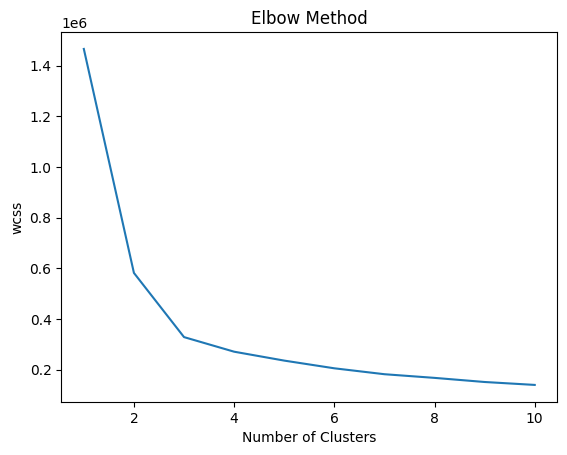

In [180]:
# determining number of clusters using elbow plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(norm_agg_exp_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

k=3

In [181]:
# fit kmeans and identify least engaged cluster
k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
k_means.fit(norm_agg_exp_data)
clusters=k_means.predict(norm_agg_exp_data)

norm_agg_exp_data['clusters'] = clusters
norm_agg_exp_data.clusters.value_counts()

clusters
1    57867
0    28928
2    20061
Name: count, dtype: int64

In [182]:
#cluster 2 has the least.
# *** exp_score = euclidean distance between datapoints and cluster 1's centroid**

In [183]:
# fit kmeans
data1 = norm_agg_exp_data.drop(['clusters'], axis = 1)

km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
alldistances = km.fit_transform(data1) #returns euclidean distance btwn all datapoints to each cluster centroid

dist_df = pd.DataFrame(alldistances)
dist_0 = dist_df.iloc[:, 2].to_list() #pick out the centroid 0 distances
print(len(dist_0))
dist_0[:10]

106856


[6.814138020711891,
 6.677955748897969,
 6.603467730239062,
 4.026891119449109,
 5.19025163550807,
 4.646802997087301,
 4.799883374719107,
 2.6079930147170156,
 6.74729063510285,
 6.300853842526785]

In [184]:
# add the scores to the df
norm_agg_exp_data['experience_score'] = dist_0
exp_scores_data = norm_agg_exp_data.drop(['clusters'], axis = 1)
exp_scores_data.tail()

Handset Type  total_tp(kbps)  total_rtt(ms)  total_tcp(bytes)  \
MSISDN/Number                                                                  
3.379000e+10       0.693147        9.246286       3.970292         12.292461   
3.379000e+10       0.693147        4.762174       3.713572         16.886794   
3.197021e+12       0.693147        0.693147       4.855607         16.886794   
3.370000e+14       0.693147        3.526361       4.855607         16.886794   
8.823971e+14       0.693147        1.098612       4.855607         16.886794   

               experience_score  
MSISDN/Number                    
3.379000e+10           0.626104  
3.379000e+10           6.529534  
3.197021e+12           9.791477  
3.370000e+14           7.404299  
8.823971e+14           9.434724

In [185]:
print(exp_scores_data.shape)
print(eng_scores_data.shape)

(106856, 5)
(106856, 4)


### Merge the engagement and experience datasets

In [186]:
exp_scores_data = exp_scores_data.reset_index()
eng_scores_data = eng_scores_data.reset_index()
avg_score_df = pd.merge(left = exp_scores_data, right = eng_scores_data, left_on = 'MSISDN/Number', right_on = 'MSISDN/Number')
print(avg_score_df.shape)
avg_score_df.tail()

(106856, 10)


MSISDN/Number  Handset Type  total_tp(kbps)  total_rtt(ms)  \
106851   3.379000e+10      0.693147        9.246286       3.970292   
106852   3.379000e+10      0.693147        4.762174       3.713572   
106853   3.197021e+12      0.693147        0.693147       4.855607   
106854   3.370000e+14      0.693147        3.526361       4.855607   
106855   8.823971e+14      0.693147        1.098612       4.855607   

        total_tcp(bytes)  experience_score  sessions_freq  \
106851         12.292461          0.626104       0.693147   
106852         16.886794          6.529534       0.693147   
106853         16.886794          9.791477       0.693147   
106854         16.886794          7.404299       0.693147   
106855         16.886794          9.434724       0.693147   

        sessions_duration(ms)  sessions_traffic(bytes)  engagement_score  
106851              15.991476                20.387292          3.356165  
106852              18.764190                19.989937          1.074709  
106853              20.592457                19.262782          2.075549  
106854              19.349019                20.206234          0.753168  
106855              20.583825                18.751089          2.478448

In [187]:
#calculate the average score
avg_score_df['satisfaction_score'] = (avg_score_df['experience_score'] + avg_score_df['engagement_score'])/2
avg_score_df.head()

MSISDN/Number  Handset Type  total_tp(kbps)  total_rtt(ms)  \
0   3.360100e+10      0.693147        4.343805       3.850148   
1   3.360100e+10      0.693147        4.605170       3.465736   
2   3.360100e+10      0.693147        4.584967       4.855607   
3   3.360101e+10      0.693147        5.517453       4.442651   
4   3.360101e+10      1.098612       10.948084       4.787492   

   total_tcp(bytes)  experience_score  sessions_freq  sessions_duration(ms)  \
0         16.886794          6.814138       0.693147              18.575290   
1         16.886794          6.677956       0.693147              19.015283   
2         16.886794          6.603468       0.693147              18.720558   
3         13.542028          4.026891       0.693147              17.725091   
4         17.247574          5.190252       1.098612              17.429248   

   sessions_traffic(bytes)  engagement_score  satisfaction_score  
0                20.593943          0.866000            3.840069  
1                18.870862          2.016718            4.347337  
2                20.205695          0.943693            3.773580  
3                19.861276          1.887089            2.956990  
4                21.099927          1.883061            3.536656

### Top 10 most satisfied users

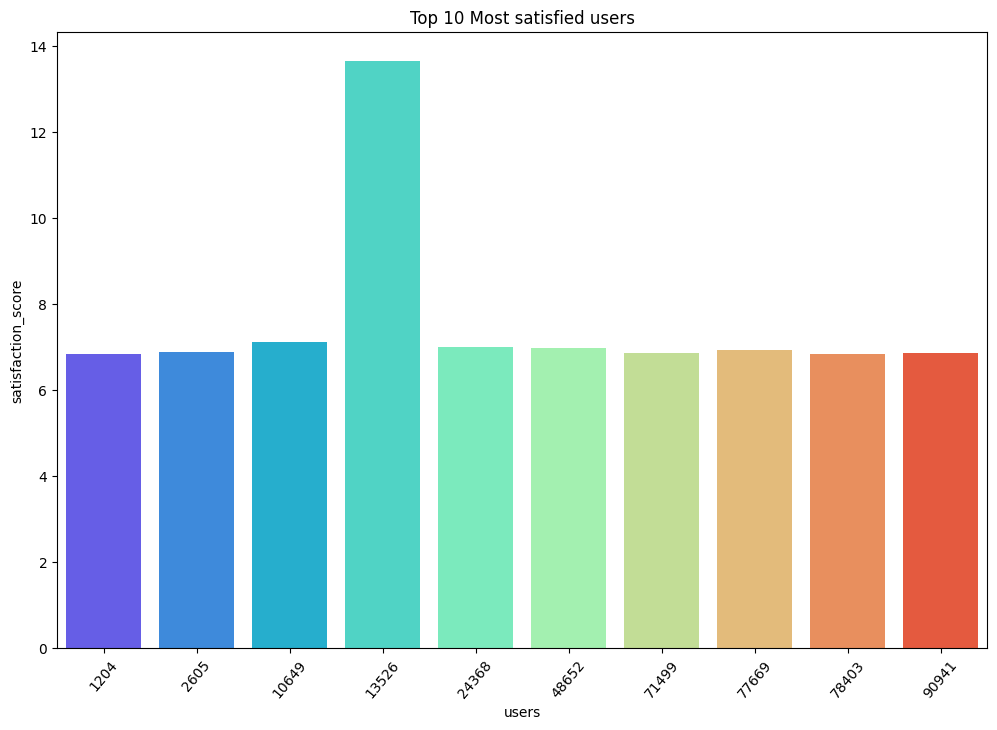

In [188]:
# sorting and plotting
a = avg_score_df.sort_values(by = 'satisfaction_score', ascending = False).head(10)
plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = a.index ,y = a['satisfaction_score'],palette='rainbow').set(title = 'Top 10 Most satisfied users', xlabel = 'users')
plt.show()

### Run a regression model of your choice to predict the satisfaction score of a customer.
Working with the 4 features from the average_score df

In [189]:
all_variables = avg_score_df[['MSISDN/Number','engagement_score', 'experience_score', 'satisfaction_score']]
all_variables.head()

MSISDN/Number  engagement_score  experience_score  satisfaction_score
0   3.360100e+10          0.866000          6.814138            3.840069
1   3.360100e+10          2.016718          6.677956            4.347337
2   3.360100e+10          0.943693          6.603468            3.773580
3   3.360101e+10          1.887089          4.026891            2.956990
4   3.360101e+10          1.883061          5.190252            3.536656

In [190]:
# # features transformations
# def logs(res, ls):
#     m = res.shape[1]
#     for l in ls:
#         res = res.assign(newcol=pd.Series(np.log(1.01+res[l])).values)
#         res.columns.values[m] = l + '_log'
#         m += 1
#     return res

# log_features = ['Handset Type', 'total_tp(kbps)', 'total_rtt(ms)','total_tcp(bytes)', 'experience_score', 'sessions_freq',
#                 'sessions_duration(ms)', 'sessions_traffic(bytes)', 'engagement_score','satisfaction_score']

# all_variables = logs(avg_score_df, log_features)
# all_variables.head(2)

In [191]:
# def squares(res, ls):
#     m = res.shape[1]
#     for l in ls:
#         res = res.assign(newcol=pd.Series(res[l]*res[l]).values)
#         res.columns.values[m] = l + '_sq'
#         m += 1
#     return res

# squared_features = ['Handset Type', 'total_tp(kbps)', 'total_rtt(ms)','total_tcp(bytes)', 'experience_score', 'sessions_freq',
#                     'sessions_duration(ms)', 'sessions_traffic(bytes)', 'engagement_score','satisfaction_score']

# all_variables = squares(all_variables, squared_features)
# print(all_variables.shape)
# all_variables.head(2)

In [192]:
# split  dataset into train and test sets
from sklearn.model_selection import train_test_split

x = all_variables.drop(['satisfaction_score'], axis = 1)
y = all_variables[['satisfaction_score']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state = 0)
print('xtrain shape:', x_train.shape)
print('xtest shape:', x_test.shape)
print('ytrain shape:', y_train.shape)
print('ytest shape:', y_test.shape)

xtrain shape: (74799, 3)
xtest shape: (32057, 3)
ytrain shape: (74799, 1)
ytest shape: (32057, 1)


In [193]:
# drop the user column from the xtrain. Save it in another df from the xtest set
x_train = x_train.drop(['MSISDN/Number'], axis = 1)
test_user = x_test[['MSISDN/Number']]
x_test = x_test.drop(['MSISDN/Number'], axis = 1)
print('xtrain shape:', x_train.shape)
print('xtest shape:', x_test.shape)
print('users df shape:', test_user.shape)

xtrain shape: (74799, 2)
xtest shape: (32057, 2)
users df shape: (32057, 1)


In [194]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [195]:
# Models hyperparameters tuning
# I intend to observe the performance of 3 models (2 boosters and one ensemble method) then use the one with the lowest MSE score to predict the x_test set.

# Random Forest
regressor = RandomForestRegressor(n_estimators=300, random_state=0)


#gradboost
gdb = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =0)


#xgboost
xgb = XGBRegressor(colsample_bytree=0.4603,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=0,
                             random_state =0, nthread = -1)



In [196]:
from sklearn.model_selection import KFold, cross_val_score

In [197]:
# # fitting and observing performannce through

# # score
n_folds = 5 # Define n_folds here, as it's used in rmsle_cv

def rmsle_cv(model):
    # Get the number of splits using KFold.get_n_splits()
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    # Calculate RMSE using cross_val_score with the specified parameters
    rmse = np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)



In [198]:
score = rmsle_cv(xgb)
print("\nExtreme grad boostscore: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Extreme grad boostscore: 0.0283 (0.0154)



rmsle_cv is presumably a function we've defined (or a helper function) that performs cross-validation for the xgb model and returns the RMSLE score for each fold.
xgb is likely your Extreme Gradient Boosting model instance (created using XGBoost).

Mean RMSLE (0.1234) indicates the average error between the logarithmic predictions and true values across folds.
Standard Deviation (0.0123) tells you the consistency of the model performance across the folds; a low standard deviation indicates stable performance.

In [199]:
score = rmsle_cv(regressor)
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random Forest score: 0.0166 (0.0189)



In [200]:
score = rmsle_cv(gdb)
print("\nGrad Boost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Grad Boost score: 0.0190 (0.0174)



In [201]:
# l = [0.0012, 0.0000, 0.0037]
# c = ['xgb', 'random forest', 'gradboost']
# df = pd.DataFrame(l, index = c)
# sns.barplot(x = df.index, y = df[0])

In [202]:
# rf prediction
regressor.fit(x_train.values, y_train)
rf_pred = regressor.predict(x_test.values)

In [203]:
# xgb prediction
xgb.fit(x_train.values, y_train)
xgb_pred = xgb.predict(x_test.values)

In [204]:
# gdb prediction
gdb.fit(x_train.values, y_train)
gdb_pred = gdb.predict(x_test.values)

In [205]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean absolute error for random forest on test data =", mean_absolute_error(y_test, rf_pred))
print("Mean absolute error for xgboost on test data=", mean_absolute_error(y_test, xgb_pred))
print("Mean absolute error for gradboost on test data=", mean_absolute_error(y_test, gdb_pred))

print("\nMean squared error for random forest on test data =", mean_squared_error(y_test, rf_pred))
print("Mean squared error for xgboost on test data=", mean_squared_error(y_test, xgb_pred))
print("Mean squared error for gradboost on test data=", mean_squared_error(y_test, gdb_pred))

Mean absolute error for random forest on test data = 0.0022408146703250457
Mean absolute error for xgboost on test data= 0.008111324426103335
Mean absolute error for gradboost on test data= 0.006682776529433925

Mean squared error for random forest on test data = 4.30103387367116e-05
Mean squared error for xgboost on test data= 0.0004330653724730481
Mean squared error for gradboost on test data= 9.96504672688766e-05


As the above results the randomforest predictions since it has the smallest mean absolute error.

In [206]:
# save predictions.
predictions = pd.DataFrame()
predictions['users'] = test_user['MSISDN/Number']
predictions['satisfaction_score'] = rf_pred
print(predictions.shape)
predictions.head()

(32057, 2)


users  satisfaction_score
19972   3.364241e+10            3.299570
89091   3.369960e+10            4.104367
60375   3.366554e+10            4.363081
103157  3.377736e+10            4.358640
106784  3.378954e+10            3.640016

### Run a k-means (k=2) on the engagement & the experience score.

In [207]:
ds = avg_score_df[['MSISDN/Number', 'engagement_score', 'experience_score']]

# no need for standardization (same unit if measurement)
k_means = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
k_means.fit(ds)
clusters=k_means.predict(ds)

ds['clusters'] = clusters
ds.tail()

MSISDN/Number  engagement_score  experience_score  clusters
106851   3.379000e+10          3.356165          0.626104         0
106852   3.379000e+10          1.074709          6.529534         0
106853   3.197021e+12          2.075549          9.791477         0
106854   3.370000e+14          0.753168          7.404299         0
106855   8.823971e+14          2.478448          9.434724         1

In [208]:
cluster_agg = ds.groupby('clusters').agg({'experience_score':'mean', 'engagement_score':'mean'})
cluster_agg

experience_score  engagement_score
clusters                                    
0                 5.381840          1.429254
1                 9.434724          2.478448

In [209]:
ds = avg_score_df[['MSISDN/Number', 'engagement_score', 'experience_score','satisfaction_score']]

# no need for standardization (same unit if measurement)
k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
k_means.fit(ds)
clusters=k_means.predict(ds)

ds['clusters'] = clusters
ds.tail()

MSISDN/Number  engagement_score  experience_score  satisfaction_score  \
106851   3.379000e+10          3.356165          0.626104            1.991134   
106852   3.379000e+10          1.074709          6.529534            3.802122   
106853   3.197021e+12          2.075549          9.791477            5.933513   
106854   3.370000e+14          0.753168          7.404299            4.078733   
106855   8.823971e+14          2.478448          9.434724            5.956586   

        clusters  
106851         0  
106852         0  
106853         0  
106854         2  
106855         1

In [210]:
ds.to_csv('final_score.csv',index='False')

In [211]:
#from google.colab import files
# files.download('final_score.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Aggregate the average engagement & experience score per cluster.

In [223]:
cluster_agg = ds.groupby('clusters').agg({'experience_score':'mean', 'engagement_score':'mean'})
cluster_agg

experience_score  engagement_score
clusters                                    
0                 5.381821          1.429261
1                 9.434724          2.478448
2                 7.404299          0.753168

In [213]:
# above score per cluster are showing the experience score is greater then engagment score.

###  Export your final table containing all user id + engagement, experience & satisfaction scores in your local MySQL database. Report a screenshot of a select on the exported table.

In [214]:
#!pip install mysql-connector

In [215]:
#!pip install --upgrade mysql-connector-python

In [216]:
# !apt-get -y install mysql-server

In [217]:
#!service mysql start

In [218]:
#!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH 'mysql_native_password' BY 'root';FLUSH PRIVILEGES;"

In [219]:
#!!mysql -u root -p'root' -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH 'mysql_native_password' BY 'sambhav@123'; FLUSH PRIVILEGES;"


In [222]:
#'mysql_native_password'

# SELECT user, host, plugin FROM mysql.user WHERE user = 'root';
_





experience_score  engagement_score
clusters                                    
0                 5.381821          1.429261
1                 9.434724          2.478448
2                 7.404299          0.753168